# Описание проекта
Вы работаете специалистом по обработке данных в глобальной финансовой компании. На протяжении многих лет компания собирала основные банковские реквизиты и собрала много информации, связанной с кредитом. Руководство хочет создать интеллектуальную систему для разделения сотрудников по категориям кредитных баллов, чтобы сократить ручные усилия.

# Цель и задачи проекта:
## Цель - предсказание кредитного рейтинга клиентов компании.
## Задачи:
1. Очистка и подготовка датасета к моделированию.
2. Отбор признаков, значимых для построения модели.
3. Учитывая информацию, связанную с кредитом человека, создать модель машинного обучения, которая может классифицировать кредитный рейтинг.

Метрика В качестве метрики качества модели использовалась Accuracy - доля правильных ответов алгоритма.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn import ensemble
from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors
from sklearn import tree

from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        name = os.path.join(dirname, filename)
        print(name)
        
        if 'train.csv' in name:
            train_file_name = name
        elif 'test.csv' in name:
            test_file_name = name
            
print('train data :', train_file_name)
print('test data  :', test_file_name)

/kaggle/input/credit-score-classification/train.csv
/kaggle/input/credit-score-classification/test.csv
train data : /kaggle/input/credit-score-classification/train.csv
test data  : /kaggle/input/credit-score-classification/test.csv


# 1. Предварительный анализ набора данных

In [3]:
# прочитаем training и test data
train_data = pd.read_csv(train_file_name)
test_data  = pd.read_csv(test_file_name)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Описание данных:

0. ID: Уникальный идентификатор записи
1. Customer_ID: Уникальный идентификатор клиента
2. Month: Месяц в году
3. Name: Имя клиента
4. Age: Возраст клиента
5. SSN: Номер социального страхования данного лица
6. Occupation: Род занятий клиента
7. Annual_Income: Годовой доход лица
8. Monthly_Inhand_Salary: Ежемесячная заработная плата клиента
9. Num_Bank_Accounts: Количество банковских счетов данного лица
10. Num_Credit_Card: Количество кредитных карт, имеющихся у данного лица
11. Interest_Rate: Процентная ставка по кредитной карте данного лица
12. Num_of_Loan: Количество кредитов, взятых лицом в банке
13. Type_of_Loan: Виды кредитов, взятых лицом в банке
14. Delay_from_due_date: Среднее количество дней, просроченных лицом с момента оплаты
15. Num_of_Delayed_Payment: Количество платежей, задержанных данным лицом
16. Changed_Credit_Card: Процентное изменение лимита кредитной карты данного лица
17. Num_Credit_Inquiries: Количество запросов по кредитной карте, сделанных данным лицом
18. Credit_Mix: Классификация кредитного портфеля клиента
19. Outstanding_Debt: Непогашенный баланс клиента
20. Credit_Utilization_Ratio: Коэффициент использования кредита по кредитной карте клиента
21. Credit_History_Age: Возраст кредитной истории лица
22. Payment_of_Min_Amount: Да, если лицо оплатило только минимальную сумму, подлежащую выплате, в противном случае нет
23. Total_EMI_per_month: Общий EMI человека в месяц
24. Amount_invested_monthly: Ежемесячная сумма, инвестируемая лицом
25. Payment_Behaviour: Платежное поведение лица
26. Monthly_Balance: Ежемесячный остаток, оставшийся на счете данного лица
27. Credit_Score: Кредитный рейтинг клиента

In [4]:
# посмотрим на данные
train_data.head(15)

ID Customer_ID     Month             Name   Age          SSN  \
0   0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1   0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2   0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3   0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4   0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5   0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6   0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7   0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8   0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9   0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   
10  0x1610  CUS_0x21b1     March  Rick Rothackerj    28  004-07-5839   
11  0x1611  CUS_0x21b1     April  Rick Rothackerj    28  004-07-5839   
12  0x1612  CUS_0x21b1       May  Rick Rothackerj    28  004-07-5839   
13  0x1613  CUS_0x21b1      June  Rick Rothackerj    28  004-07-5839   
14  0x1614  CUS_0x21b1      July  Rick Rothackerj    28  004-07-5839   

   Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0   Scientist      19114.12            1824.843333                  3  ...   
1   Scientist      19114.12                    NaN                  3  ...   
2   Scientist      19114.12                    NaN                  3  ...   
3   Scientist      19114.12                    NaN                  3  ...   
4   Scientist      19114.12            1824.843333                  3  ...   
5   Scientist      19114.12                    NaN                  3  ...   
6   Scientist      19114.12            1824.843333                  3  ...   
7   Scientist      19114.12            1824.843333                  3  ...   
8     _______      34847.84            3037.986667                  2  ...   
9     Teacher      34847.84            3037.986667                  2  ...   
10    Teacher     34847.84_            3037.986667                  2  ...   
11    Teacher      34847.84                    NaN                  2  ...   
12    Teacher      34847.84            3037.986667                  2  ...   
13    Teacher      34847.84            3037.986667                  2  ...   
14    Teacher      34847.84                    NaN                  2  ...   

    Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0            _            809.98                26.822620   
1         Good            809.98                31.944960   
2         Good            809.98                28.609352   
3         Good            809.98                31.377862   
4         Good            809.98                24.797347   
5         Good            809.98                27.262259   
6         Good            809.98                22.537593   
7         Good            809.98                23.933795   
8         Good            605.03                24.464031   
9         Good            605.03                38.550848   
10           _            605.03                33.224951   
11        Good            605.03                39.182656   
12        Good            605.03                34.977895   
13        Good            605.03                33.381010   
14        Good            605.03                31.131702   

        Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0    22 Years and 1 Months                     No           49.574949   
1                      NaN                     No           49.574949   
2    22 Years and 3 Months                     No           49.574949   
3    22 Years and 4 Months                     No           49.574949   
4    22 Years and 5 Months                     No           49.574949   
5    22 Years and 6 Months                     No           49.574949   
6    22 Years and 7 Months                     No           49.574949   
7                      NaN                   

In [5]:
test_data.head(15)

ID Customer_ID      Month             Name  Age          SSN  \
0   0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1   0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2   0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3   0x160d   CUS_0xd40   December    Aaron Maashoh  24_  821-00-0265   
4   0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   
5   0x1617  CUS_0x21b1    October  Rick Rothackerj   28    #F%$D@*&8   
6   0x1618  CUS_0x21b1   November  Rick Rothackerj   28  004-07-5839   
7   0x1619  CUS_0x21b1   December  Rick Rothackerj   28  004-07-5839   
8   0x1622  CUS_0x2dbc  September           Langep   35  486-85-3974   
9   0x1623  CUS_0x2dbc    October           Langep   35  486-85-3974   
10  0x1624  CUS_0x2dbc   November              NaN   35  486-85-3974   
11  0x1625  CUS_0x2dbc   December           Langep   35  486-85-3974   
12  0x162e  CUS_0xb891  September           Jasond   55  072-31-6145   
13  0x162f  CUS_0xb891    October           Jasond   55  072-31-6145   
14  0x1630  CUS_0xb891   November           Jasond   55  072-31-6145   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12            1824.843333                  3  ...   
2      Scientist      19114.12            1824.843333                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4        _______      34847.84            3037.986667                  2  ...   
5        Teacher      34847.84            3037.986667                  2  ...   
6        Teacher      34847.84            3037.986667                  2  ...   
7        Teacher      34847.84            3037.986667                  2  ...   
8       Engineer     143162.64                    NaN                  1  ...   
9       Engineer     143162.64           12187.220000                  1  ...   
10      Engineer     143162.64           12187.220000                  1  ...   
11      Engineer     143162.64           12187.220000                  1  ...   
12  Entrepreneur      30689.89            2612.490833                  2  ...   
13  Entrepreneur      30689.89            2612.490833                  2  ...   
14  Entrepreneur      30689.89            2612.490833                  2  ...   

    Num_Credit_Inquiries  Credit_Mix Outstanding_Debt  \
0                 2022.0        Good           809.98   
1                    4.0        Good           809.98   
2                    4.0        Good           809.98   
3                    4.0        Good           809.98   
4                    5.0        Good           605.03   
5                    5.0        Good           605.03   
6                    5.0           _           605.03   
7                    5.0           _           605.03   
8                    3.0        Good          1303.01   
9                    3.0        Good          1303.01   
10                   5.0        Good         1303.01_   
11                   5.0        Good          1303.01   
12                   4.0        Good           632.46   
13                   4.0           _           632.46   
14                   4.0        Good           632.46   

   Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
0                 35.030402   22 Years and 9 Months                    No   
1                 33.053114  22 Years and 10 Months                    No   
2                 33.811894                     NaN                    No   
3                 32.430559   23 Years and 0 Months                    No   
4                 25.926822   27 Years and 3 Months                    No   
5                 30.116600   27 Years and 4 Months                    No   
6                 30.996424   27 Years and 5 Months                    No   
7                 33.875167  

Видно, что есть странные значения в различных колонках.

In [6]:
# метод info() покажет пропуски в данных и их тип
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

<AxesSubplot:>

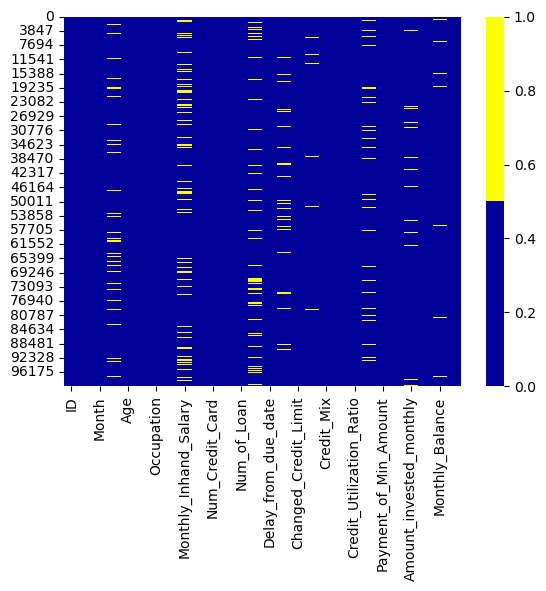

In [7]:
cols = train_data.columns
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(train_data[cols].isnull(), cmap=sns.color_palette(colours))

In [8]:
# Пропуски в процентах
train_data.isnull().sum() / len(train_data)*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

Во-первых, можно отметить, что в колонках ```Age```, ```Occupation```, ```Payment_Behaviour```  есть странные значения.

Во-вторых, в колонках ```Name```, ```Monthly_Inhand_Salary```, ```Type_of_Loan```, ```Num_of_Delayed_Payment```, ```Num_Credit_Inquiries```, ```Credit_Hitory_Age```, ```Amount_invested_monthly```, и ```Monthly_Balance``` еть нулевые значения.

# 2. Трансформирование и чистка данных

In [9]:
# удалим ID, Name и SSN (Customer_ID необходим для удаления дубликатов)
train_data = train_data.drop(columns=['ID', 'Name', 'SSN'])
test_data = test_data.drop(columns=['ID', 'Name', 'SSN'])

In [10]:
train_data[train_data['Customer_ID'] == 'CUS_0xd40']

Customer_ID     Month   Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0   CUS_0xd40   January    23  Scientist      19114.12            1824.843333   
1   CUS_0xd40  February    23  Scientist      19114.12                    NaN   
2   CUS_0xd40     March  -500  Scientist      19114.12                    NaN   
3   CUS_0xd40     April    23  Scientist      19114.12                    NaN   
4   CUS_0xd40       May    23  Scientist      19114.12            1824.843333   
5   CUS_0xd40      June    23  Scientist      19114.12                    NaN   
6   CUS_0xd40      July    23  Scientist      19114.12            1824.843333   
7   CUS_0xd40    August    23  Scientist      19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  ...  \
0                  3                4              3           4  ...   
1                  3                4              3           4  ...   
2                  3                4              3           4  ...   
3                  3                4              3           4  ...   
4                  3                4              3           4  ...   
5                  3                4              3           4  ...   
6                  3                4              3           4  ...   
7                  3                4              3           4  ...   

  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0          _            809.98                26.822620   
1       Good            809.98                31.944960   
2       Good            809.98                28.609352   
3       Good            809.98                31.377862   
4       Good            809.98                24.797347   
5       Good            809.98                27.262259   
6       Good            809.98                22.537593   
7       Good            809.98                23.933795   

      Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0  22 Years and 1 Months                     No           49.574949   
1                    NaN                     No           49.574949   
2  22 Years and 3 Months                     No           49.574949   
3  22 Years and 4 Months                     No           49.574949   
4  22 Years and 5 Months                     No           49.574949   
5  22 Years and 6 Months                     No           49.574949   
6  22 Years and 7 Months                     No           49.574949   
7                    NaN                     No           49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   
5      62.430172331195294                            !@9#%8   
6       178.3440674122349    Low_spent_Small_value_payments   
7      24.785216509052056  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good  
5   340.4792117872438         Good  
6   244.5653167062043         Good  
7  358.12416760938714     Standard  

[8 rows x 25 columns]

При выборе данных с определенным Customer_ID, можно заметить, что на каждого клиента в train_data приходится по 8 строк, а в test_data по 4 строки, это будем использовать позднее. Также отмечу, что есть различные пропуски в колонках, которые можно убрать путем соспоставления по Customer_ID. Есть данные, которые не меняются для одного и того же клиента, а есть данные, которые отличаются от месяца к месяцу.

In [11]:
# удаляем '_' в данных
# fixed /var : заменим ошибочные значения (используя замену значениями, указывающими на одного и того же клиента)

# int_fixed : целочисленное значение, имеет одинаковое значение для каждого клиента
# int_var : целочисленное значение, имеет разные значения для каждого клиента


int_fixed = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan']
int_var = ['Delay_from_due_date', 'Num_of_Delayed_Payment']

def convert_to_int(string):
    try:
        return int(str(string).replace('_', ''))
    except:
        return 'nan'

# удалим '_' чтобы конвертировать в int
for data in [train_data, test_data]:
    int_col_with_str = int_fixed + int_var
    for int_col in int_col_with_str:
        data[int_col] = data[int_col].apply(lambda x: convert_to_int(x))

In [12]:
# float_fixed : значение с плавающей точкой, имеет одинаковое значение для каждого клиента
# float_var : значение с плавающей точкой, имеет разные значения для каждого клиента

float_fixed = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month']
float_var = ['Credit_Utilization_Ratio', 'Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']

def convert_to_float(string):
    try:
        return float(str(string).replace('_', ''))
    except:
        return 'nan'
    
# удалим '_' чтобы конвертировать в float
for data in [train_data, test_data]:
    float_col_with_str = float_fixed + float_var
    for float_col in float_col_with_str:
        data[float_col] = data[float_col].apply(lambda x: convert_to_float(x))

In [13]:
# Credit_History_Age преобразуем в месяцы
def convert_credit_history(credit_history_age):
    if str(credit_history_age) == 'nan':
        return 'nan'
    else:
        years = int(credit_history_age.split(' ')[0])
        months = int(credit_history_age.split(' ')[3])
        return 12 * years + months

In [14]:
# Проверю, какие значения есть в столбце 'Payment_Behaviour'
train_data['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [15]:
# Разделяю Payment_Behaviour на 'spent' и 'value'
def convert_payment_behaviour(behaviour, split_name):
    try:
        if split_name == 'spent':
            return behaviour.split('_')[0]
        elif split_name == 'value':
            return behaviour.split('_')[2]
        else:
            return 'nan'
    except:
        return 'nan'

In [16]:
# Проверю, какие значения есть в столбце 'Type_of_Loan'
train_data['Type_of_Loan'].value_counts()

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,

In [17]:
# Type_of_Loan: если включает = 1 и не включает = 0 в определенный тип займа
def convert_type_of_loan(original_text, loan_type):
    if original_text == '':
        return 'nan'
    
    try:
        loans = original_text.split(', ')
        if loan_type in loans:
            return 1
        else:
            return 0
    except:
        return 'nan'
    
# найду все виды кредитов, такие как 'Credit-Builder Loan', 'Personal Loan', ...
merged_data = pd.concat([train_data, test_data])
loan_type_column = merged_data['Type_of_Loan']

loan_type_all = []
for i in range(len(merged_data)):
    try:
        loan_types = loan_type_column.iloc[i].split(', ')
        for loan_type in loan_types:
            if len(loan_type) >= 5 and loan_type[:4] == 'and ':
                loan_type_all.append(loan_type[4:])
            else:
                loan_type_all.append(loan_type)
    except:
        pass
        
# не содержит 'Not Specified' тип займа
loan_type_all = list(set(loan_type_all) - set(['Not Specified']))
print(loan_type_all)

['Student Loan', 'Credit-Builder Loan', 'Payday Loan', 'Debt Consolidation Loan', 'Personal Loan', 'Home Equity Loan', 'Mortgage Loan', 'Auto Loan']


In [18]:
# конвертируем колонки, для которых были написаны функции для конвертации
for data in [train_data, test_data]:
    data['Credit_History_Age'] = data['Credit_History_Age'].apply(
        lambda x: convert_credit_history(x)
    )
    data['Payment_Behaviour_Spent'] = data['Payment_Behaviour'].apply(
        lambda x: convert_payment_behaviour(x, 'spent')
    )
    data['Payment_Behaviour_Value'] = data['Payment_Behaviour'].apply(
        lambda x: convert_payment_behaviour(x, 'value')
    )
    
    for loan_type in loan_type_all:
        data['Loan_Type_' + loan_type.replace(' ', '_')] = data['Type_of_Loan'].apply(
            lambda x: convert_type_of_loan(x, loan_type)
        )

# удаляю повторяющиеся колонки
train_data = train_data.drop(columns=['Payment_Behaviour', 'Type_of_Loan'])
test_data  = test_data .drop(columns=['Payment_Behaviour', 'Type_of_Loan'])

In [19]:
# преобразуем месяцы из строкового типа в float, причем, чтобы их значения были в пределах от 0 до 1
def map_month(month_str):
    months = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
    return months.index(month_str) / 11
    
for data in [train_data, test_data]:
    data['Month'] = data['Month'].apply(lambda x: map_month(x))

# проверяем
train_data['Month'].value_counts()

0.000000    12500
0.090909    12500
0.181818    12500
0.272727    12500
0.363636    12500
0.454545    12500
0.545455    12500
0.636364    12500
Name: Month, dtype: int64

In [20]:
# заменила значения ошибок для столбцов, фиксированных для клиента
fixed_numeric_columns = int_fixed + float_fixed

nRowsTrain = len(train_data)
nRowsTest = len(test_data)

for col in fixed_numeric_columns:
    print('current processing column : ' + col)   # чтобы было видно, какой из столбцов обработался
    
    # заменила на наиболее частое значение для того же клиента (всего 8 (train), 4 (test) значения для каждого клиента)
    for i in range(nRowsTrain // 8):
        column = train_data.loc[train_data['Customer_ID'] == train_data['Customer_ID'].iloc[i * 8]][col]
        most_frequent_values = column.dropna().mode()
        
        if len(most_frequent_values) > 0:
            train_data[col].iloc[8 * i : 8 * (i + 1)] = most_frequent_values[0]
        
    for i in range(nRowsTest // 4):
        column = test_data.loc[test_data['Customer_ID'] == test_data['Customer_ID'].iloc[i * 4]][col]
        most_frequent_values = column.dropna().mode()
        
        if len(most_frequent_values) > 0:
            test_data[col].iloc[4 * i : 4 * (i + 1)] = most_frequent_values[0]

current processing column : Age


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


current processing column : Num_Bank_Accounts
current processing column : Num_Credit_Card
current processing column : Interest_Rate
current processing column : Num_of_Loan
current processing column : Annual_Income
current processing column : Monthly_Inhand_Salary
current processing column : Num_Credit_Inquiries
current processing column : Outstanding_Debt
current processing column : Total_EMI_per_month


In [21]:
# признаки Monthly_Inhand_Salary, Num_Credit_Inquiries, Amount_invested_monthly из NaN в str(NaN), чтобы потом заменить
for col in ['Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance']:
    
    train_data[col] = train_data[col].apply(
        lambda x: x if (pd.notnull(x) and convert_to_float(x) != 'nan') else 'NaN_float'
    )
    test_data [col] = test_data [col].apply(
        lambda x: x if (pd.notnull(x) and convert_to_float(x) != 'nan') else 'NaN_float'
    )

In [22]:
# словарь с нулевыми значениями для замены
null_values = {
    'Occupation': '_______',
    'Monthly_Inhand_Salary': 'NaN_float', 'Num_Credit_Inquiries': 'NaN_float', 'Amount_invested_monthly': 'NaN_float', 'Monthly_Balance': 'NaN_float',
    'Loan_Type_Mortgage_Loan': 'nan', 'Loan_Type_Auto_Loan': 'nan', 'Loan_Type_Student_Loan': 'nan', 'Loan_Type_Payday_Loan': 'nan',
    'Loan_Type_Debt_Consolidation_Loan': 'nan', 'Loan_Type_Home_Equity_Loan': 'nan', 'Loan_Type_Personal_Loan': 'nan', 'Loan_Type_Credit-Builder_Loan': 'nan',
    'Num_of_Delayed_Payment': 'nan', 'Credit_History_Age': 'nan', 'Changed_Credit_Limit': 'nan', 'Payment_Behaviour_Value': 'nan',
    'Credit_Mix': '_', 'Payment_Behaviour_Spent': '!@9#%8'
}

for null_value_col in [
    'Occupation', 'Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Credit_Mix',
    'Loan_Type_Mortgage_Loan', 'Loan_Type_Auto_Loan', 'Loan_Type_Student_Loan', 'Loan_Type_Payday_Loan',
    'Loan_Type_Debt_Consolidation_Loan', 'Loan_Type_Home_Equity_Loan', 'Loan_Type_Personal_Loan', 'Loan_Type_Credit-Builder_Loan'
]:
    print('current processing column : ' + null_value_col)
    
    # замените на наиболее частое значение для того же клиента (всего 8 (train), 4 (test) значения для каждого клиента)
    for i in range(nRowsTrain // 8):
        column = train_data.loc[train_data['Customer_ID'] == train_data['Customer_ID'].iloc[i * 8]][null_value_col]
        mode_values = column.loc[column != null_values[null_value_col]].mode()
        
        if len(mode_values) > 0:
            most_frequent = mode_values[0]
            train_data[null_value_col].iloc[8 * i : 8 * (i + 1)] = most_frequent
        
    for i in range(nRowsTest // 4):
        column = test_data.loc[test_data['Customer_ID'] == test_data['Customer_ID'].iloc[i * 4]][null_value_col]
        mode_values = column.loc[column != null_values[null_value_col]].mode()
        
        if len(mode_values) > 0:
            most_frequent = mode_values[0]
            test_data[null_value_col].iloc[4 * i : 4 * (i + 1)] = most_frequent

current processing column : Occupation
current processing column : Monthly_Inhand_Salary
current processing column : Num_Credit_Inquiries
current processing column : Credit_Mix
current processing column : Loan_Type_Mortgage_Loan
current processing column : Loan_Type_Auto_Loan
current processing column : Loan_Type_Student_Loan
current processing column : Loan_Type_Payday_Loan
current processing column : Loan_Type_Debt_Consolidation_Loan
current processing column : Loan_Type_Home_Equity_Loan
current processing column : Loan_Type_Personal_Loan
current processing column : Loan_Type_Credit-Builder_Loan


In [23]:
# Поскольку столбцы были обработаны, столбец Customer_ID можно удалить
train_data = train_data.drop(columns = ['Customer_ID'])
test_data  = test_data .drop(columns = ['Customer_ID'])

In [24]:
# заполнила медианой для того же клиента
def replace_with_median(value, idx, data_arr, rows_per_customer, null_value, is_round = False):
    
    # если совпадает с null_value, то значение обрабатывается как есть
    if value != null_value:
        return value
    
    start_idx = (idx // rows_per_customer) * rows_per_customer
    end_idx = (idx // rows_per_customer + 1) * rows_per_customer
    data_range = data_arr[start_idx:end_idx]
    
    values = []
    fraction = -1
    for data_value in data_range:
        if data_value != null_value:
            values.append(float(data_value))
            fraction = float(data_value) % 1.0

    if len(values) == 0:
        return null_value
    else:
        result = np.median(values)
        
        if is_round:
            return result if abs(result % 1.0 - fraction) < 0.25 else result + 0.5
        else:
            return result

In [25]:
# заполнила значение другим значением, указывающим на некоторую информацию о клиенте
# даже если значение столбца не полностью совпадает с конкретным клиентом

# Amount_invested_monthly, Monthly_Balance     -> медиана (от того же клиента)
# Changed_Credit_Limit, Num_of_Delayed_Payment -> округленная медиана с той же дробной частью (от того же клиента)
# НЕ использую среднее значение из-за экстремальных выбросов в некоторых столбцах

for null_value_col in [
    'Amount_invested_monthly', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Monthly_Balance'
]:
    print('current processing column : ' + null_value_col)
    
    train_data_np = []
    test_data_np  = []
    rounded = null_value_col in ['Num_of_Delayed_Payment', 'Changed_Credit_Limit']
    
    for i in range(nRowsTrain):
        train_data_np.append(
            replace_with_median(
                train_data[null_value_col].iloc[i], i, train_data[null_value_col], 8, null_values[null_value_col], rounded
            )
        )
    
    for i in range(nRowsTest):
        test_data_np.append(
            replace_with_median(
                test_data[null_value_col].iloc[i], i, test_data[null_value_col], 4, null_values[null_value_col], rounded
            )
        )
    
    train_data[null_value_col] = pd.Series(train_data_np)
    test_data [null_value_col] = pd.Series(test_data_np)

current processing column : Amount_invested_monthly
current processing column : Num_of_Delayed_Payment
current processing column : Changed_Credit_Limit
current processing column : Monthly_Balance


In [26]:
# Credit_History_Age : Для каждого клиента заполнила нулевые значения, используя разные записи
# month count column Функция для заполнения
def fill_month_count_column(value, idx, data_arr, rows_per_customer, null_value):
    
    # если совпадает с null_value, то значение обрабатывается как есть
    if value != null_value:
        return value
    
    start_idx = (idx // rows_per_customer) * rows_per_customer
    end_idx = (idx // rows_per_customer + 1) * rows_per_customer
    data_range = data_arr[start_idx:end_idx]
    
    # Об одном и том же клиенте [300, 301, 302, 303, 304, 305, 306, 307] 
    #Как показано, каждый раз, когда индекс увеличивается на 1, значение также увеличивается на 1
    first_valid_value = None
    for value_idx in range(rows_per_customer):
        if data_arr[value_idx] != null_value:
            first_valid_value = [value_idx - start_idx, data_arr[value_idx]]
            break

    if first_valid_value == None:
        return null_value
    else:
        return first_valid_value[1] + (idx % rows_per_customer)

# Credit_History_Age Заполнила нулевые значения разными записями для одного и того же клиента по столбцу
train_data_np = []
test_data_np  = []
col           = 'Credit_History_Age'
    
for i in range(nRowsTrain):
    train_data_np.append(
        fill_month_count_column(train_data[col].iloc[i], i, train_data[col], 8, null_values[col])
    )
    
for i in range(nRowsTest):
    test_data_np.append(
        fill_month_count_column(test_data[col].iloc[i], i, test_data[col], 4, null_values[col])
    )
    
train_data[col] = pd.Series(train_data_np)
test_data [col] = pd.Series(test_data_np)

In [27]:
# Payment_Behaviour_Spent, Payment_Behaviour_Value Чтобы обработать столбцы, 
# сначала определила количество высоких и низких значений в данных train и test

train_pb_spent = train_data['Payment_Behaviour_Spent'].value_counts()
test_pb_spent  = test_data ['Payment_Behaviour_Spent'].value_counts()
train_pb_value = train_data['Payment_Behaviour_Value'].value_counts()
test_pb_value  = test_data ['Payment_Behaviour_Value'].value_counts()

# Результат : Расходы: Низкие > высокие в порядке убывания (train и для test то же самое)
# Значение: Маленький > Средний > Большой (train и для test то же самое)

# Payment_Behaviour_Spent: Если при записи одного и того же клиента наблюдается более низкий уровень или та же частота возникновения, 
# он рассматривается как низкий, если более высокий, он рассматривается как высокий

# Payment_Behaviour_Value : Обрабатывается как наибольшее количество записей одного и того же клиента, 
# но в порядке малого, среднего и крупного, если есть элементы с одинаковой частотой появления.

# categorical column Функция для заполнения

def fill_categorical_column(value, idx, data_arr, rows_per_customer, null_value, pb_count):
    
    if value != null_value:
        return value
    
    start_idx = (idx // rows_per_customer) * rows_per_customer
    end_idx = (idx // rows_per_customer + 1) * rows_per_customer
    data_range = data_arr[start_idx:end_idx]
    
    # pb_count Копировать 
    #{ значение: [Количество появлений, количество появлений одного и того же клиента],...  В формате } 
    pb_count_copied = pb_count.copy()
    for data_value in data_range:
        pb_count_copied[data_value][1] += 1
            
    # Приоритет: Одинаковые появления клиентов > Сортировка по количеству появлений
    is_all_null = True
    pb_count_list_customer = []
    
    for cnt_key, cnt_value in pb_count_copied.items():
        pb_count_list_customer.append([cnt_key, cnt_value[0], cnt_value[1]])
        if cnt_key != null_value and cnt_value[1] > 0:
            is_all_null = False
        
    pb_count_list_customer.sort(key = lambda x: x[1], reverse = True) # Количество появлений
    pb_count_list_customer.sort(key = lambda x: x[2], reverse = True) # Такое же количество посещений клиентов
   
    if is_all_null:
        return null_value
    else:
        return pb_count_list_customer[0][0] # Значения, которые чаще всего отображаются для этого клиента на основе отсортированных приоритетов
    
# Payment_Behaviour_Spent Заполнила нулевые значения разными записями одного и того же клиента для столбца
cols_to_pb_count = {'Payment_Behaviour_Spent': train_pb_spent, 'Payment_Behaviour_Value': train_pb_value}

for col, pb_count in cols_to_pb_count.items():
    train_data_np = []
    test_data_np  = []
    
    # pb_count { значение: [Количество появлений, 0],...  В формате } 
    pb_count_dict = {}
    for val, cnt in pb_count.items():
        pb_count_dict[val] = [cnt, 0]
        
    print('count of column ' + col + ': ', pb_count_dict)
    
    # null Значения заполнения
    for i in range(nRowsTrain):
        train_data_np.append(
            fill_categorical_column(train_data[col].iloc[i], i, train_data[col], 8, null_values[col], pb_count_dict)
        )

    for i in range(nRowsTest):
        test_data_np.append(
            fill_categorical_column(test_data[col].iloc[i], i, test_data[col], 4, null_values[col], pb_count_dict)
        )

    train_data[col] = pd.Series(train_data_np)
    test_data [col] = pd.Series(test_data_np)

count of column Payment_Behaviour_Spent:  {'Low': [49799, 0], 'High': [42601, 0], '!@9#%8': [7600, 0]}
count of column Payment_Behaviour_Value:  {'Small': [36853, 0], 'Medium': [31401, 0], 'Large': [24146, 0], 'nan': [7600, 0]}


In [28]:
# Вычислим среднее значение, чтобы определить, будут ли все нулевые значения ('nan') 
# в каждом типе кредита рассматриваться как 0 или 1

nullable_columns = null_values.keys()
loan_type_columns = []

for col in nullable_columns:
    if len(col) >= 10 and col[:10] == 'Loan_Type_':
        loan_type_columns.append(col)
        
for col in loan_type_columns:
    arr = np.array(train_data[col])
    print('(train) mean of [' + col + '] :', arr[arr != null_values[col]].mean())
    
print('')
for col in loan_type_columns:
    arr = np.array(test_data[col])
    print('(test) mean of [' + col + '] :', arr[arr != null_values[col]].mean())
    
# Результат выполнения составляет примерно от 0,28 до 0,29, поэтому все обрабатывается как 0

(train) mean of [Loan_Type_Mortgage_Loan] : 0.28607549214376016
(train) mean of [Loan_Type_Auto_Loan] : 0.2801155860574318
(train) mean of [Loan_Type_Student_Loan] : 0.2853530792848113
(train) mean of [Loan_Type_Payday_Loan] : 0.29239660465956296
(train) mean of [Loan_Type_Debt_Consolidation_Loan] : 0.281470110167961
(train) mean of [Loan_Type_Home_Equity_Loan] : 0.28508217446270545
(train) mean of [Loan_Type_Personal_Loan] : 0.2852627776774427
(train) mean of [Loan_Type_Credit-Builder_Loan] : 0.294473541629041

(test) mean of [Loan_Type_Mortgage_Loan] : 0.28607549214376016
(test) mean of [Loan_Type_Auto_Loan] : 0.2801155860574318
(test) mean of [Loan_Type_Student_Loan] : 0.2853530792848113
(test) mean of [Loan_Type_Payday_Loan] : 0.29239660465956296
(test) mean of [Loan_Type_Debt_Consolidation_Loan] : 0.281470110167961
(test) mean of [Loan_Type_Home_Equity_Loan] : 0.28508217446270545
(test) mean of [Loan_Type_Personal_Loan] : 0.2852627776774427
(test) mean of [Loan_Type_Credit-Builder

In [29]:
# Рассматриваем все нулевые значения каждого типа кредита как нулевые
for col in loan_type_columns:
    train_data[col] = train_data[col].apply(lambda x: x if x != 'nan' else 0)
    test_data [col] = test_data [col].apply(lambda x: x if x != 'nan' else 0)

In [30]:
# Monthly_Inhand_Salary, Monthly_Balance, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_Mix 
# осуществим процесс, который позволит обработать null value
# Monthly_Inhand_Salary, Monthly_Balance       -> Применила медиану ко всем данным
# Num_of_Delayed_Payment, Num_Credit_Inquiries -> Применила медиану всех данных (дробь = 0,5 дня, округленная до целого числа)
# Credit_Mix                                   -> Заполним Low все нули

for median_col in ['Monthly_Inhand_Salary', 'Monthly_Balance', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']:
    arr_train = np.array(train_data[median_col])
    arr_test  = np.array(test_data [median_col])
    
    median_train = np.median(arr_train[arr_train != null_values[median_col]])
    median_test  = np.median(arr_test [arr_test  != null_values[median_col]])
    median_all   = (median_train * nRowsTrain + median_test * nRowsTest) / (nRowsTrain + nRowsTest)
    
    # fraction = 0.5 Округлено до целого числа по времени суток
    if median_col in ['Num_of_Delayed_Payment', 'Num_Credit_Inquiries']:
        median_all = median_all + 0.5 if abs(median_all % 1.0 - 0.5) < 0.25 else median_all
    
    print('median of [' + median_col + '] :', median_all)
    
    for data in [train_data, test_data]:
        data[median_col] = data[median_col].apply(lambda x: median_all if x == null_values[median_col] else x)

for data in [train_data, test_data]:
    data['Credit_Mix'] = data['Credit_Mix'].apply(lambda x: 'Low' if x == null_values['Credit_Mix'] else x)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # This is added back by InteractiveShellApp.init_path()


median of [Monthly_Inhand_Salary] : 3088.8141666666666
median of [Monthly_Balance] : 337.2974504590516
median of [Num_of_Delayed_Payment] : 14.0
median of [Num_Credit_Inquiries] : 6.166666666666667


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if sys.path[0] == "":


In [31]:
# просмотрим на training data, отметим, что больше пропущенных значений нет
train_data.head(n = 20)

Month  Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0   0.000000   23  Scientist       19114.12            1824.843333   
1   0.090909   23  Scientist       19114.12            1824.843333   
2   0.181818   23  Scientist       19114.12            1824.843333   
3   0.272727   23  Scientist       19114.12            1824.843333   
4   0.363636   23  Scientist       19114.12            1824.843333   
5   0.454545   23  Scientist       19114.12            1824.843333   
6   0.545455   23  Scientist       19114.12            1824.843333   
7   0.636364   23  Scientist       19114.12            1824.843333   
8   0.000000   28    Teacher       34847.84            3037.986667   
9   0.090909   28    Teacher       34847.84            3037.986667   
10  0.181818   28    Teacher       34847.84            3037.986667   
11  0.272727   28    Teacher       34847.84            3037.986667   
12  0.363636   28    Teacher       34847.84            3037.986667   
13  0.454545   28    Teacher       34847.84            3037.986667   
14  0.545455   28    Teacher       34847.84            3037.986667   
15  0.636364   28    Teacher       34847.84            3037.986667   
16  0.000000   34   Engineer      143162.64           12187.220000   
17  0.090909   34   Engineer      143162.64           12187.220000   
18  0.181818   34   Engineer      143162.64           12187.220000   
19  0.272727   34   Engineer      143162.64           12187.220000   

    Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                   3                4              3            4   
1                   3                4              3            4   
2                   3                4              3            4   
3                   3                4              3            4   
4                   3                4              3            4   
5                   3                4              3            4   
6                   3                4              3            4   
7                   3                4              3            4   
8                   2                4              6            1   
9                   2                4              6            1   
10                  2                4              6            1   
11                  2                4              6            1   
12                  2                4              6            1   
13                  2                4              6            1   
14                  2                4              6            1   
15                  2                4              6            1   
16                  1                5              8            3   
17                  1                5              8            3   
18                  1                5              8            3   
19                  1                5              8            3   

    Delay_from_due_date  ...  Payment_Behaviour_Spent  \
0                     3  ...                     High   
1                    -1  ...                      Low   
2                     3  ...                      Low   
3                     5  ...                      Low   
4                     6  ...                     High   
5                     8  ...                      Low   
6                     3  ...                      Low   
7                     3  ...                     High   
8                     3  ...                      Low   
9                     7  ...                     High   
10                    3  ...                     High   
11                    3  ...                      Low   
12                    3  ...                      Low   
13                    3  ...                     High   
14                    3  ...                     High   
15                    3  ...                      Low   
16                    5  ...                     High   
17                   13  ...           

В результате очиски данных были заменены ошибочные данные в соотвествии с id клиента, а также были заполнены различные нулевые значения также в соответствии с id клиента.

# 3. Визуализация

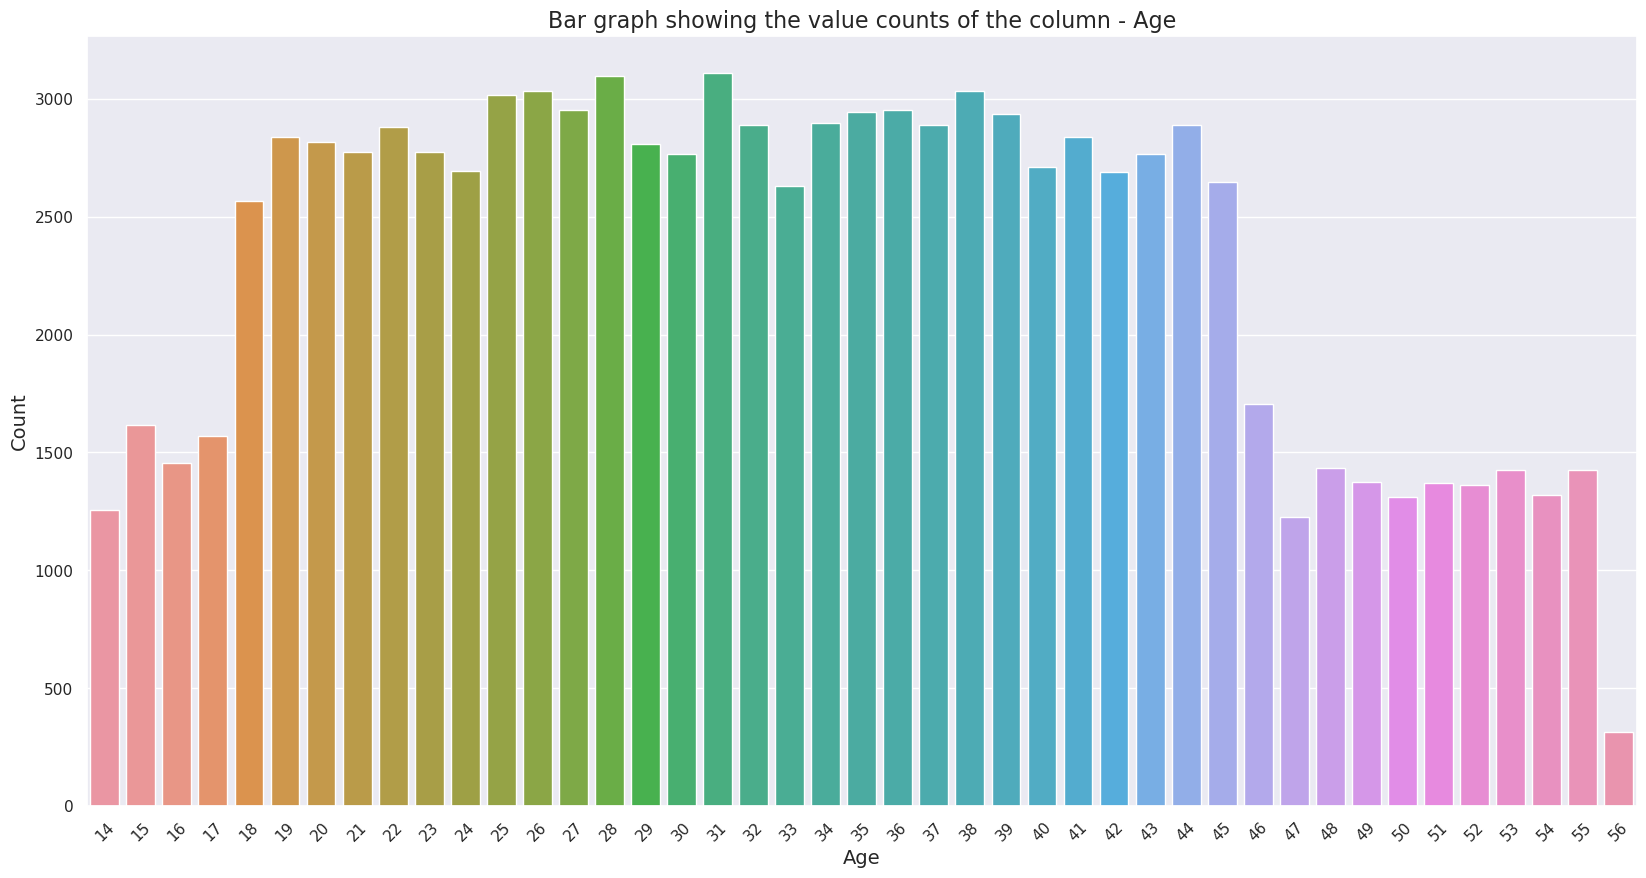

In [32]:
age_count = train_data['Age'].value_counts(dropna = False)
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=age_count.index, y=age_count.values)
plt.title('Bar graph showing the value counts of the column - Age', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.xticks(rotation=45)
plt.show()

По данному графику можно определить, что большинство клиентов находятся в возрастном диапазоне от 18 до 45 лет.

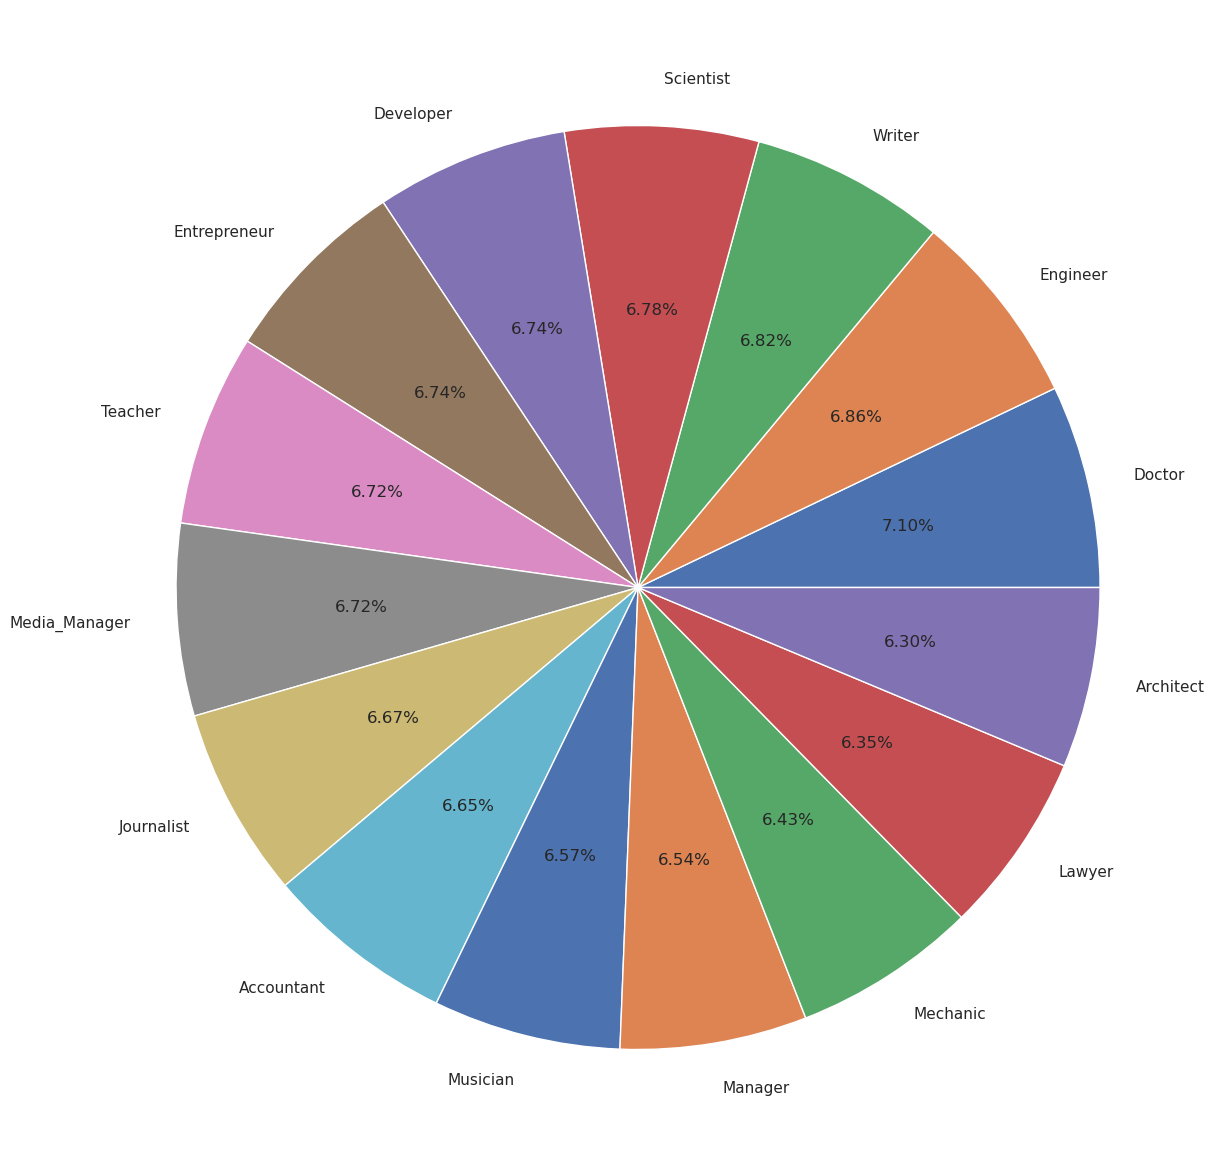

In [33]:
Occupation = train_data['Occupation'].value_counts().tolist()
labels = train_data['Occupation'].values.tolist()
labels = list(set(labels))
plt.figure(figsize = (15,15))
plt.pie(Occupation, labels = labels, autopct = '%1.2f%%')
plt.show()

По данному же графику делаю вывод, клиенты достаточно равномерно распределены по всем профессиям.

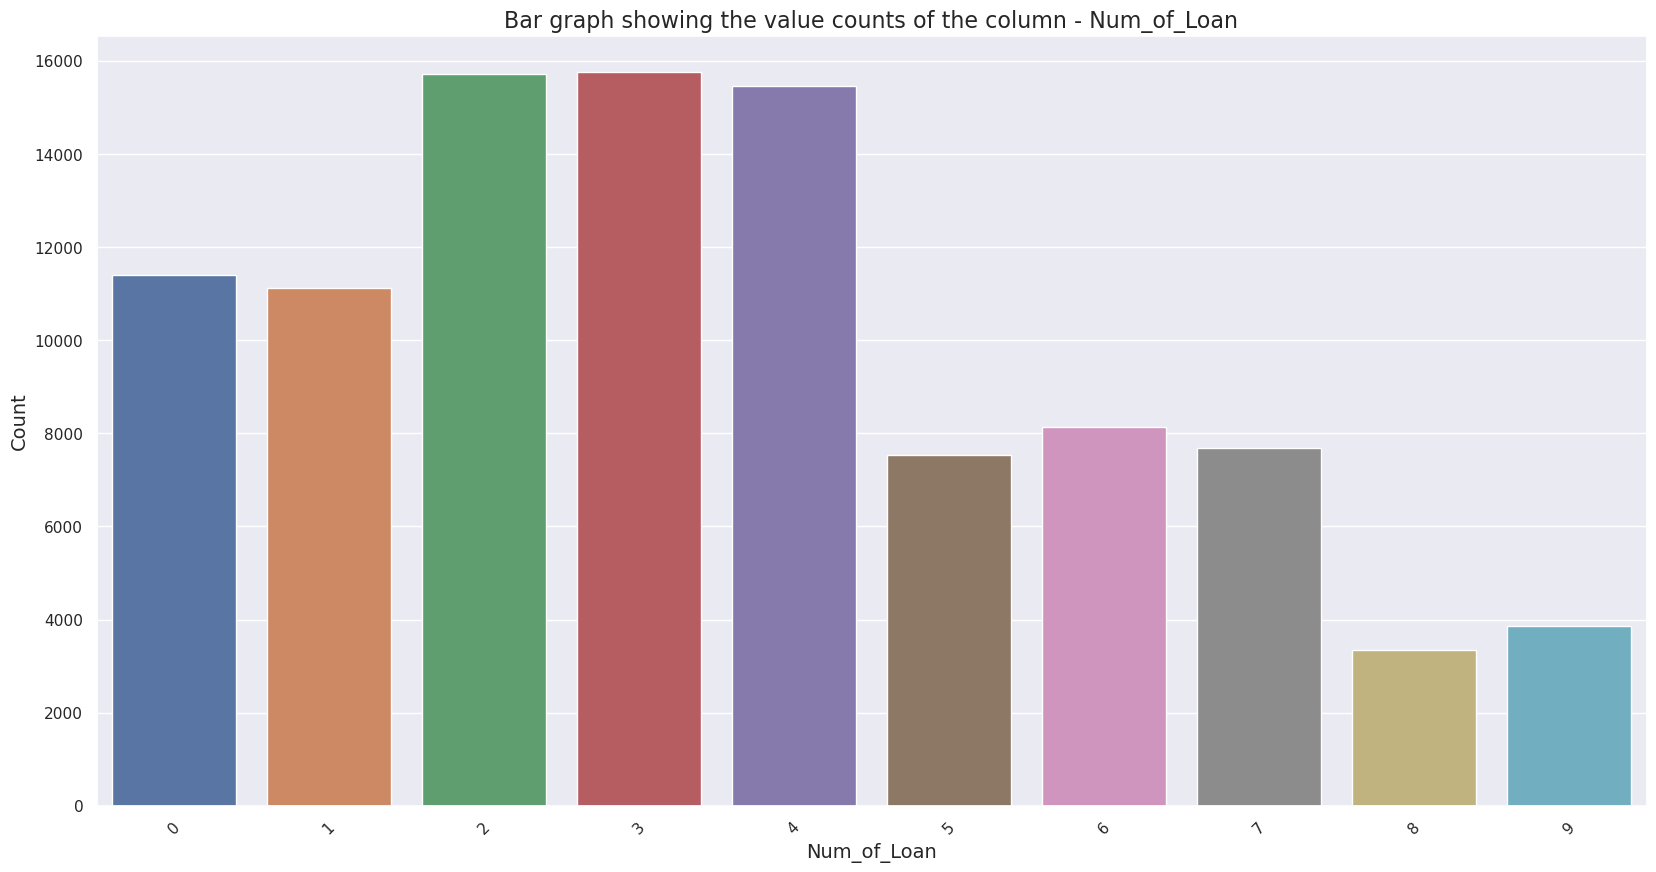

In [34]:
num_of_loan_count = train_data['Num_of_Loan'].value_counts(dropna = False)
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=num_of_loan_count.index, y=num_of_loan_count.values)
plt.title('Bar graph showing the value counts of the column - Num_of_Loan', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Num_of_Loan', fontsize=14)
plt.xticks(rotation=45)
plt.show()

График распределения количества займов говорит о том, что большинство клиентов берут от 2 до 4 займов.

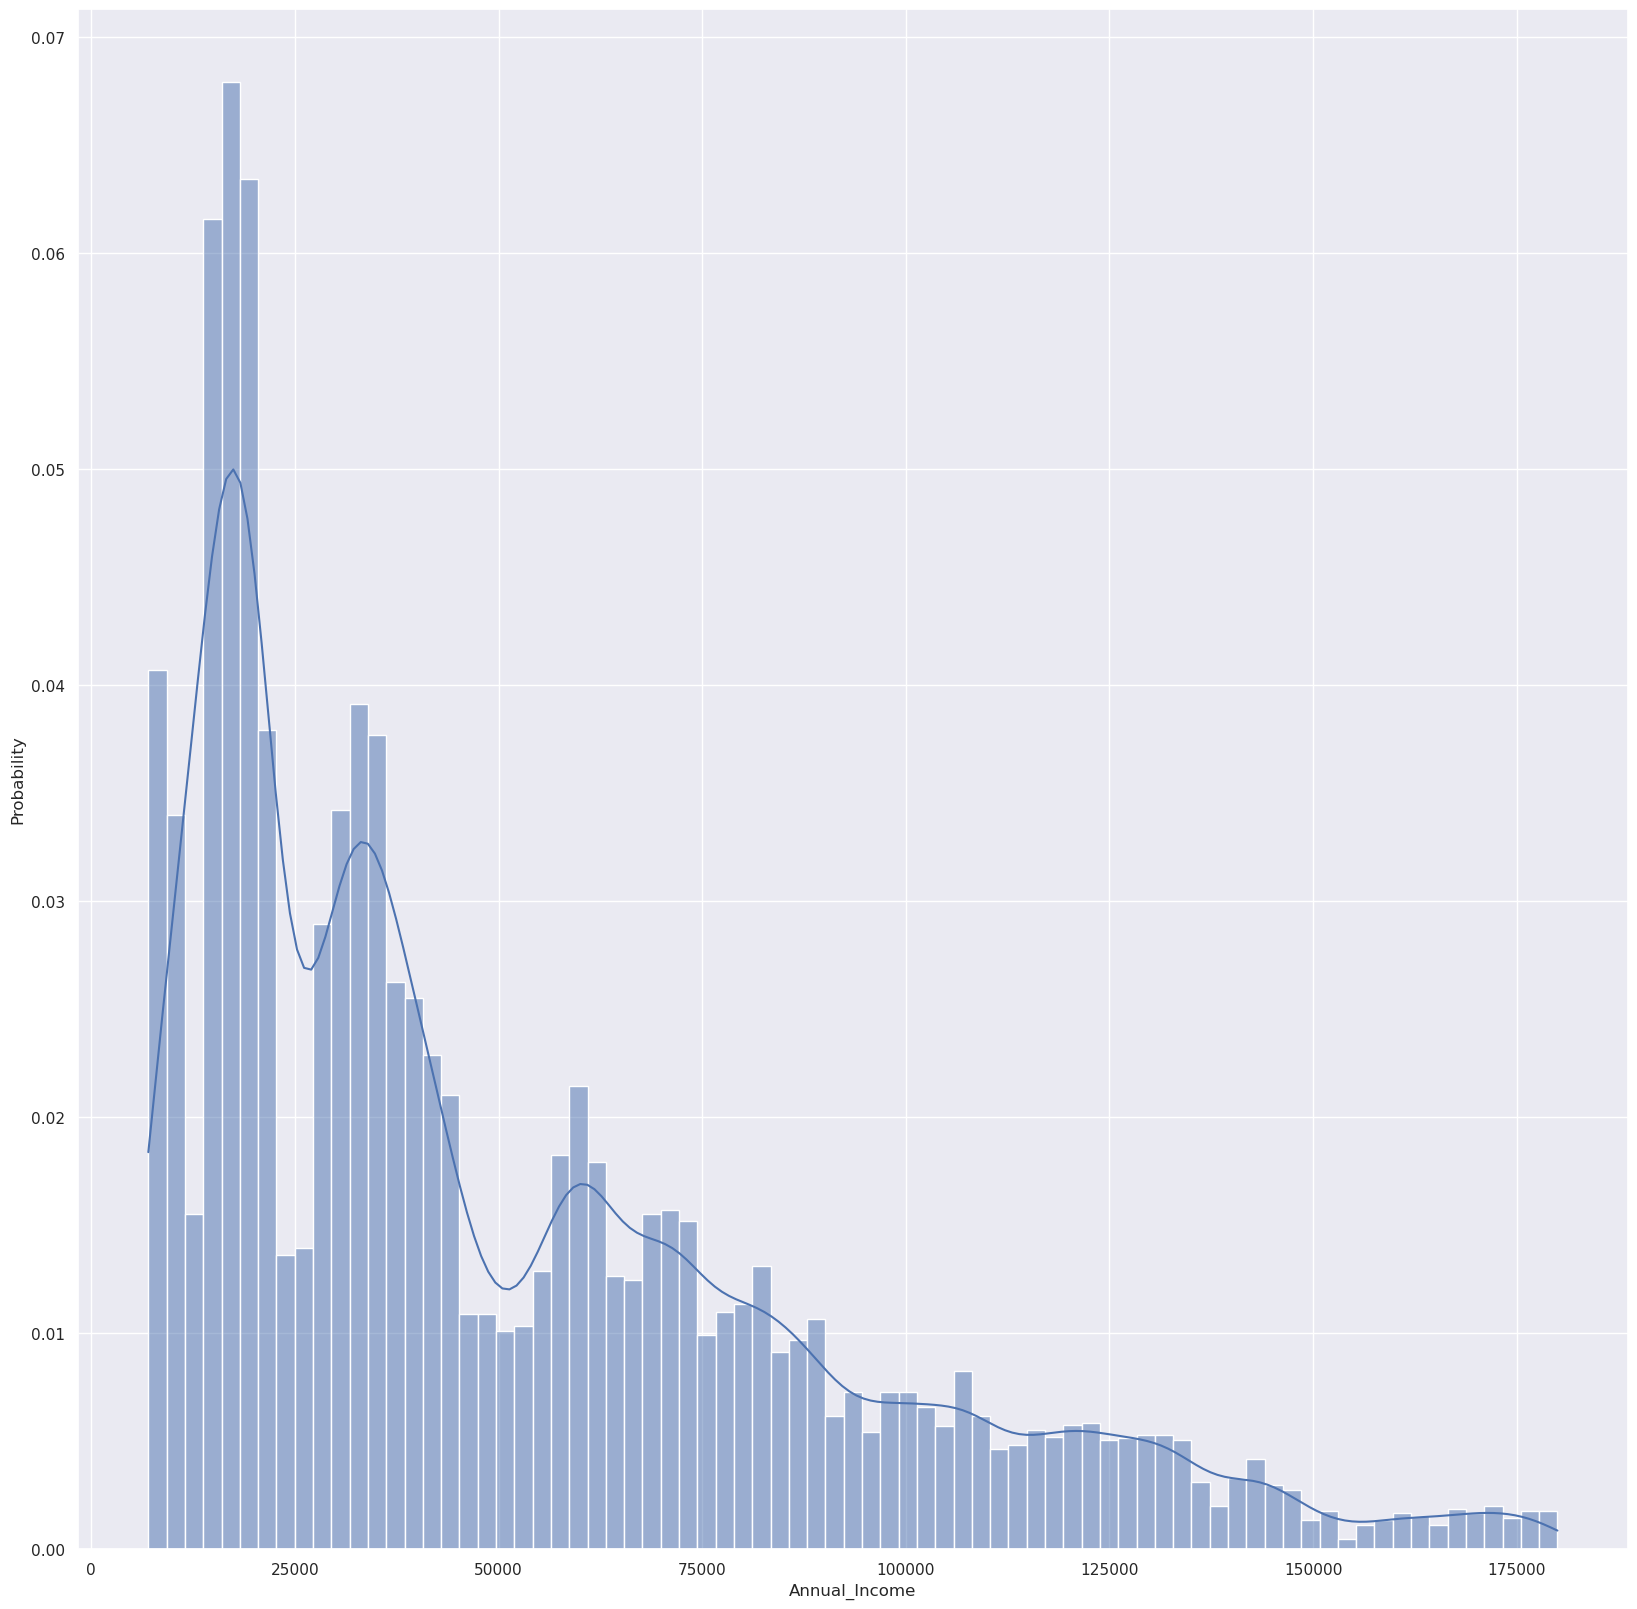

In [35]:
plt.figure(figsize = (20,20))
sns.histplot(data = train_data, x = 'Annual_Income', kde = True, stat = 'probability')
plt.show()

Распределение годового дохода не похоже на нормальное распределение, данную информацию буду использовать, когда буду обрабатывать данные для загрузки в модель.
Также распределение является экспоненциальным и тримодальным, пик приходится примерно на 25000, а также на 30000 и 60000.

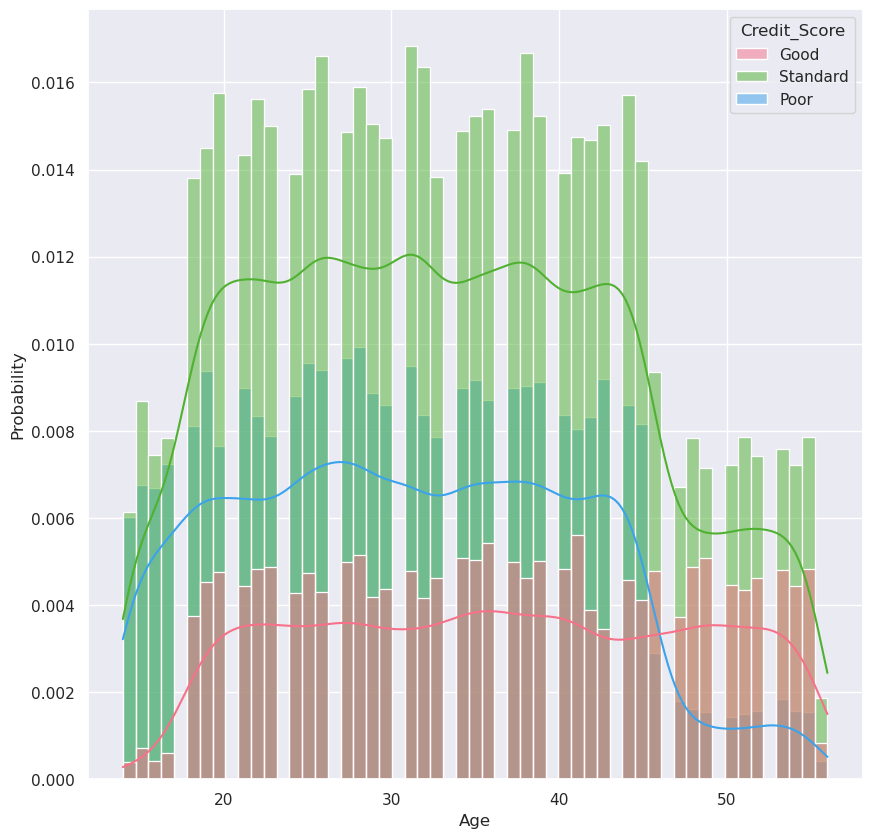

In [36]:
plt.figure(figsize = (10,10))
sns.histplot(data = train_data, x = 'Age', hue = 'Credit_Score', kde = True, stat = 'probability', palette = 'husl')
plt.show()

По данному графику делаем вывод, что клиенты с плохим кредитным рейтингом в основном молодого или среднего возраста, а большинство же клиентов имеют стандартный кредитный рейтинг.

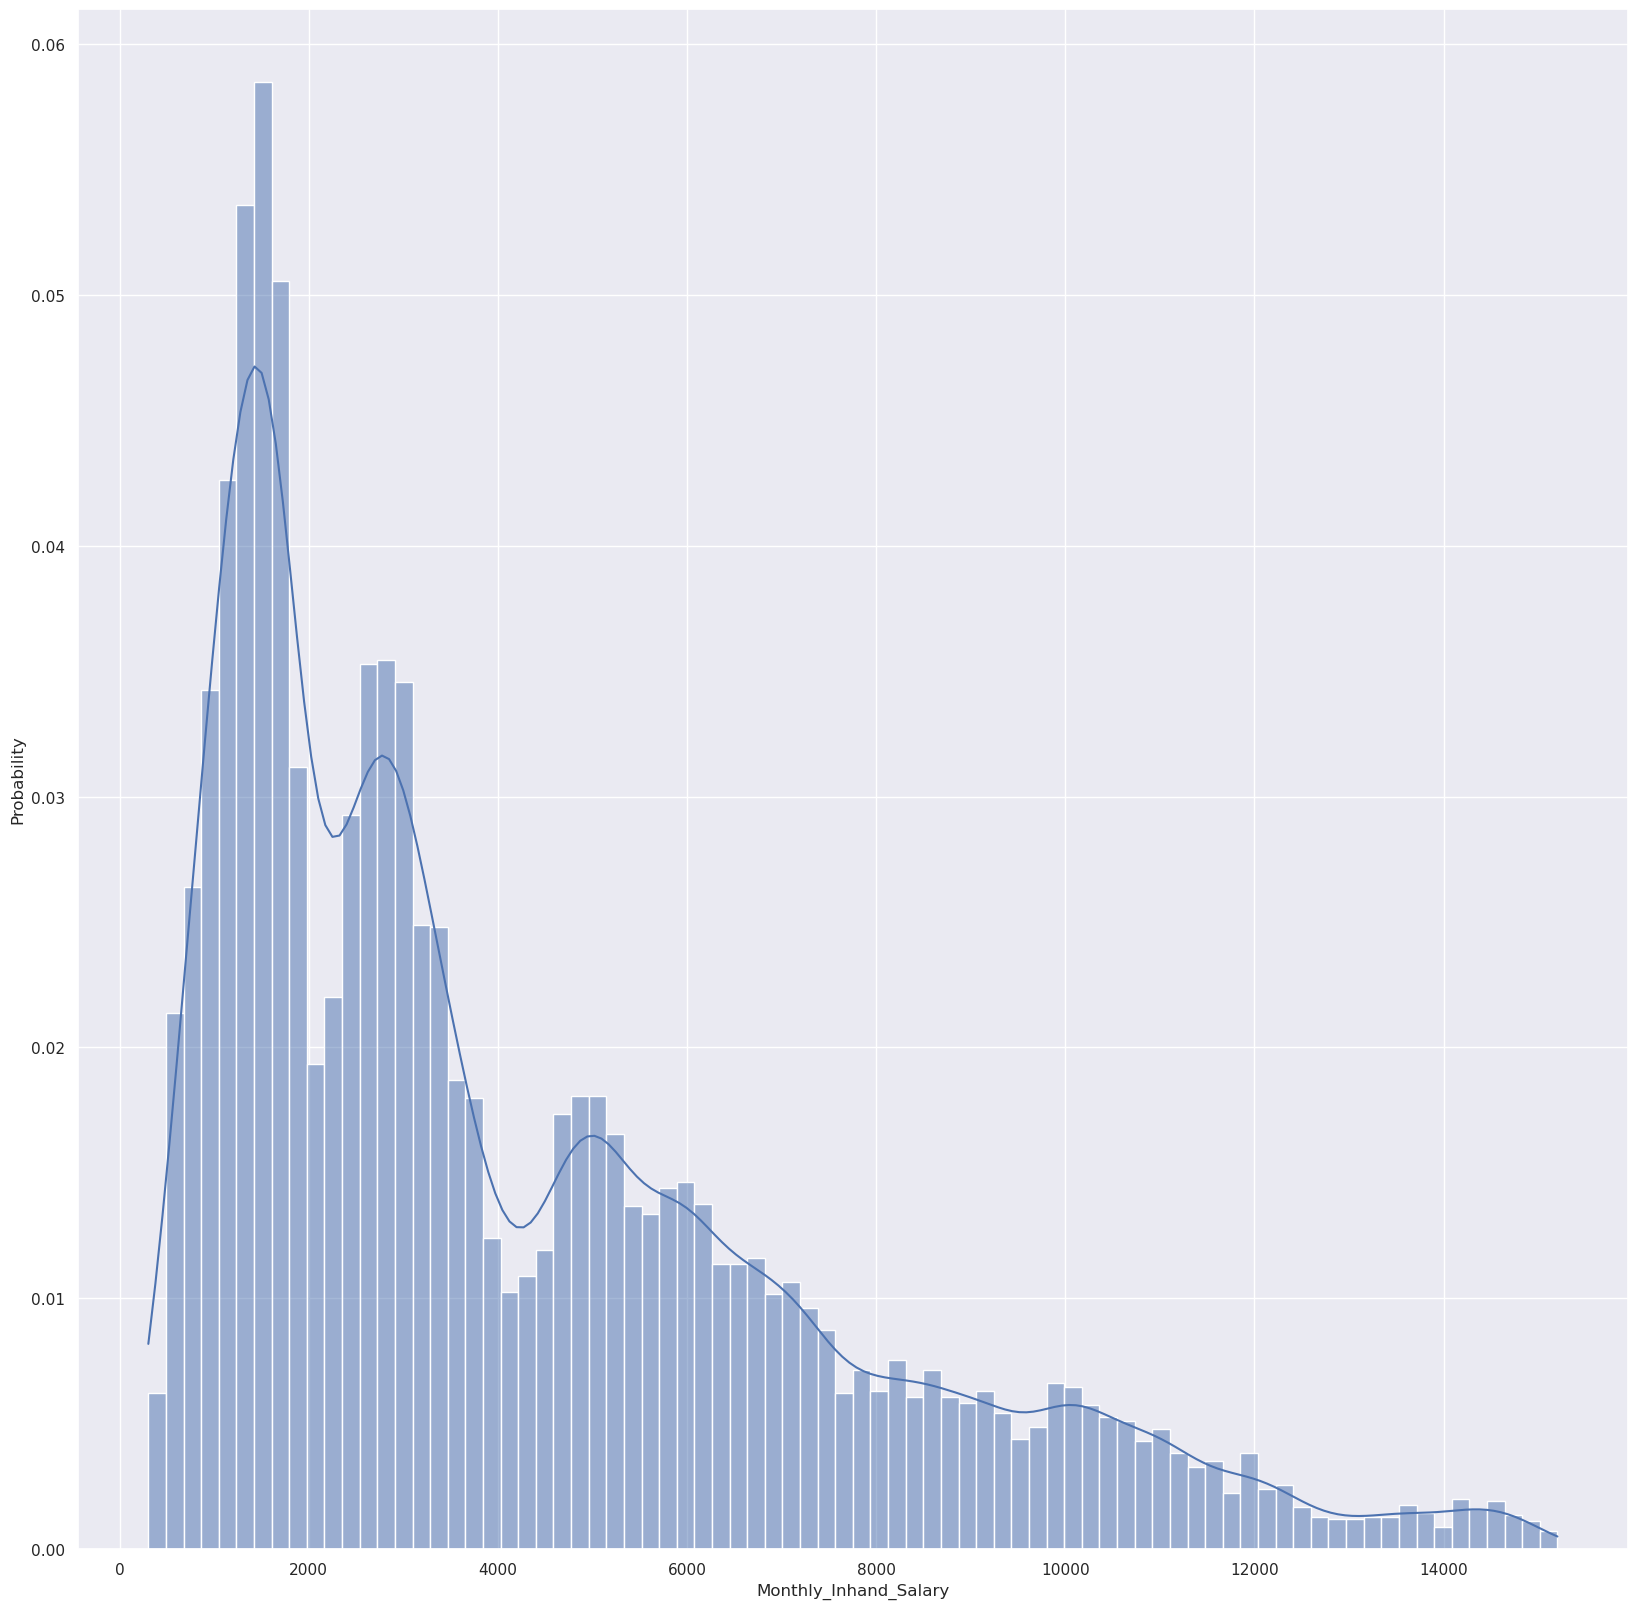

In [37]:
plt.figure(figsize = (20,20))
sns.histplot(data = train_data, x = 'Monthly_Inhand_Salary', kde = True, stat = 'probability')
plt.show()

По данному графику делаем вывод, что данные распределены не нормально.

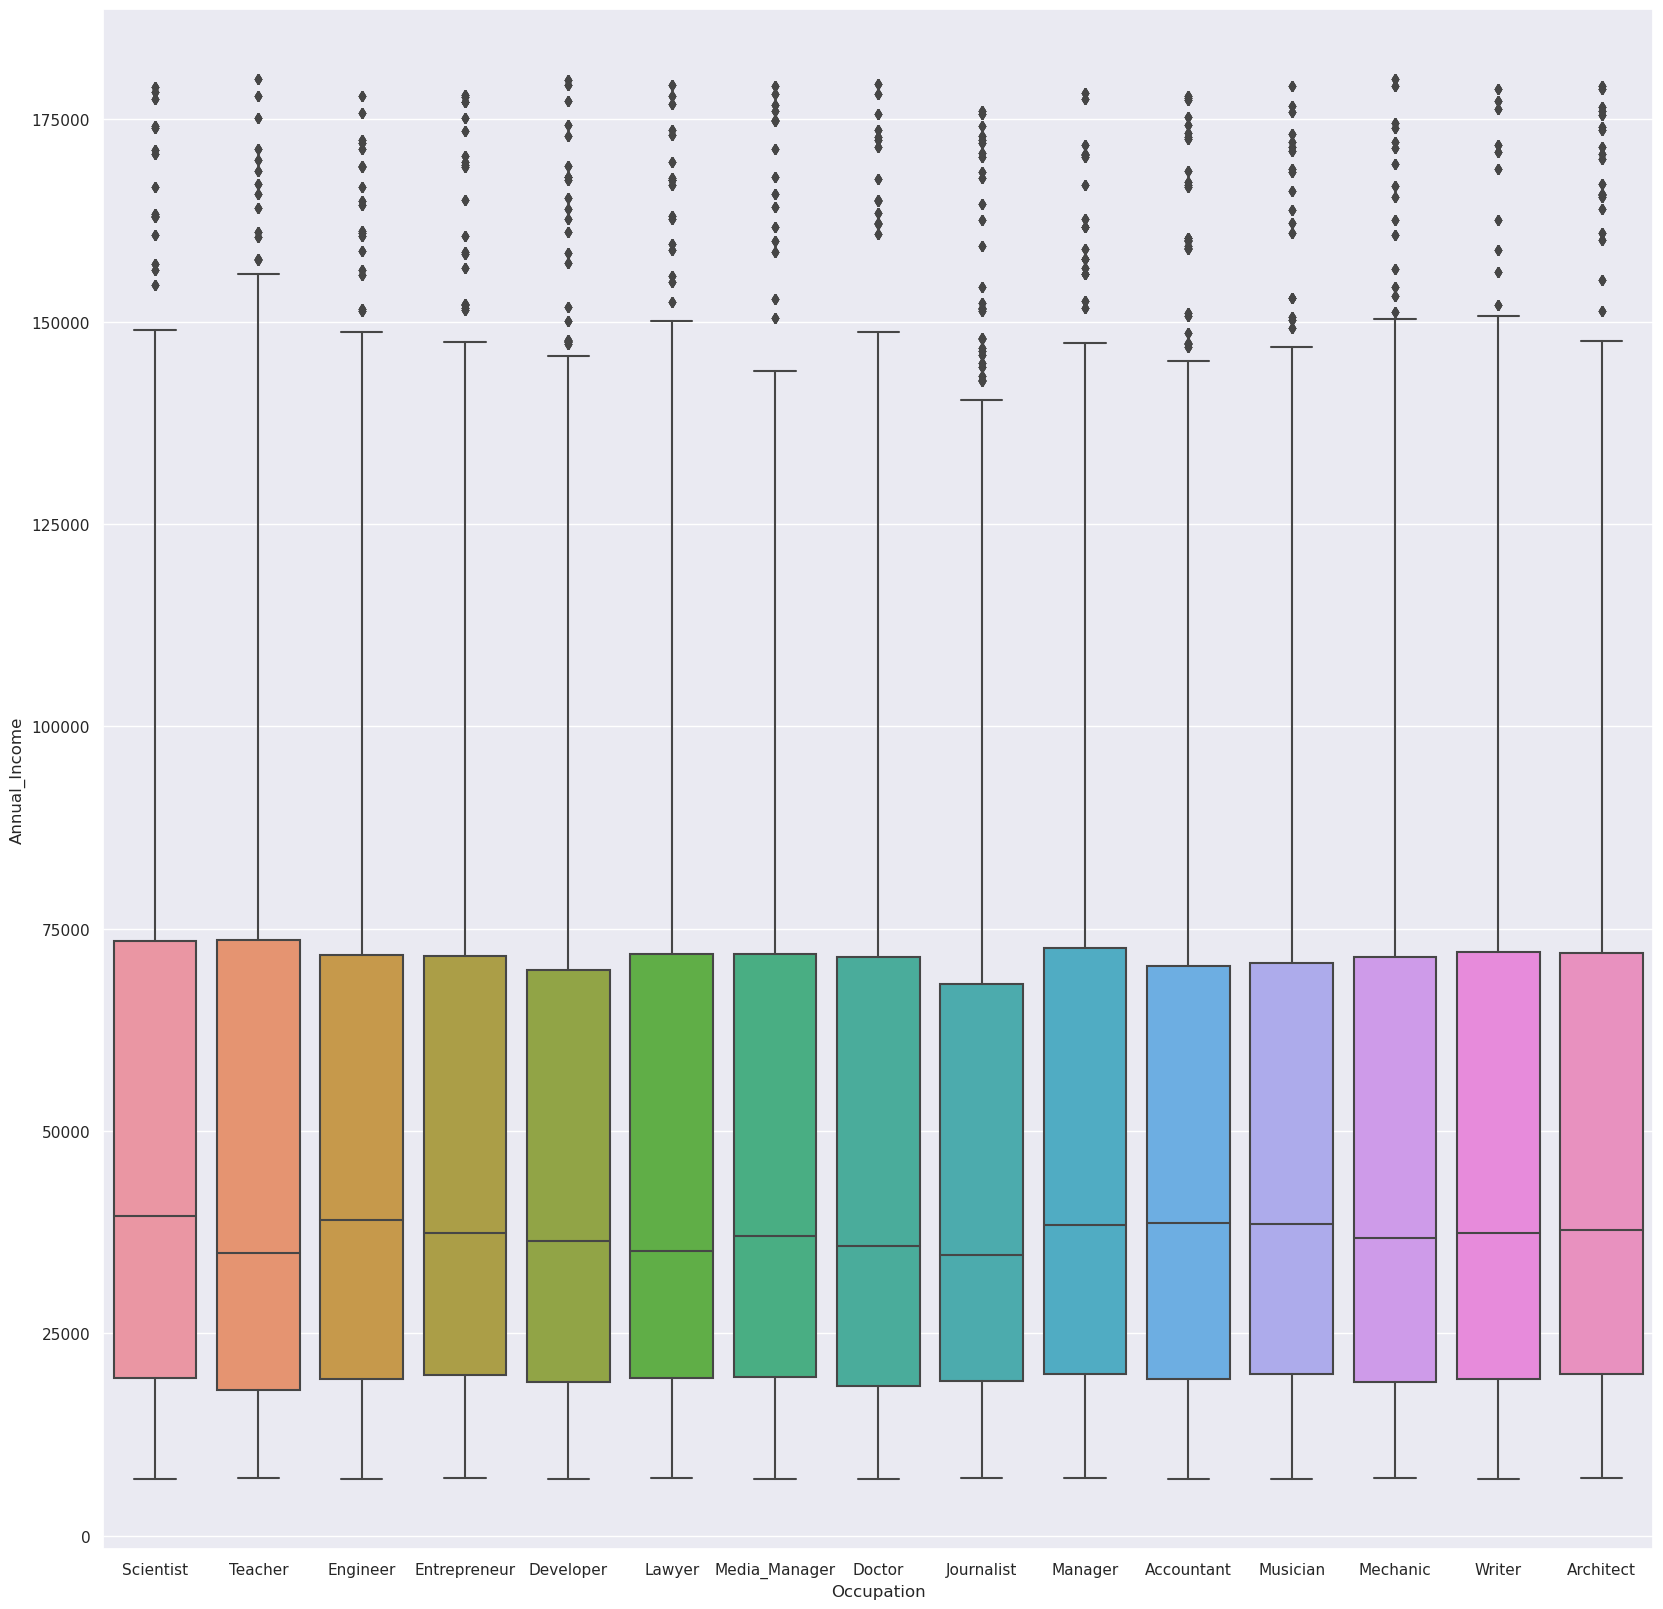

In [38]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = train_data, x = 'Occupation', y = 'Annual_Income')
plt.show()

По данной диаграмме можно видеть, что годовой доход для разных родов деятельности не сильно различается.

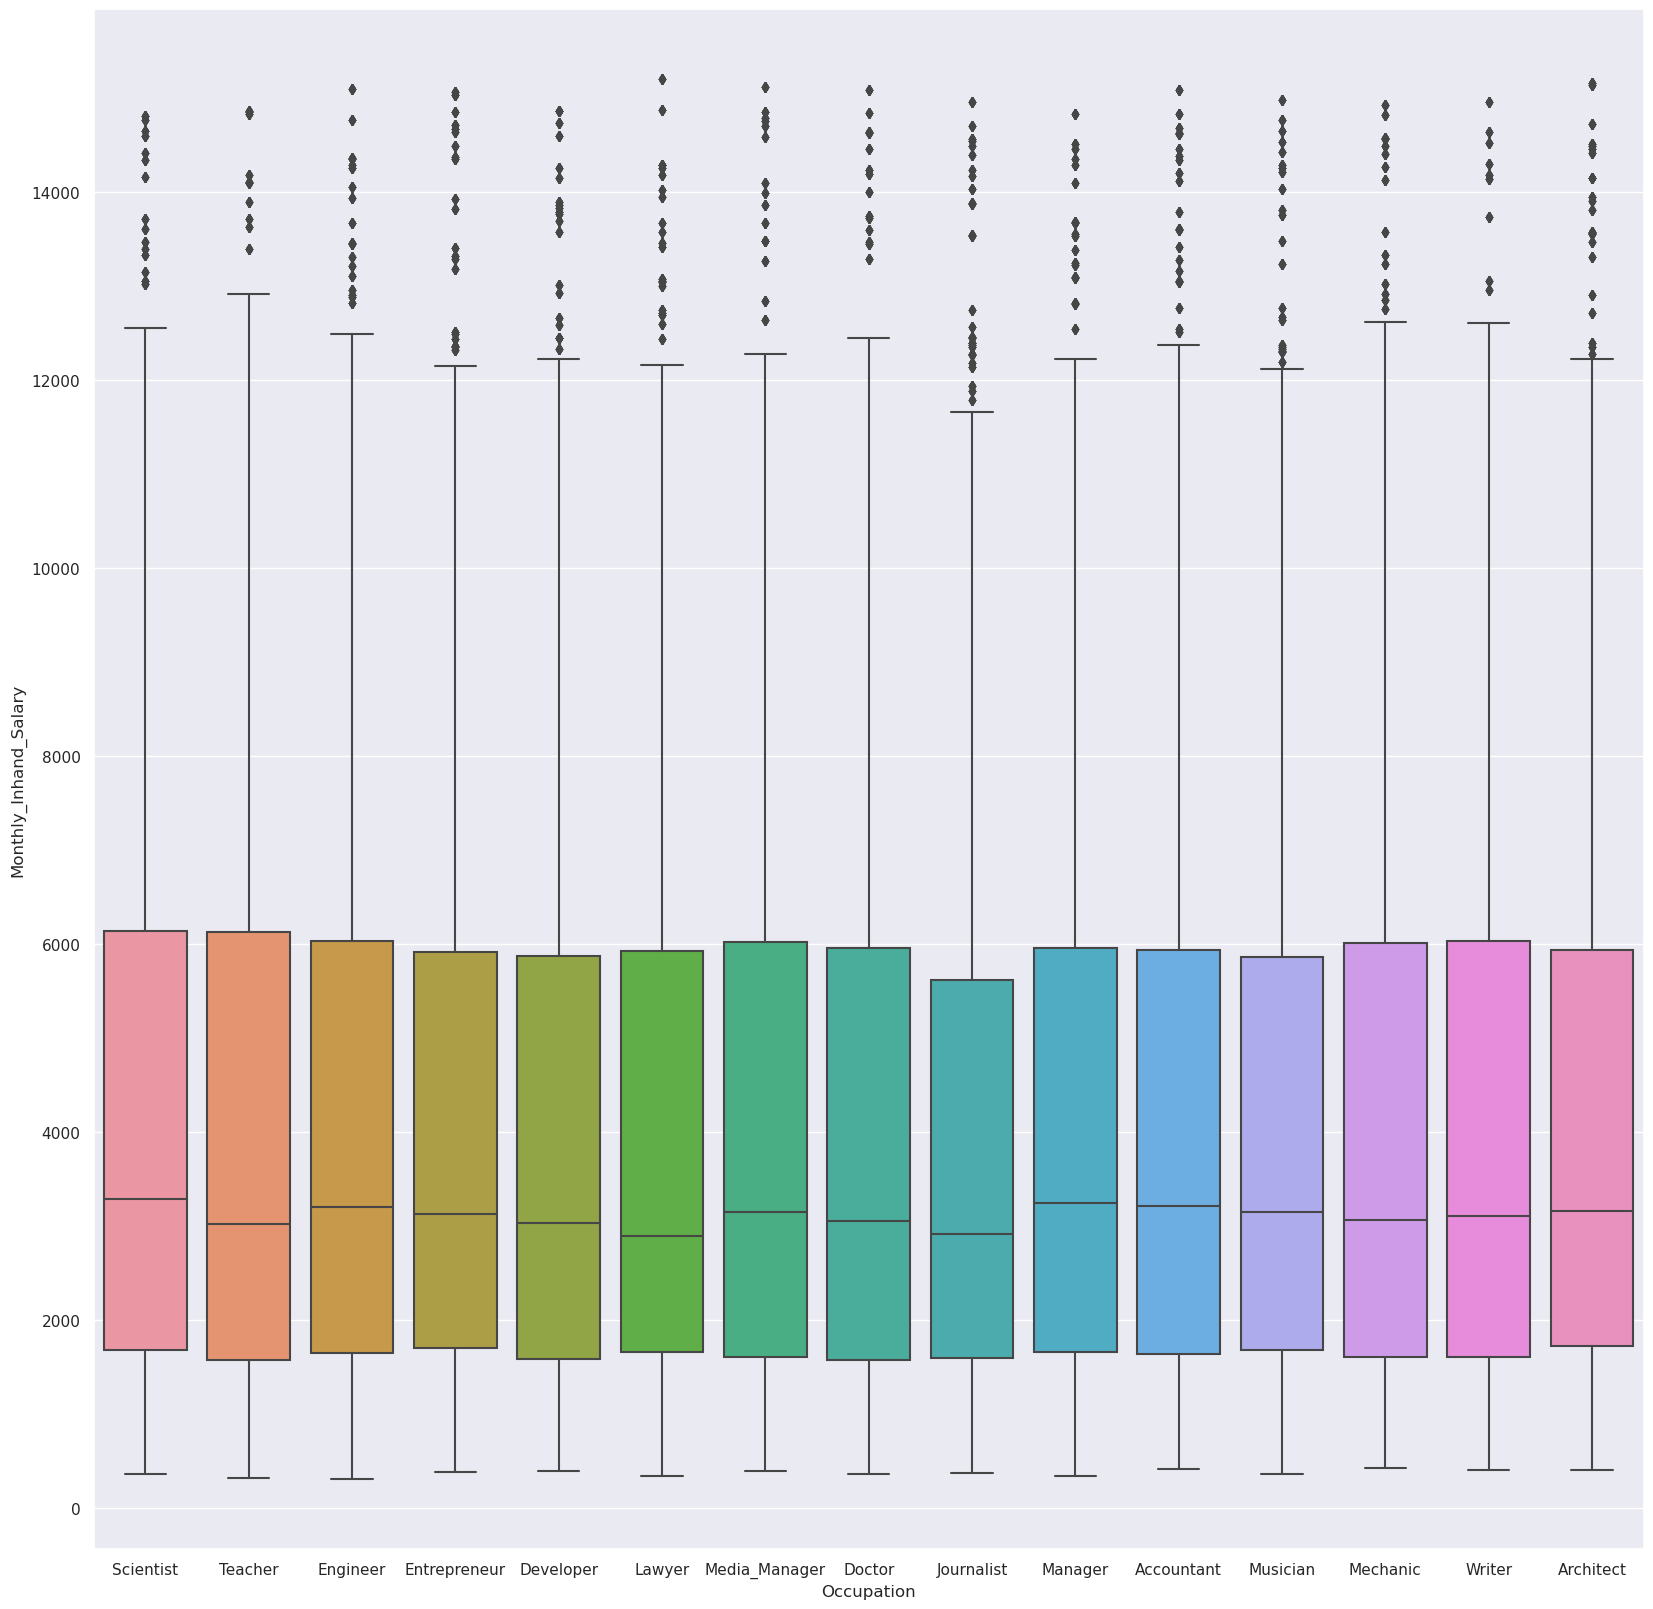

In [39]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = train_data, x = 'Occupation', y = 'Monthly_Inhand_Salary')
plt.show()

Месячная заработная плата также не сильно различается для разных родов деятельности.

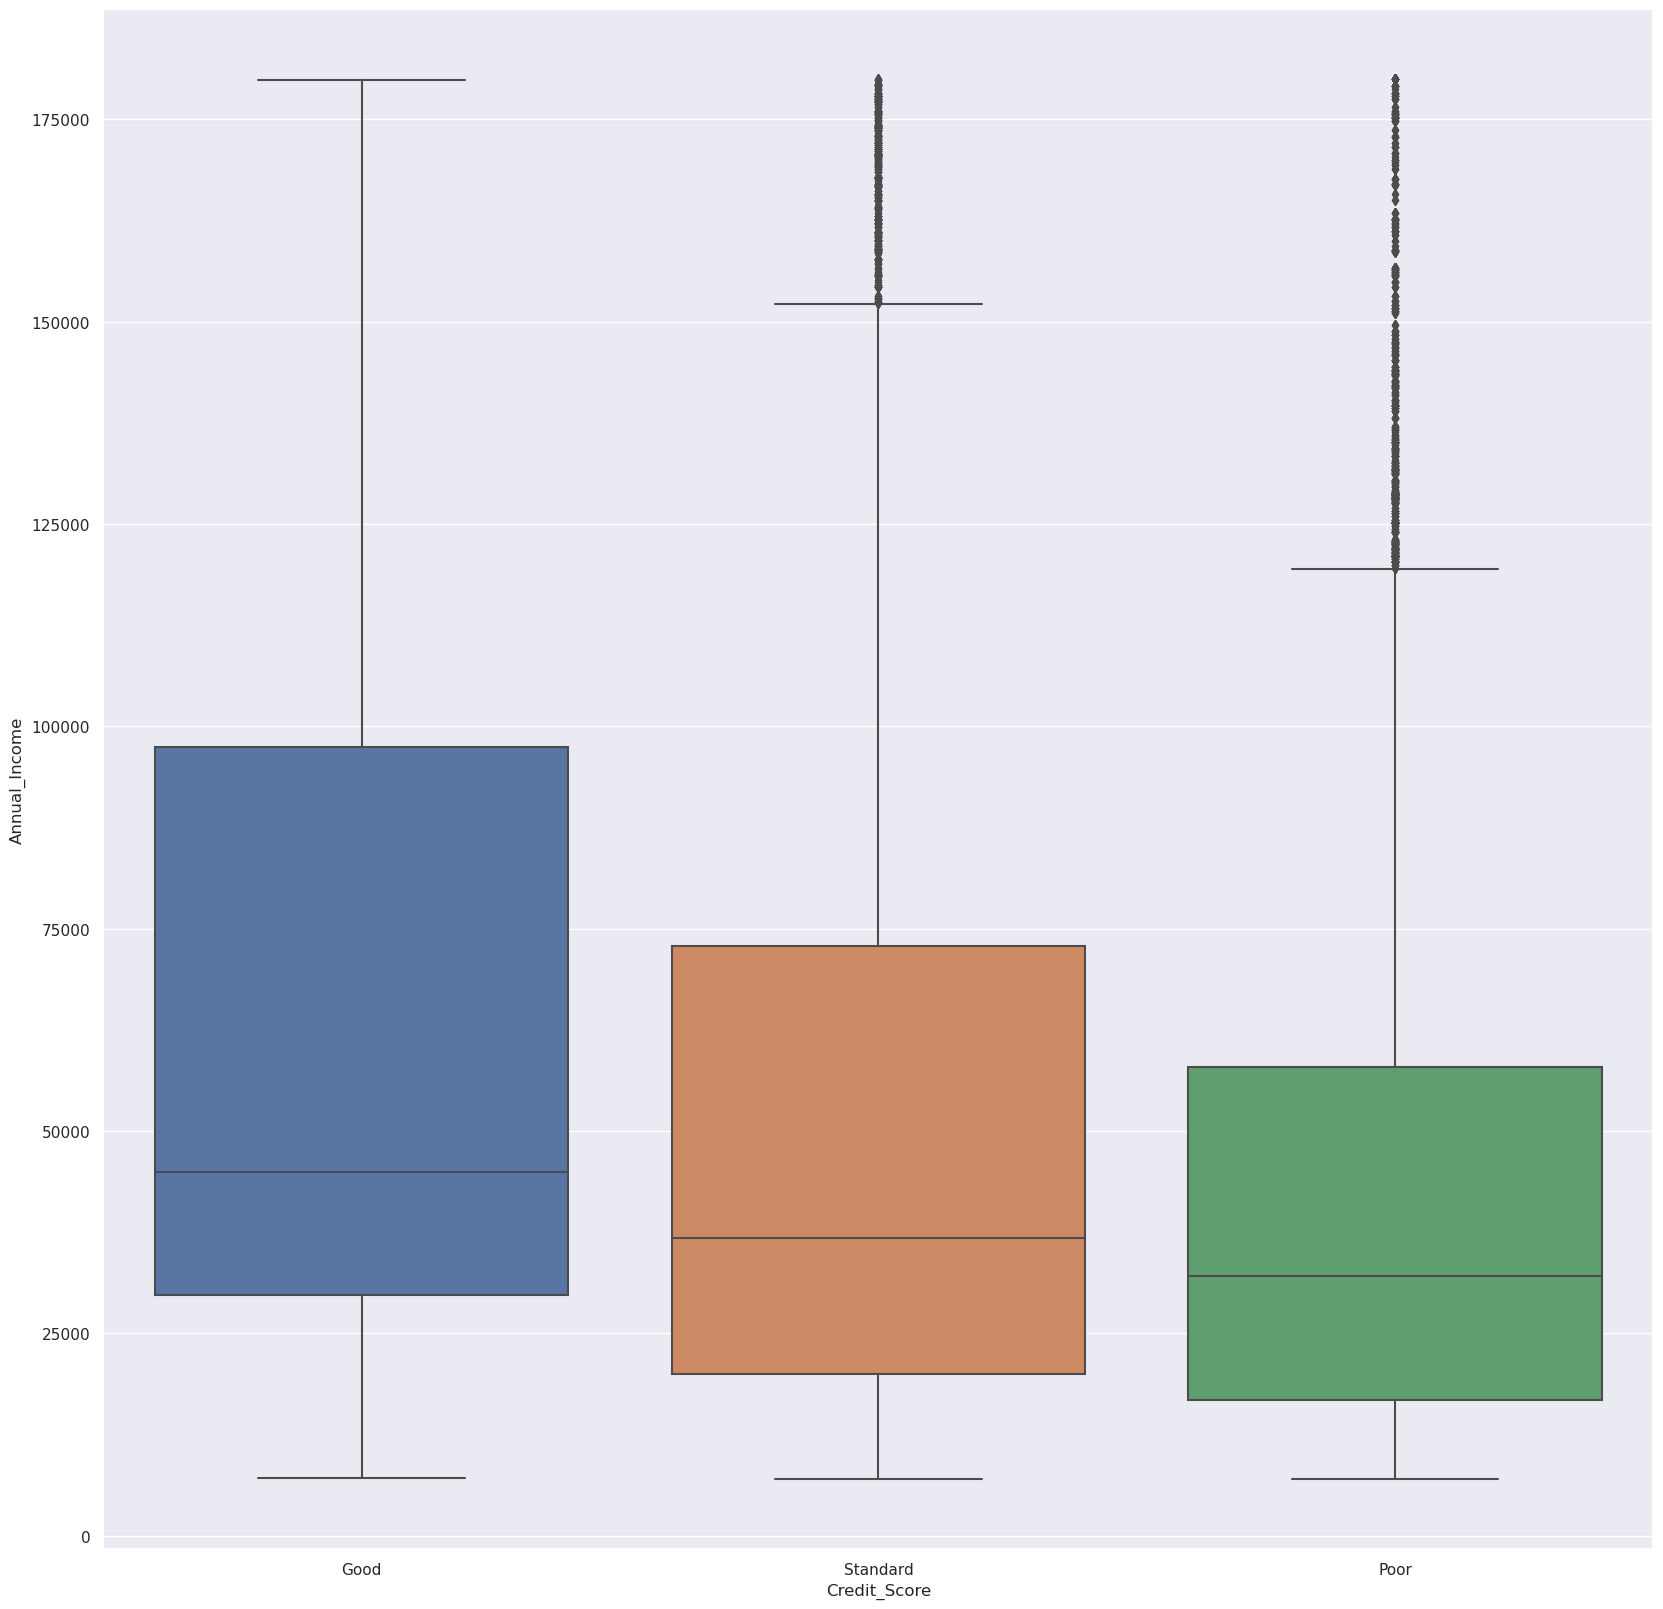

In [40]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = train_data, x = 'Credit_Score', y = 'Annual_Income')
plt.show()

По данному графику можно сделать достаточно очевидный вывод: чем больше годовой доход, тем лучше кредитный рейтинг.

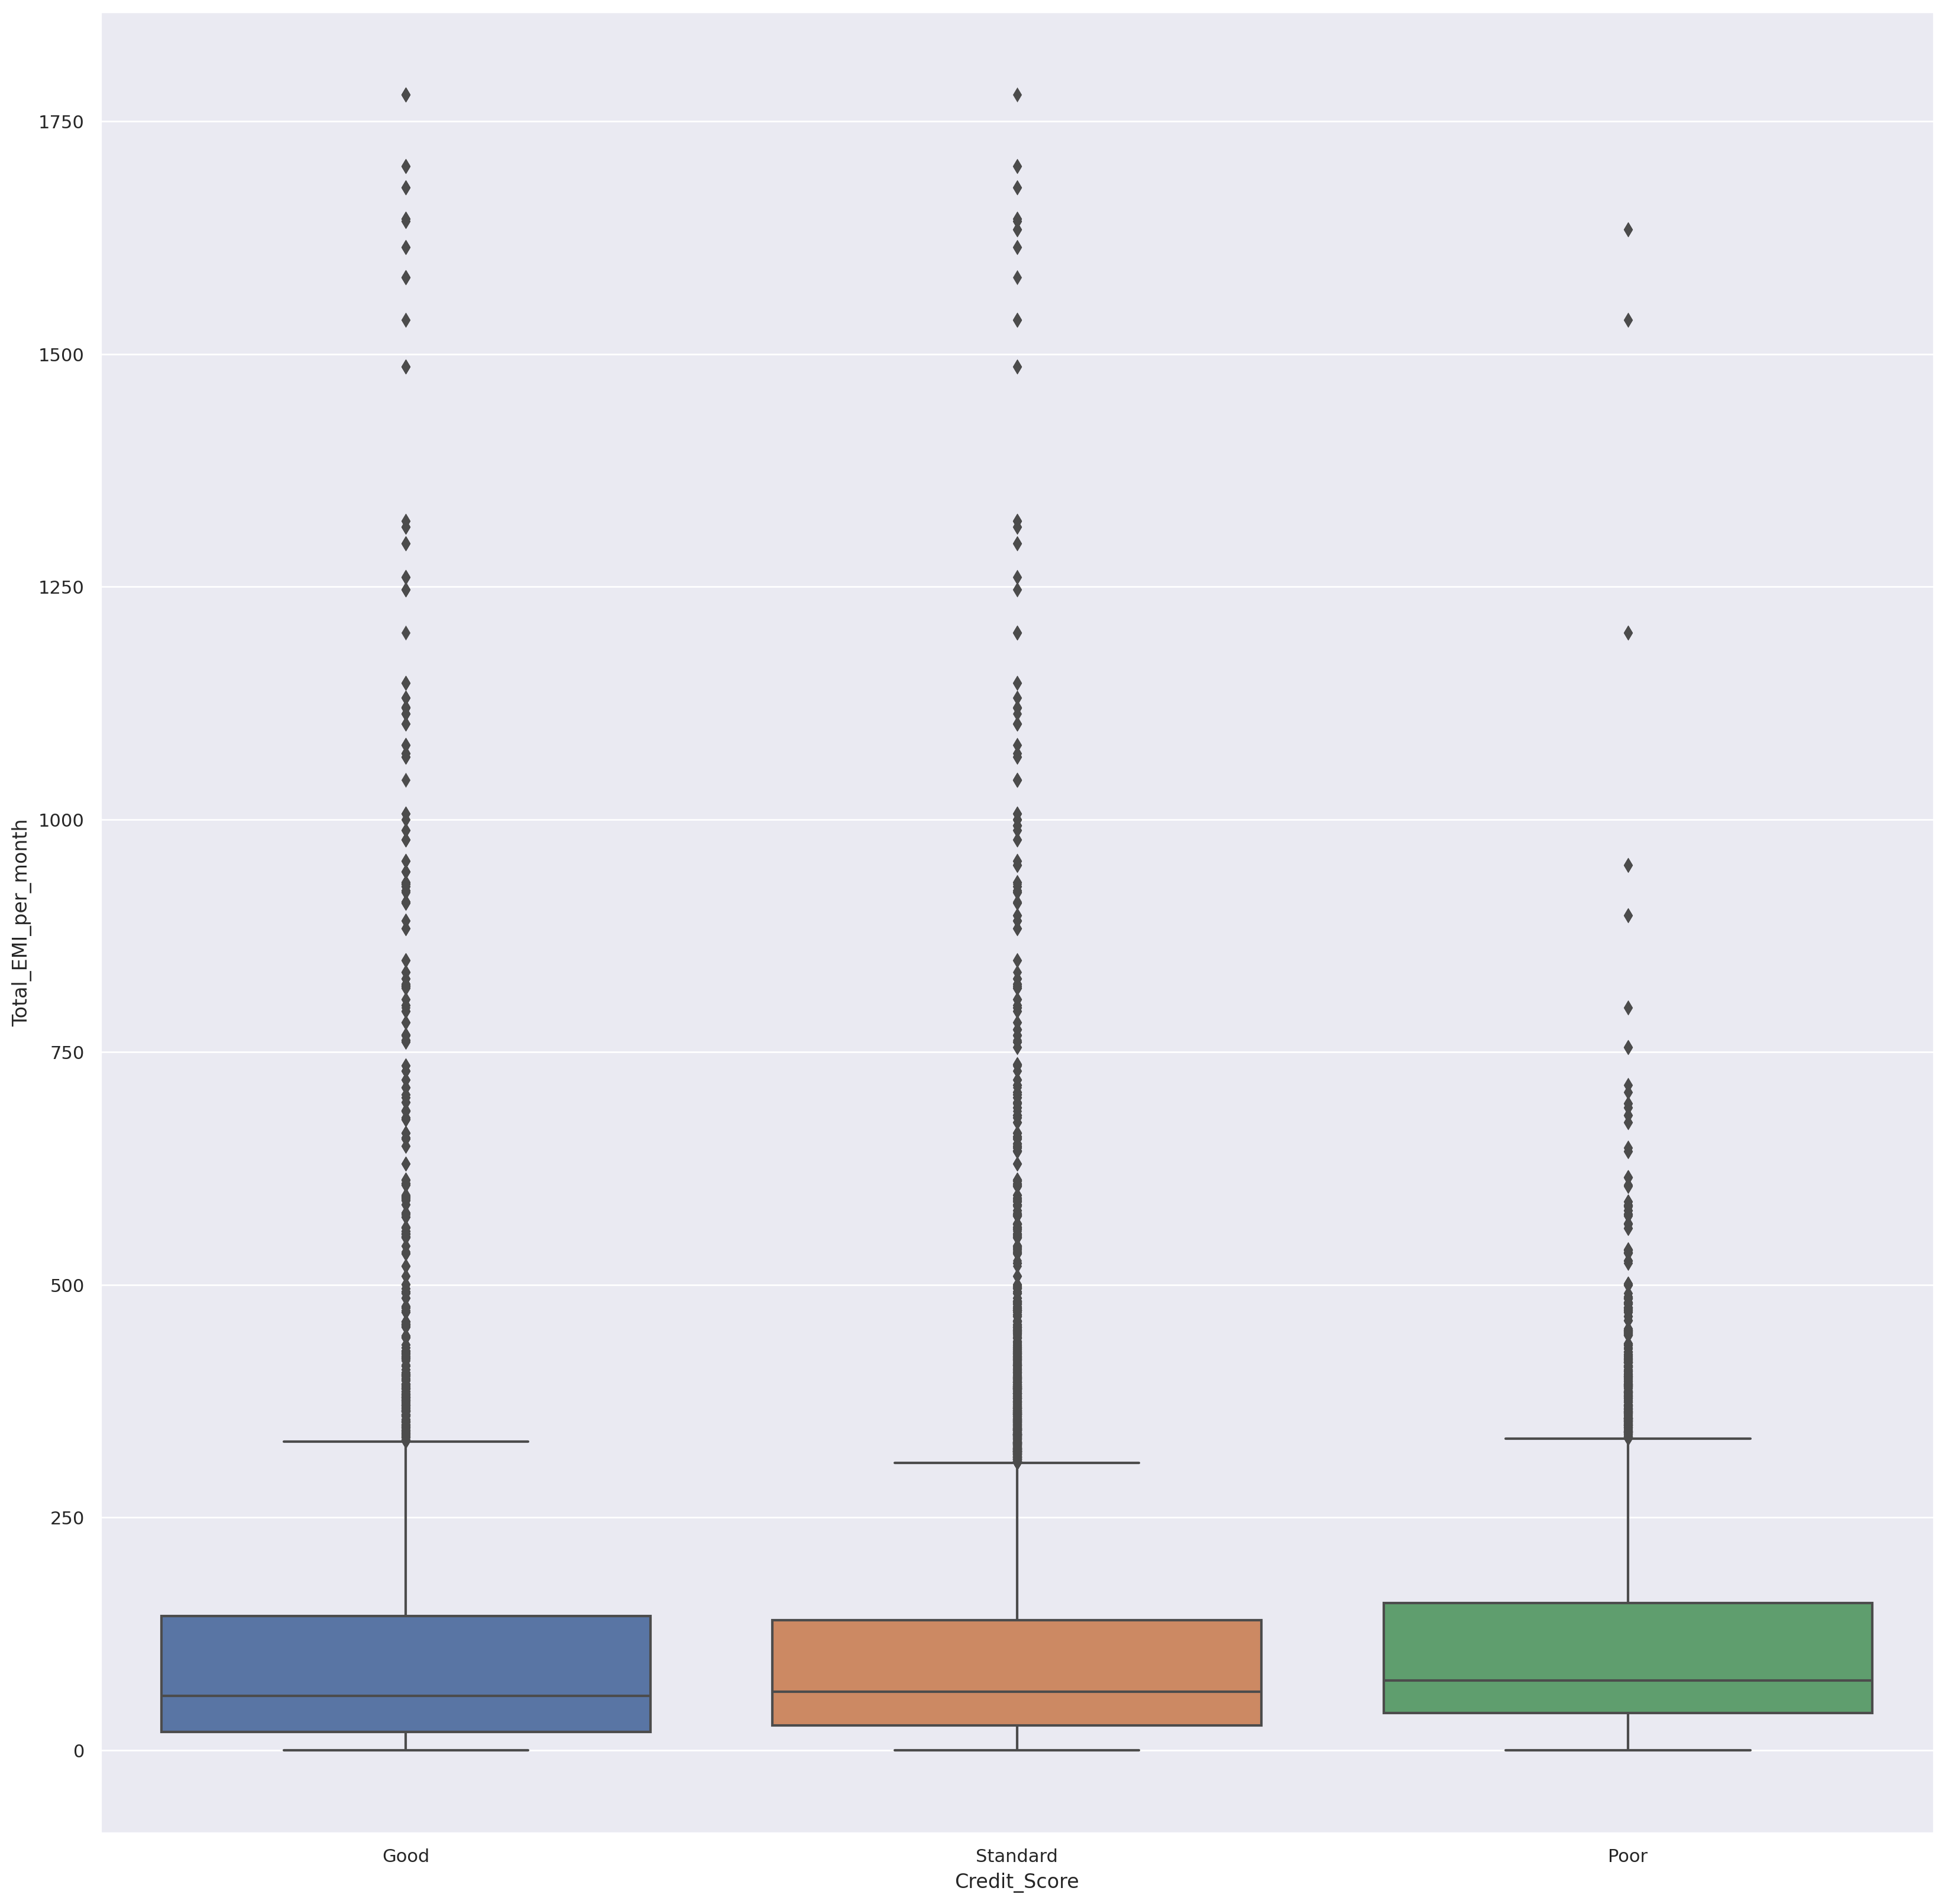

In [41]:
plt.figure(figsize = (20, 20), dpi = 200)
sns.boxplot(data = train_data, x = 'Credit_Score', y = 'Total_EMI_per_month')
plt.show()

Таким образом, общий EMI в месяц не влияет на кредитный рейтинг.

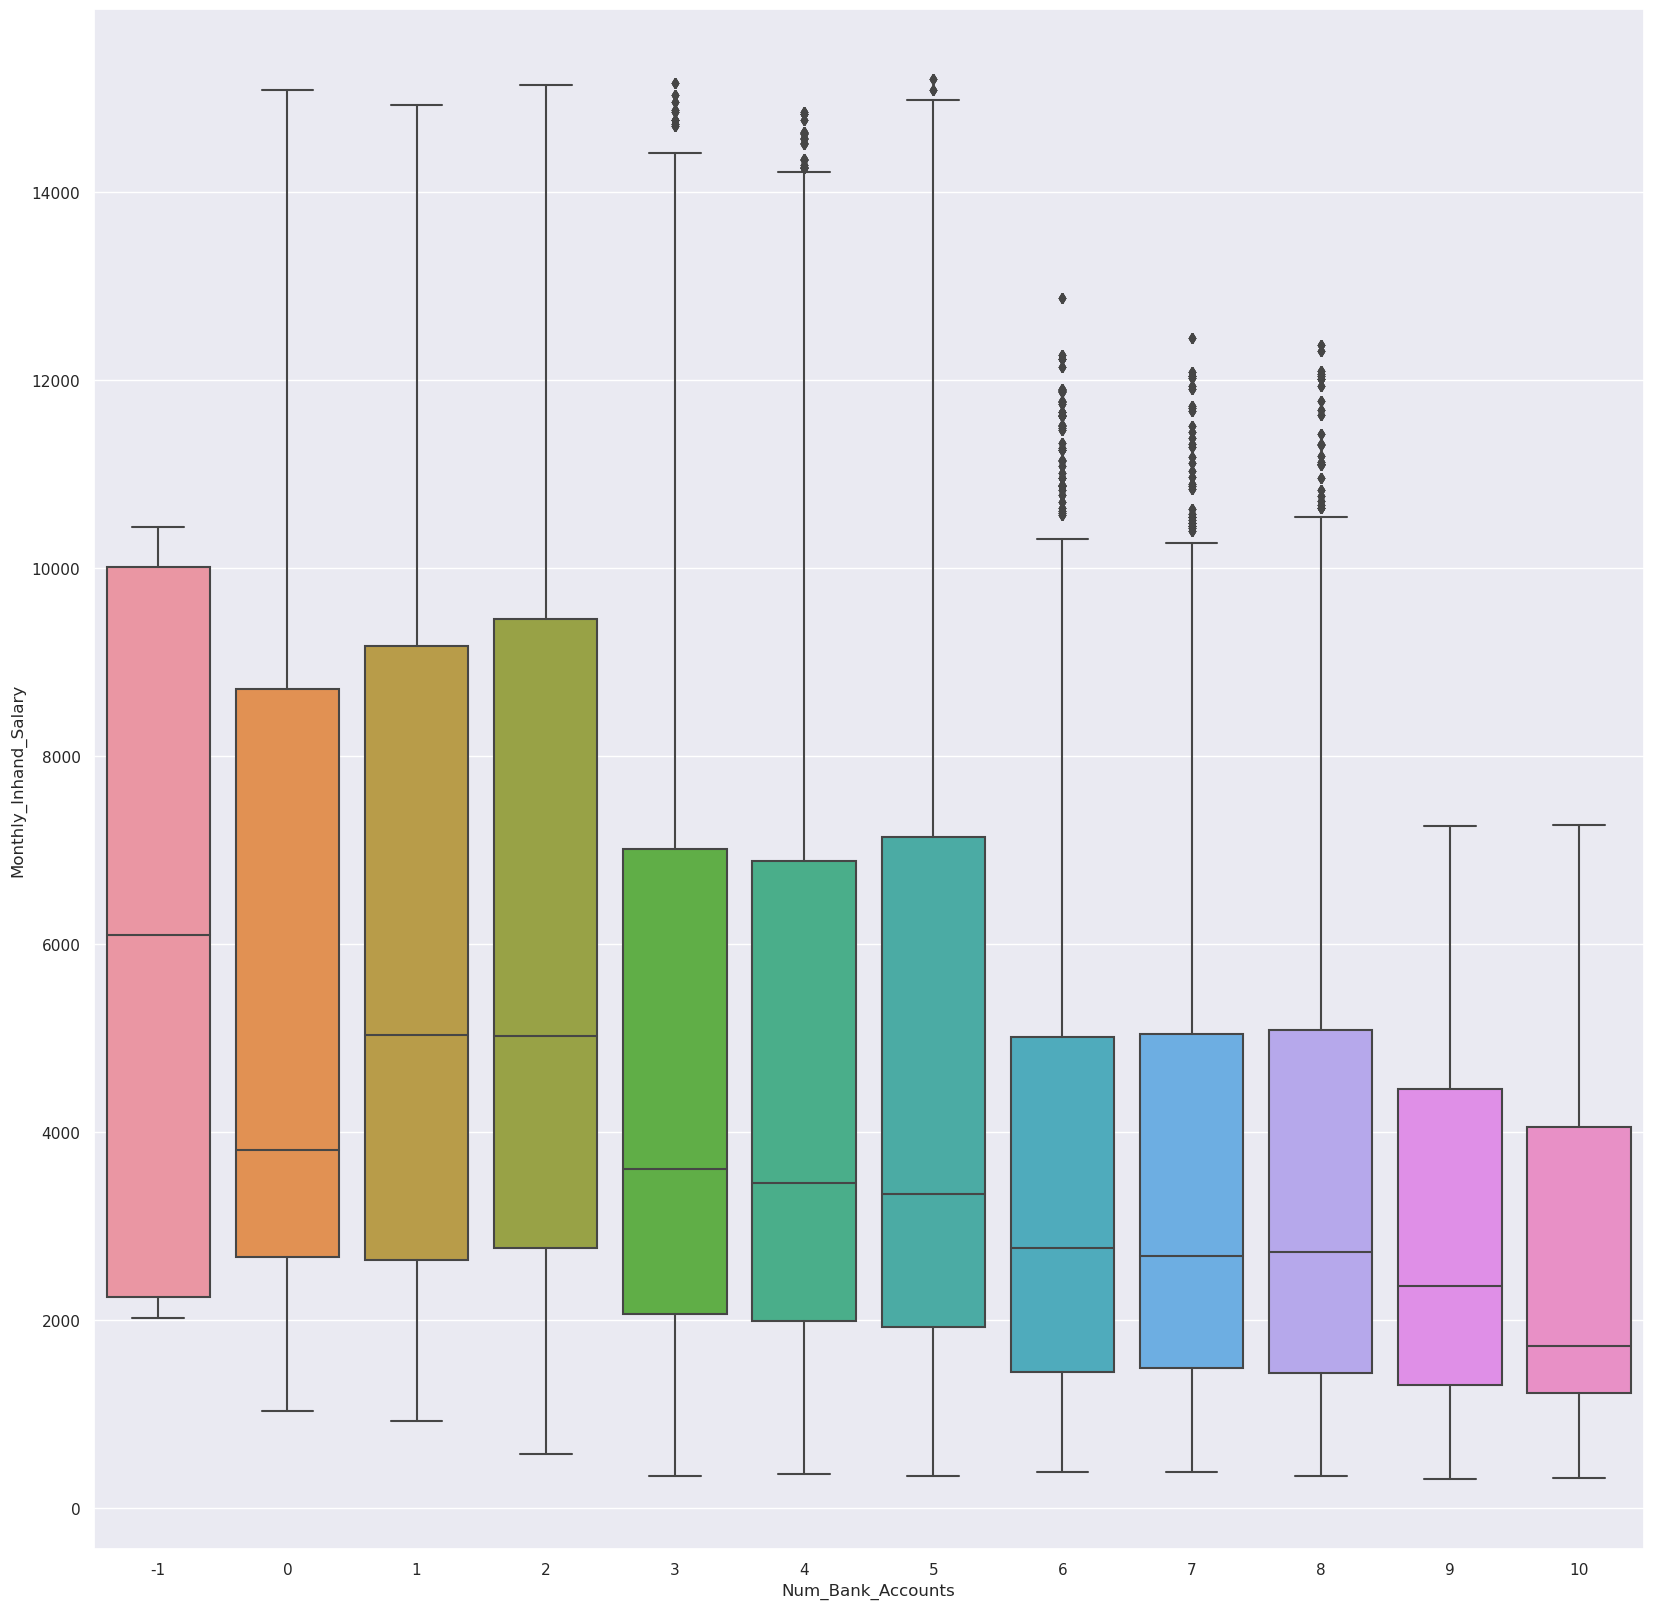

In [42]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = train_data, x = 'Num_Bank_Accounts', y = 'Monthly_Inhand_Salary')
plt.show()

А вот по данной диаграмме видно, что чем меньше месячная заработная плата, тем больше число банковских аккаунтов.

<AxesSubplot:xlabel='Num_Credit_Card', ylabel='count'>

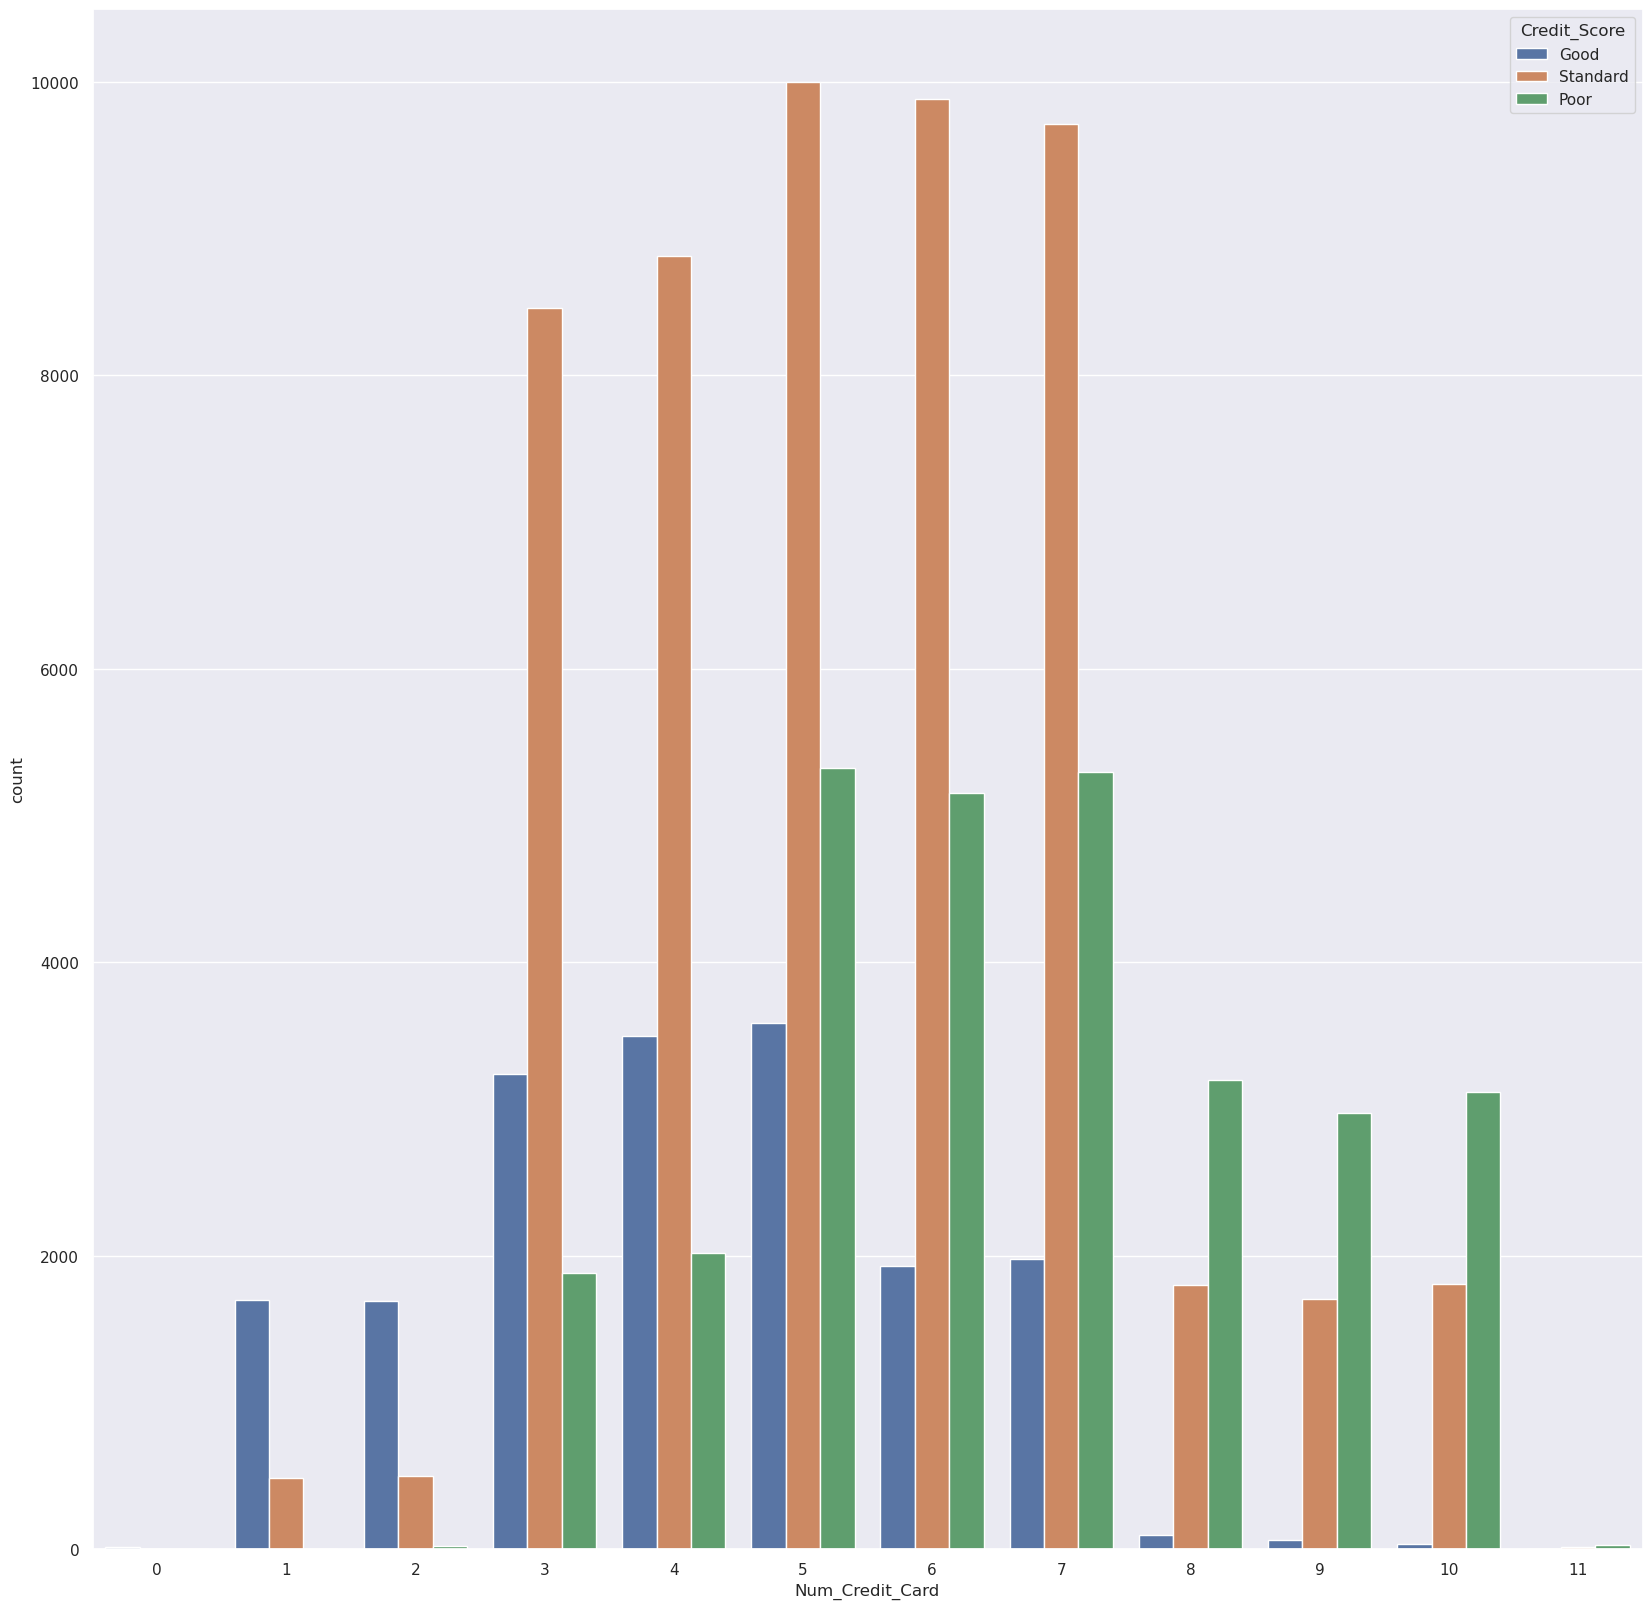

In [43]:
plt.figure(figsize = (20, 20))
sns.countplot(data = train_data, x = 'Num_Credit_Card', hue = 'Credit_Score')

По данной диаграмме видно, что клиенты с плохим кредитным рейтингом имеют кредитных карт больше, чем клиенты с хорошим и стандартными кредитными рейтингами.

<AxesSubplot:xlabel='Num_Credit_Inquiries', ylabel='count'>

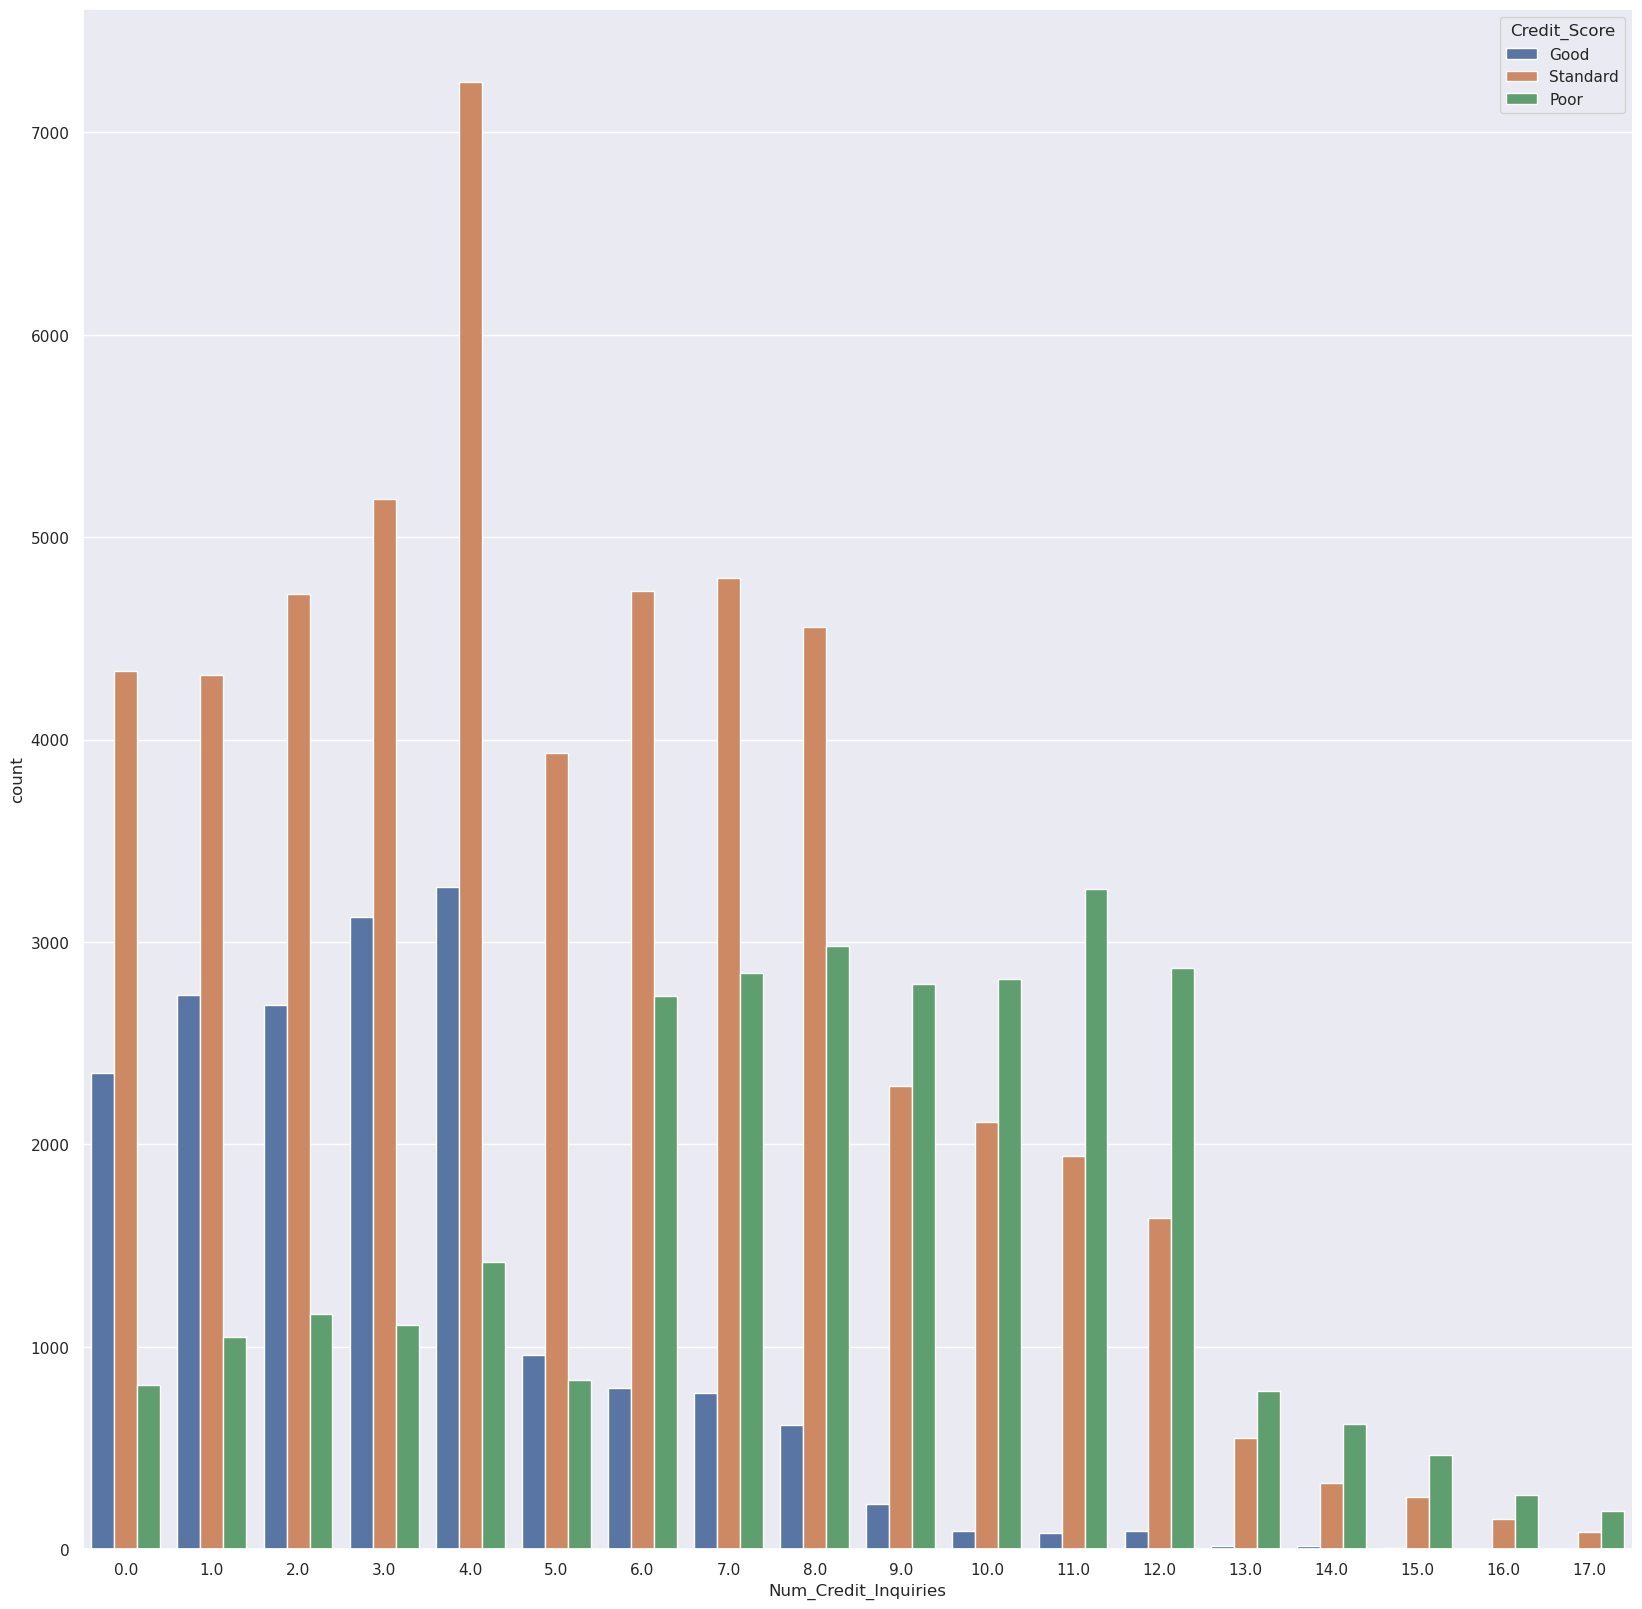

In [44]:
plt.figure(figsize = (20, 20))
sns.countplot(data = train_data, x = 'Num_Credit_Inquiries', hue = 'Credit_Score')

По данному графику понятно, что клиенты с плохим кредитным рейтингом имееют больше запросов на кредитные карты по сравнению с клиентами с хорошим и стандартным кредитными рейтингами.

<AxesSubplot:xlabel='Num_of_Loan', ylabel='count'>

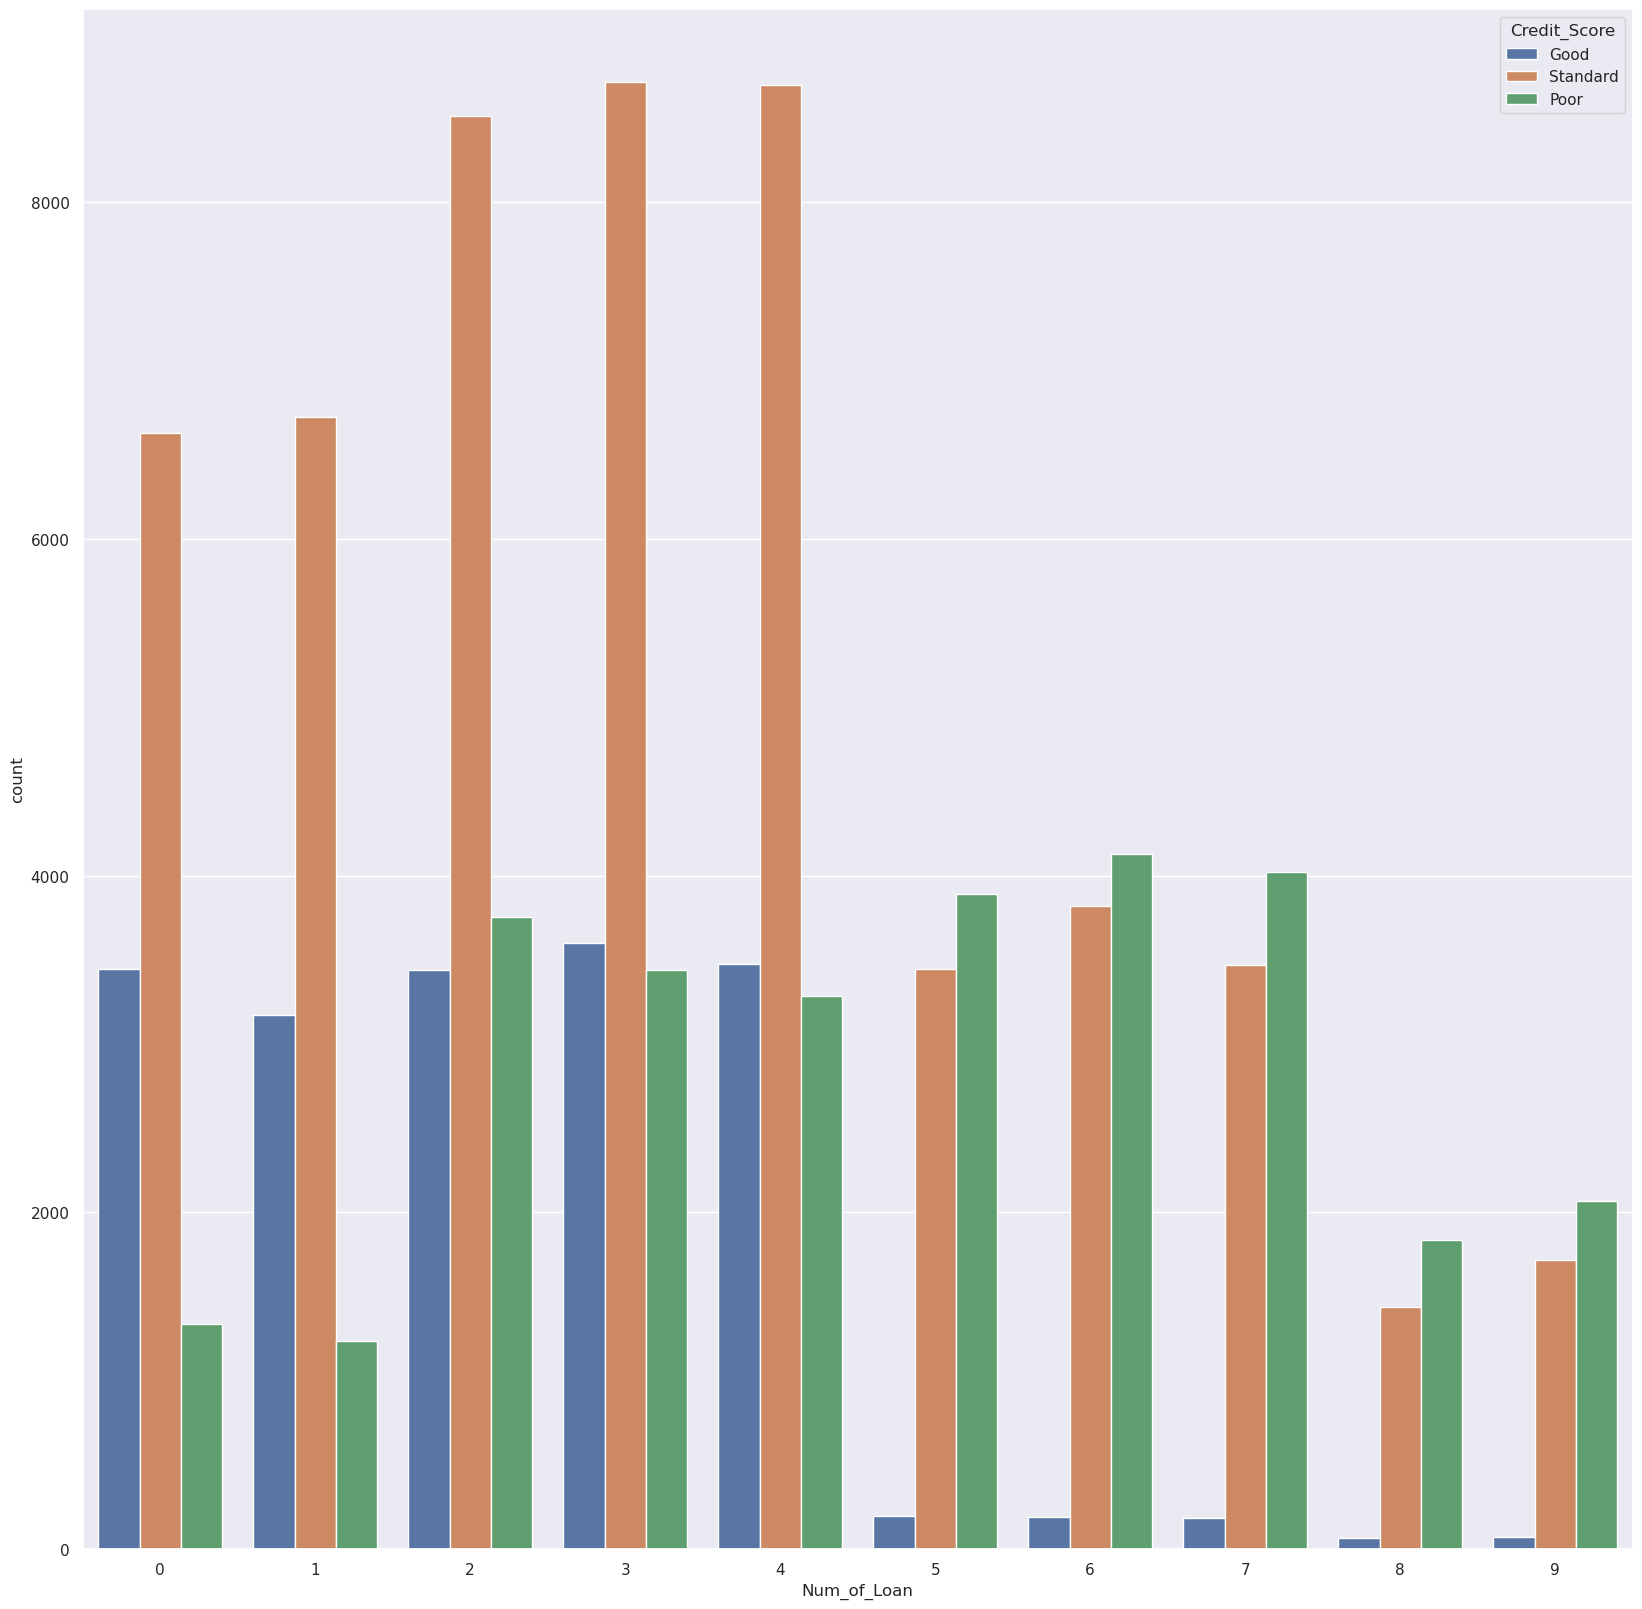

In [45]:
plt.figure(figsize = (20, 20))
sns.countplot(data = train_data, x = 'Num_of_Loan', hue = 'Credit_Score')

По числу заемов можно сказать, что клиенты с хорошим кредитным рейтингом берут небольшое количество заемов по сравнению с остальными клиентами.

Text(0.5, 1.0, 'Credit_History_Age distribution')

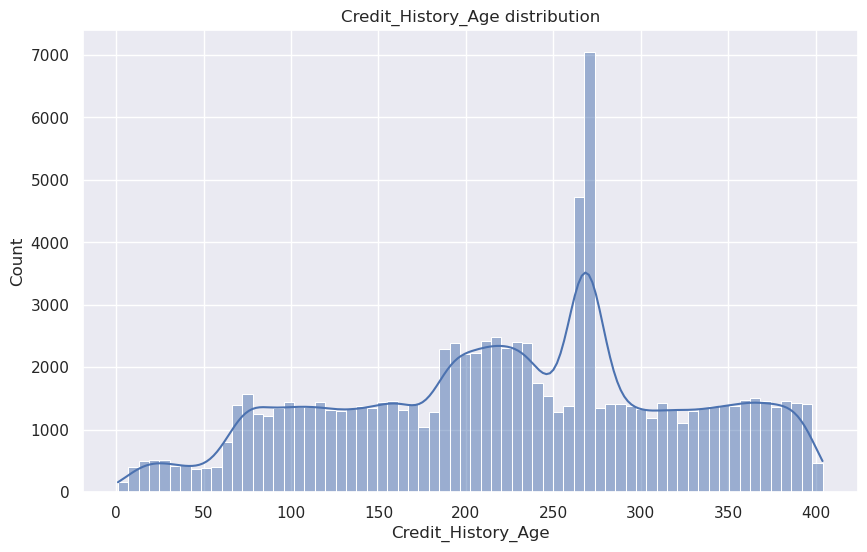

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(x=train_data['Credit_History_Age'], kde=True)
plt.title("Credit_History_Age distribution")

Опять же, распределение не является нормальным. Большой пик приходится на 260-270 количнство месяцев, это примерно 21-22 года.

Text(0.5, 1.0, 'Outstanding debit distribution')

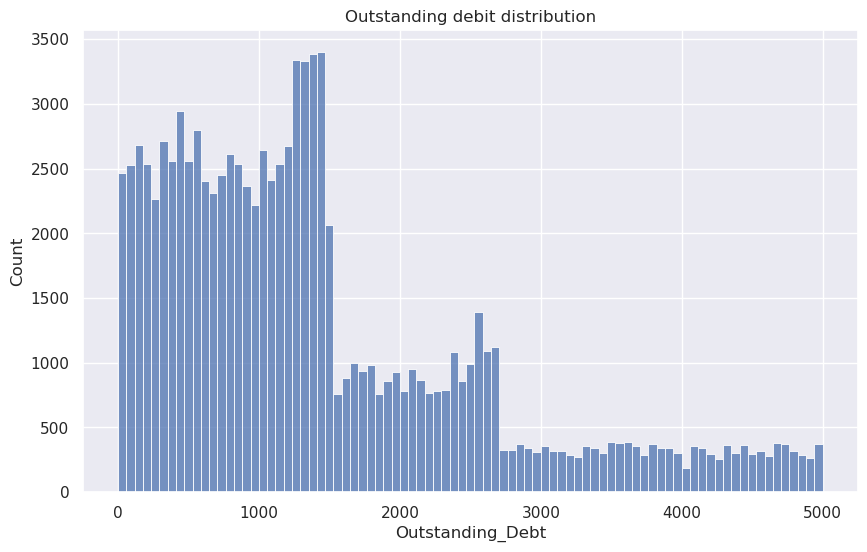

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(x=train_data['Outstanding_Debt'])
plt.title("Outstanding debit distribution")

Распределение не нормально, пик приходится на 1500, далее следует сильный спад.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

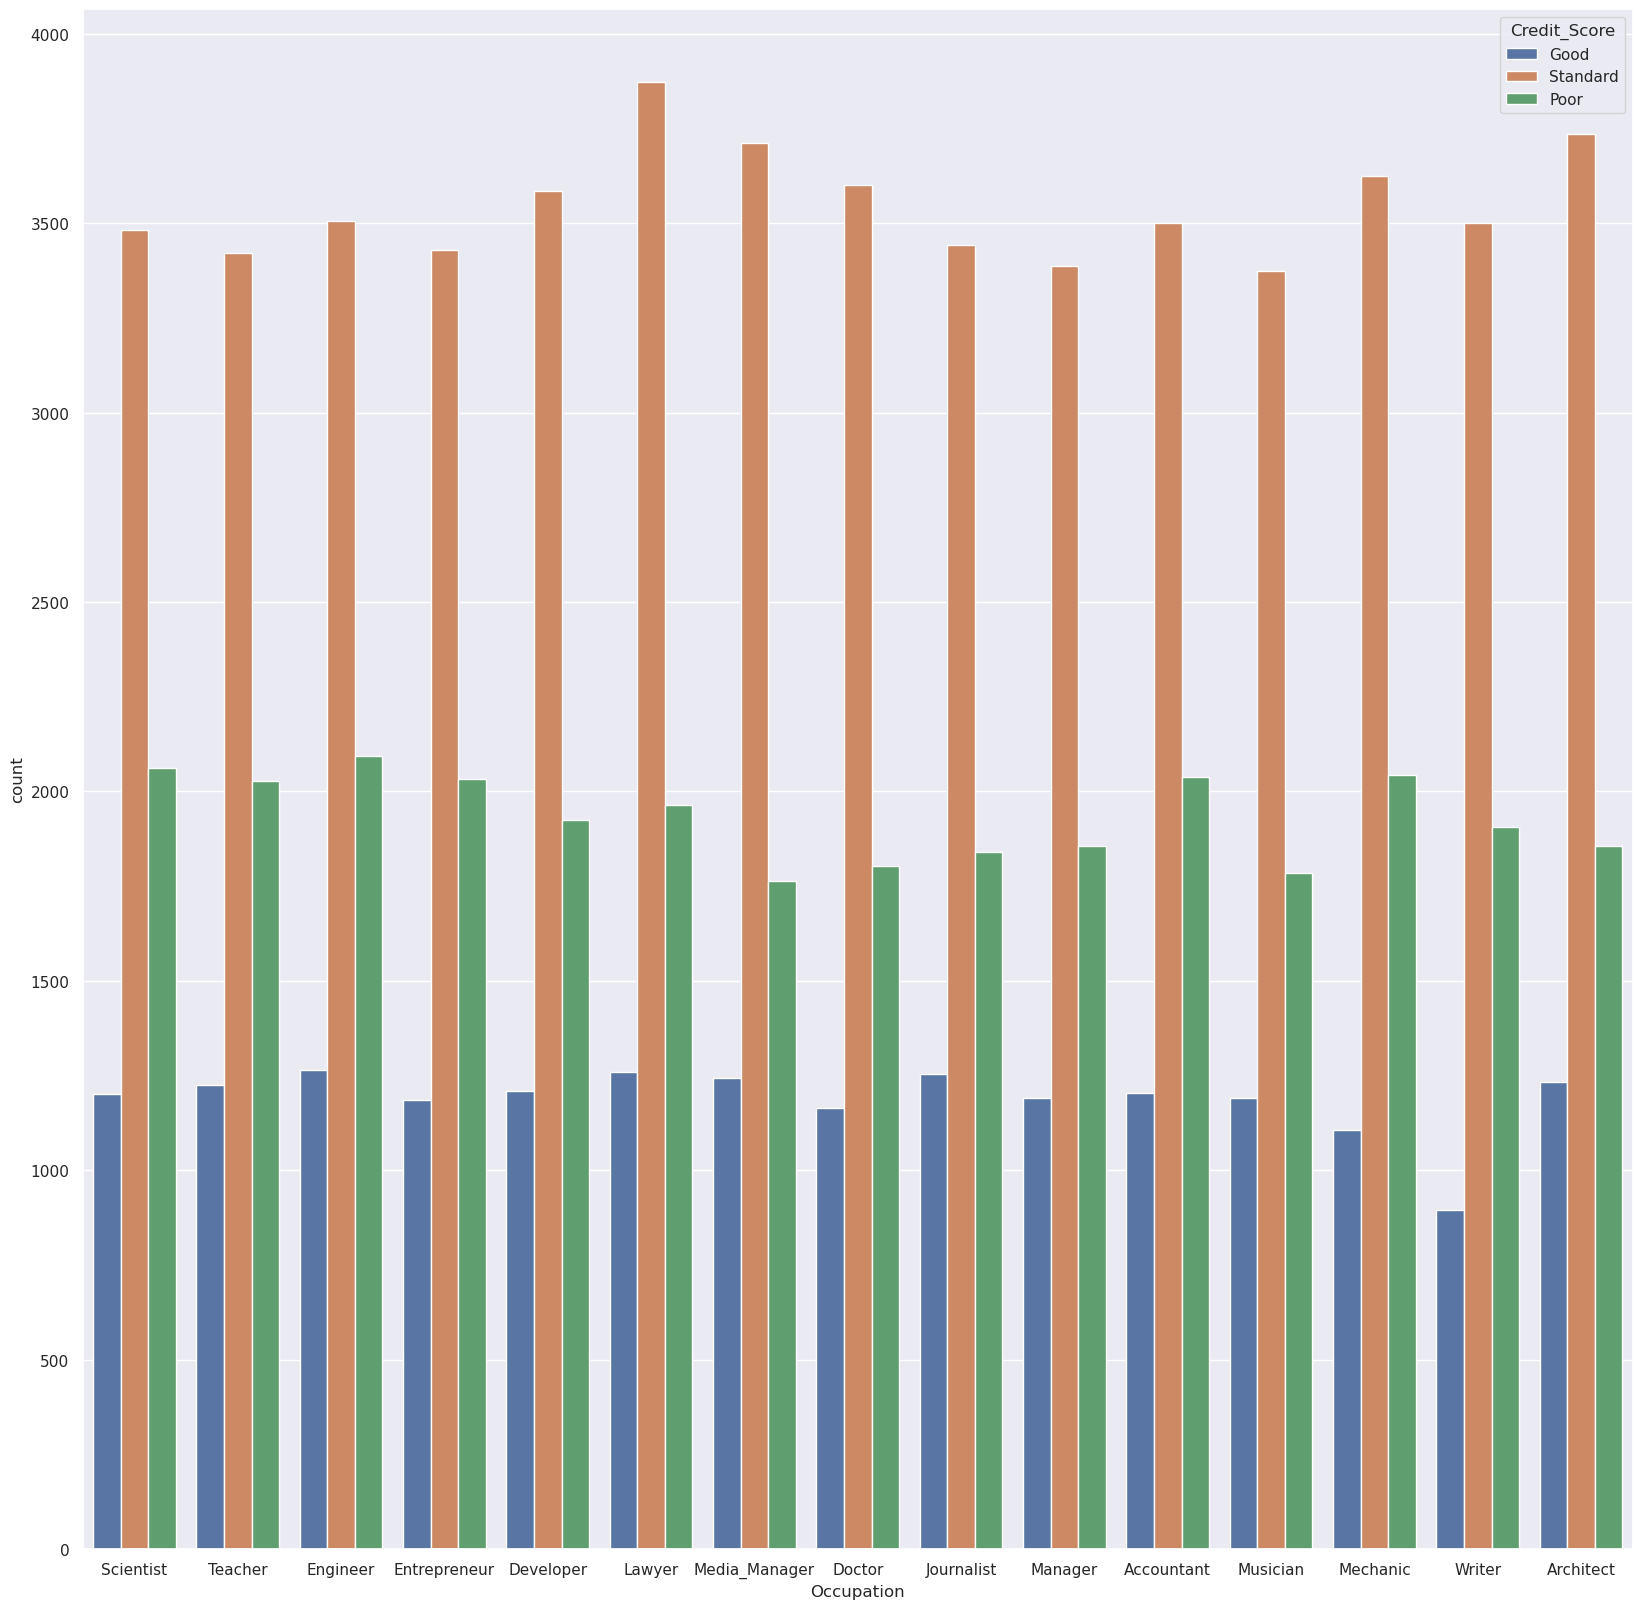

In [48]:
plt.figure(figsize = (20, 20))
sns.countplot(data = train_data, x = 'Occupation', hue = 'Credit_Score')

Опять же, по данному графику можно предположить, что род деятельности не сильно влияет на кредитный рейтинг.

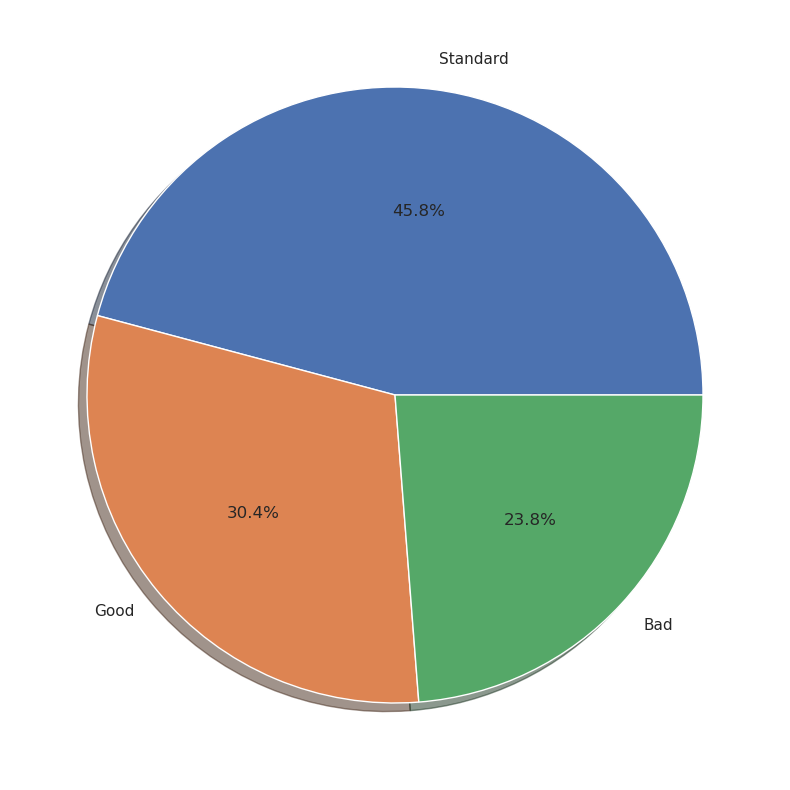

In [49]:
label = train_data.Credit_Mix.value_counts().index
label_count = train_data.Credit_Mix.value_counts().values
plt.pie(data=train_data, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()

По данной диаграмме видно, что большинство клиентов имеют стандартный кредитный портфель.

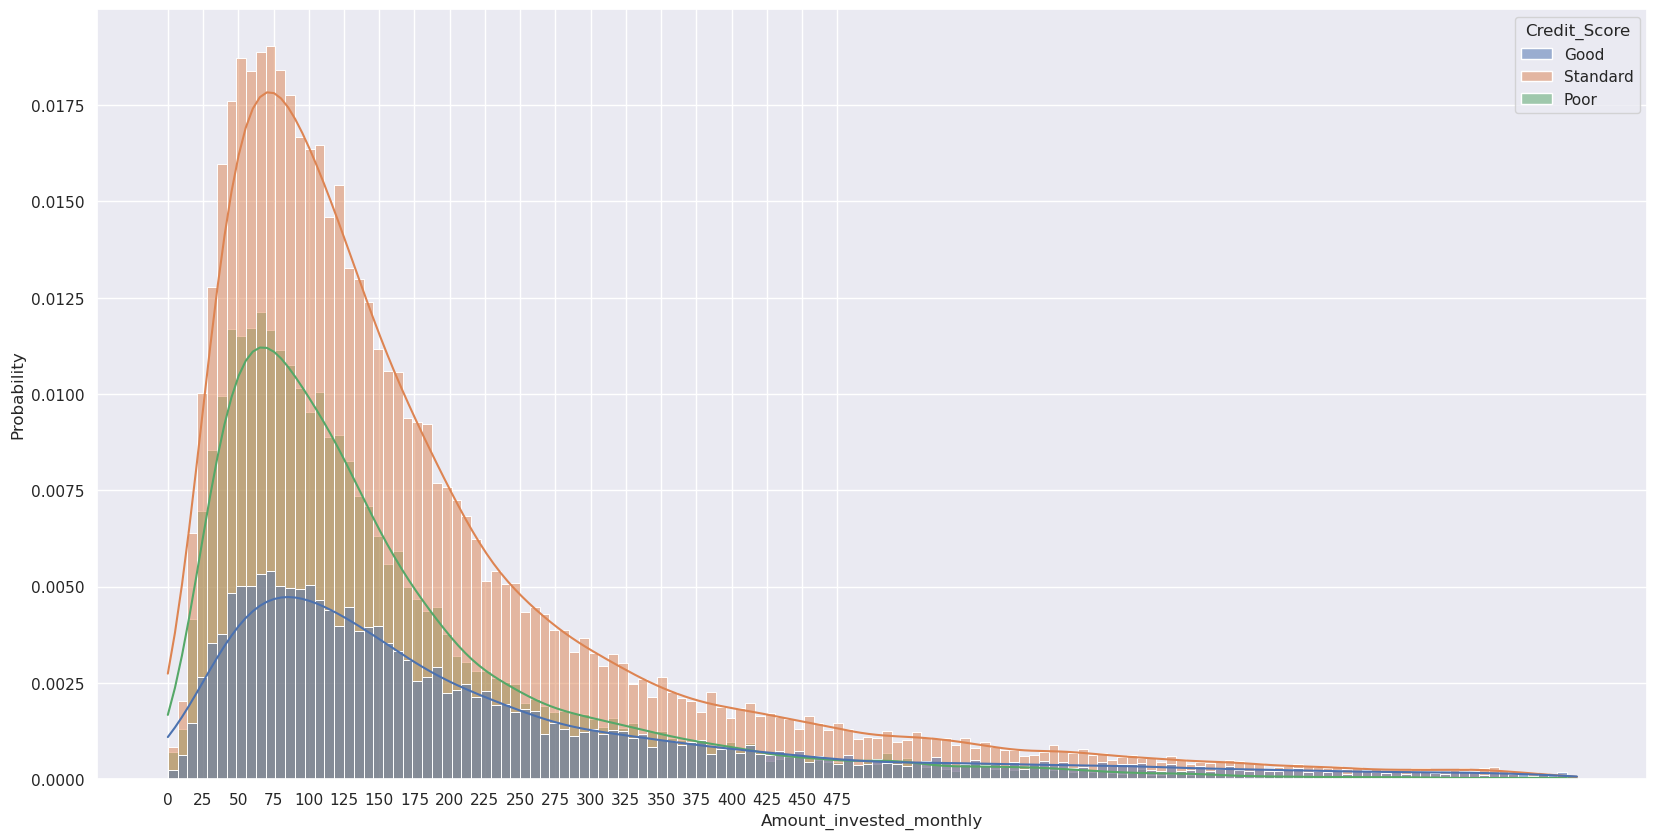

In [50]:
mask = train_data[train_data['Amount_invested_monthly'] < 1000]
plt.figure(figsize = (20,10))
sns.histplot(data = mask, x = 'Amount_invested_monthly', kde = True, hue = 'Credit_Score', stat = 'probability')
plt.xticks(np.arange(0, 500, 25))
plt.show()

Из приведенного выше графика ясно, что большинство клиентов, которые инвестируют, имеют стандартный кредитный рейтинг.

Text(0.5, 21.249999999999993, 'Num_of_Loan')

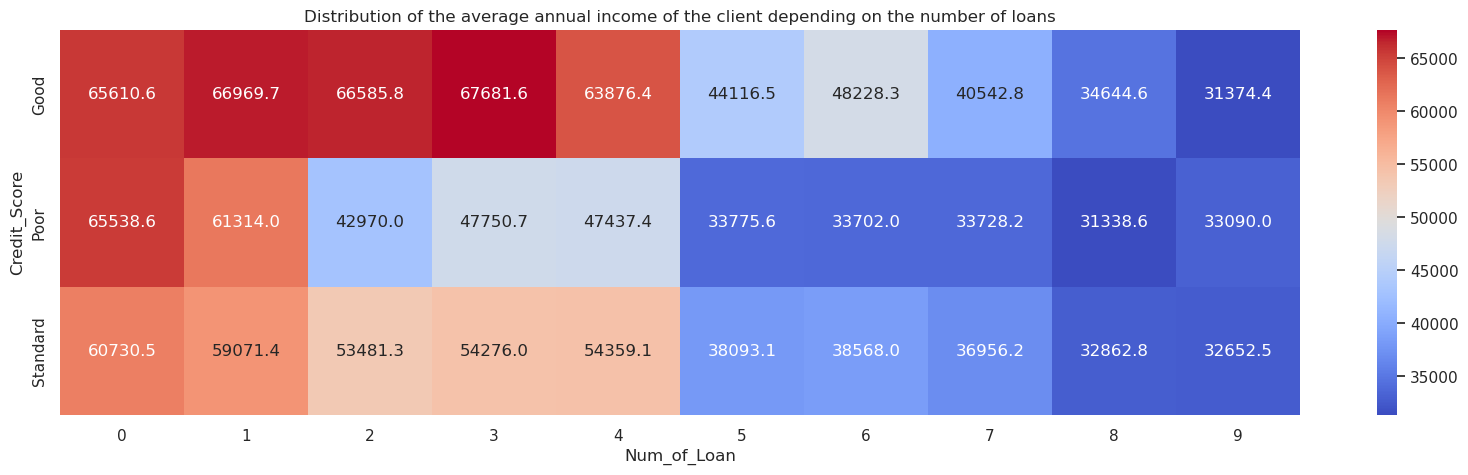

In [51]:
pivot_data = train_data.pivot_table(
    index='Credit_Score', 
    values='Annual_Income', 
    columns='Num_of_Loan', 
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data=pivot_data, annot=True, fmt=".1f", cmap='coolwarm',ax=ax)
ax.set_title('Distribution of the average annual income of the client depending on the number of loans')
ax.set_ylabel('Credit_Score') 
ax.set_xlabel('Num_of_Loan')

А вот по данной тепловой карте понятно, что клипенты с высоким годовым доходом предпочитают брать небольшое число заемов, что достаточно понятно.

Text(0.5, 1.0, 'Distribution of the average annual income of the client depending on the number of bank accounts')

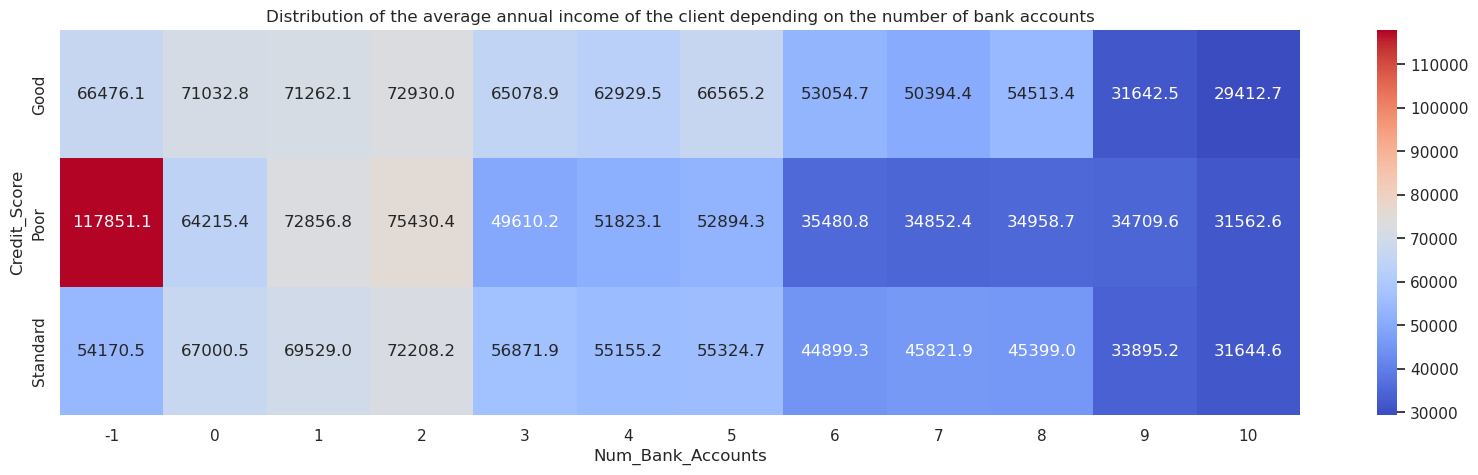

In [52]:
pivot_data_bank = train_data.pivot_table(
    index='Credit_Score', 
    values='Annual_Income', 
    columns='Num_Bank_Accounts', 
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data=pivot_data_bank, annot=True, fmt=".1f", cmap='coolwarm',ax=ax)
ax.set_title('Distribution of the average annual income of the client depending on the number of bank accounts')

По данной диаграмме также отмечу, что клиенты с низким годовым доходом имею много банковских аккаунтов.

Text(0.5, 1.0, 'Distribution of the average annual income of the client depending on the occupation')

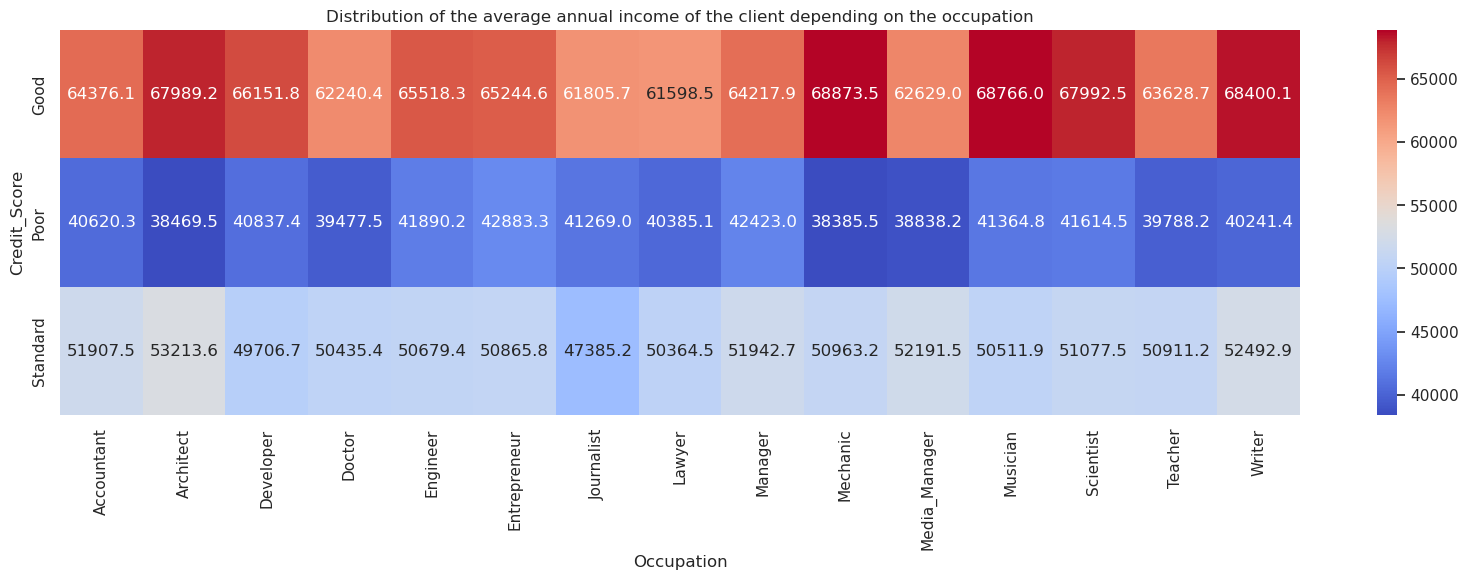

In [53]:
pivot_data_occupation = train_data.pivot_table(
    index='Credit_Score', 
    values='Annual_Income', 
    columns='Occupation', 
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data=pivot_data_occupation, annot=True, fmt=".1f", cmap='coolwarm',ax=ax)
ax.set_title('Distribution of the average annual income of the client depending on the occupation')

Очевидно, что люди любой профессии со средним годовым доходом более 60000 долларов имеют хороший кредитный рейтинг
Люди со средним годовым доходом 50000 имеют стандартный кредитный рейтинг
Люди со средним годовым доходом в 40000 долларов имеют плохой кредитный рейтинг

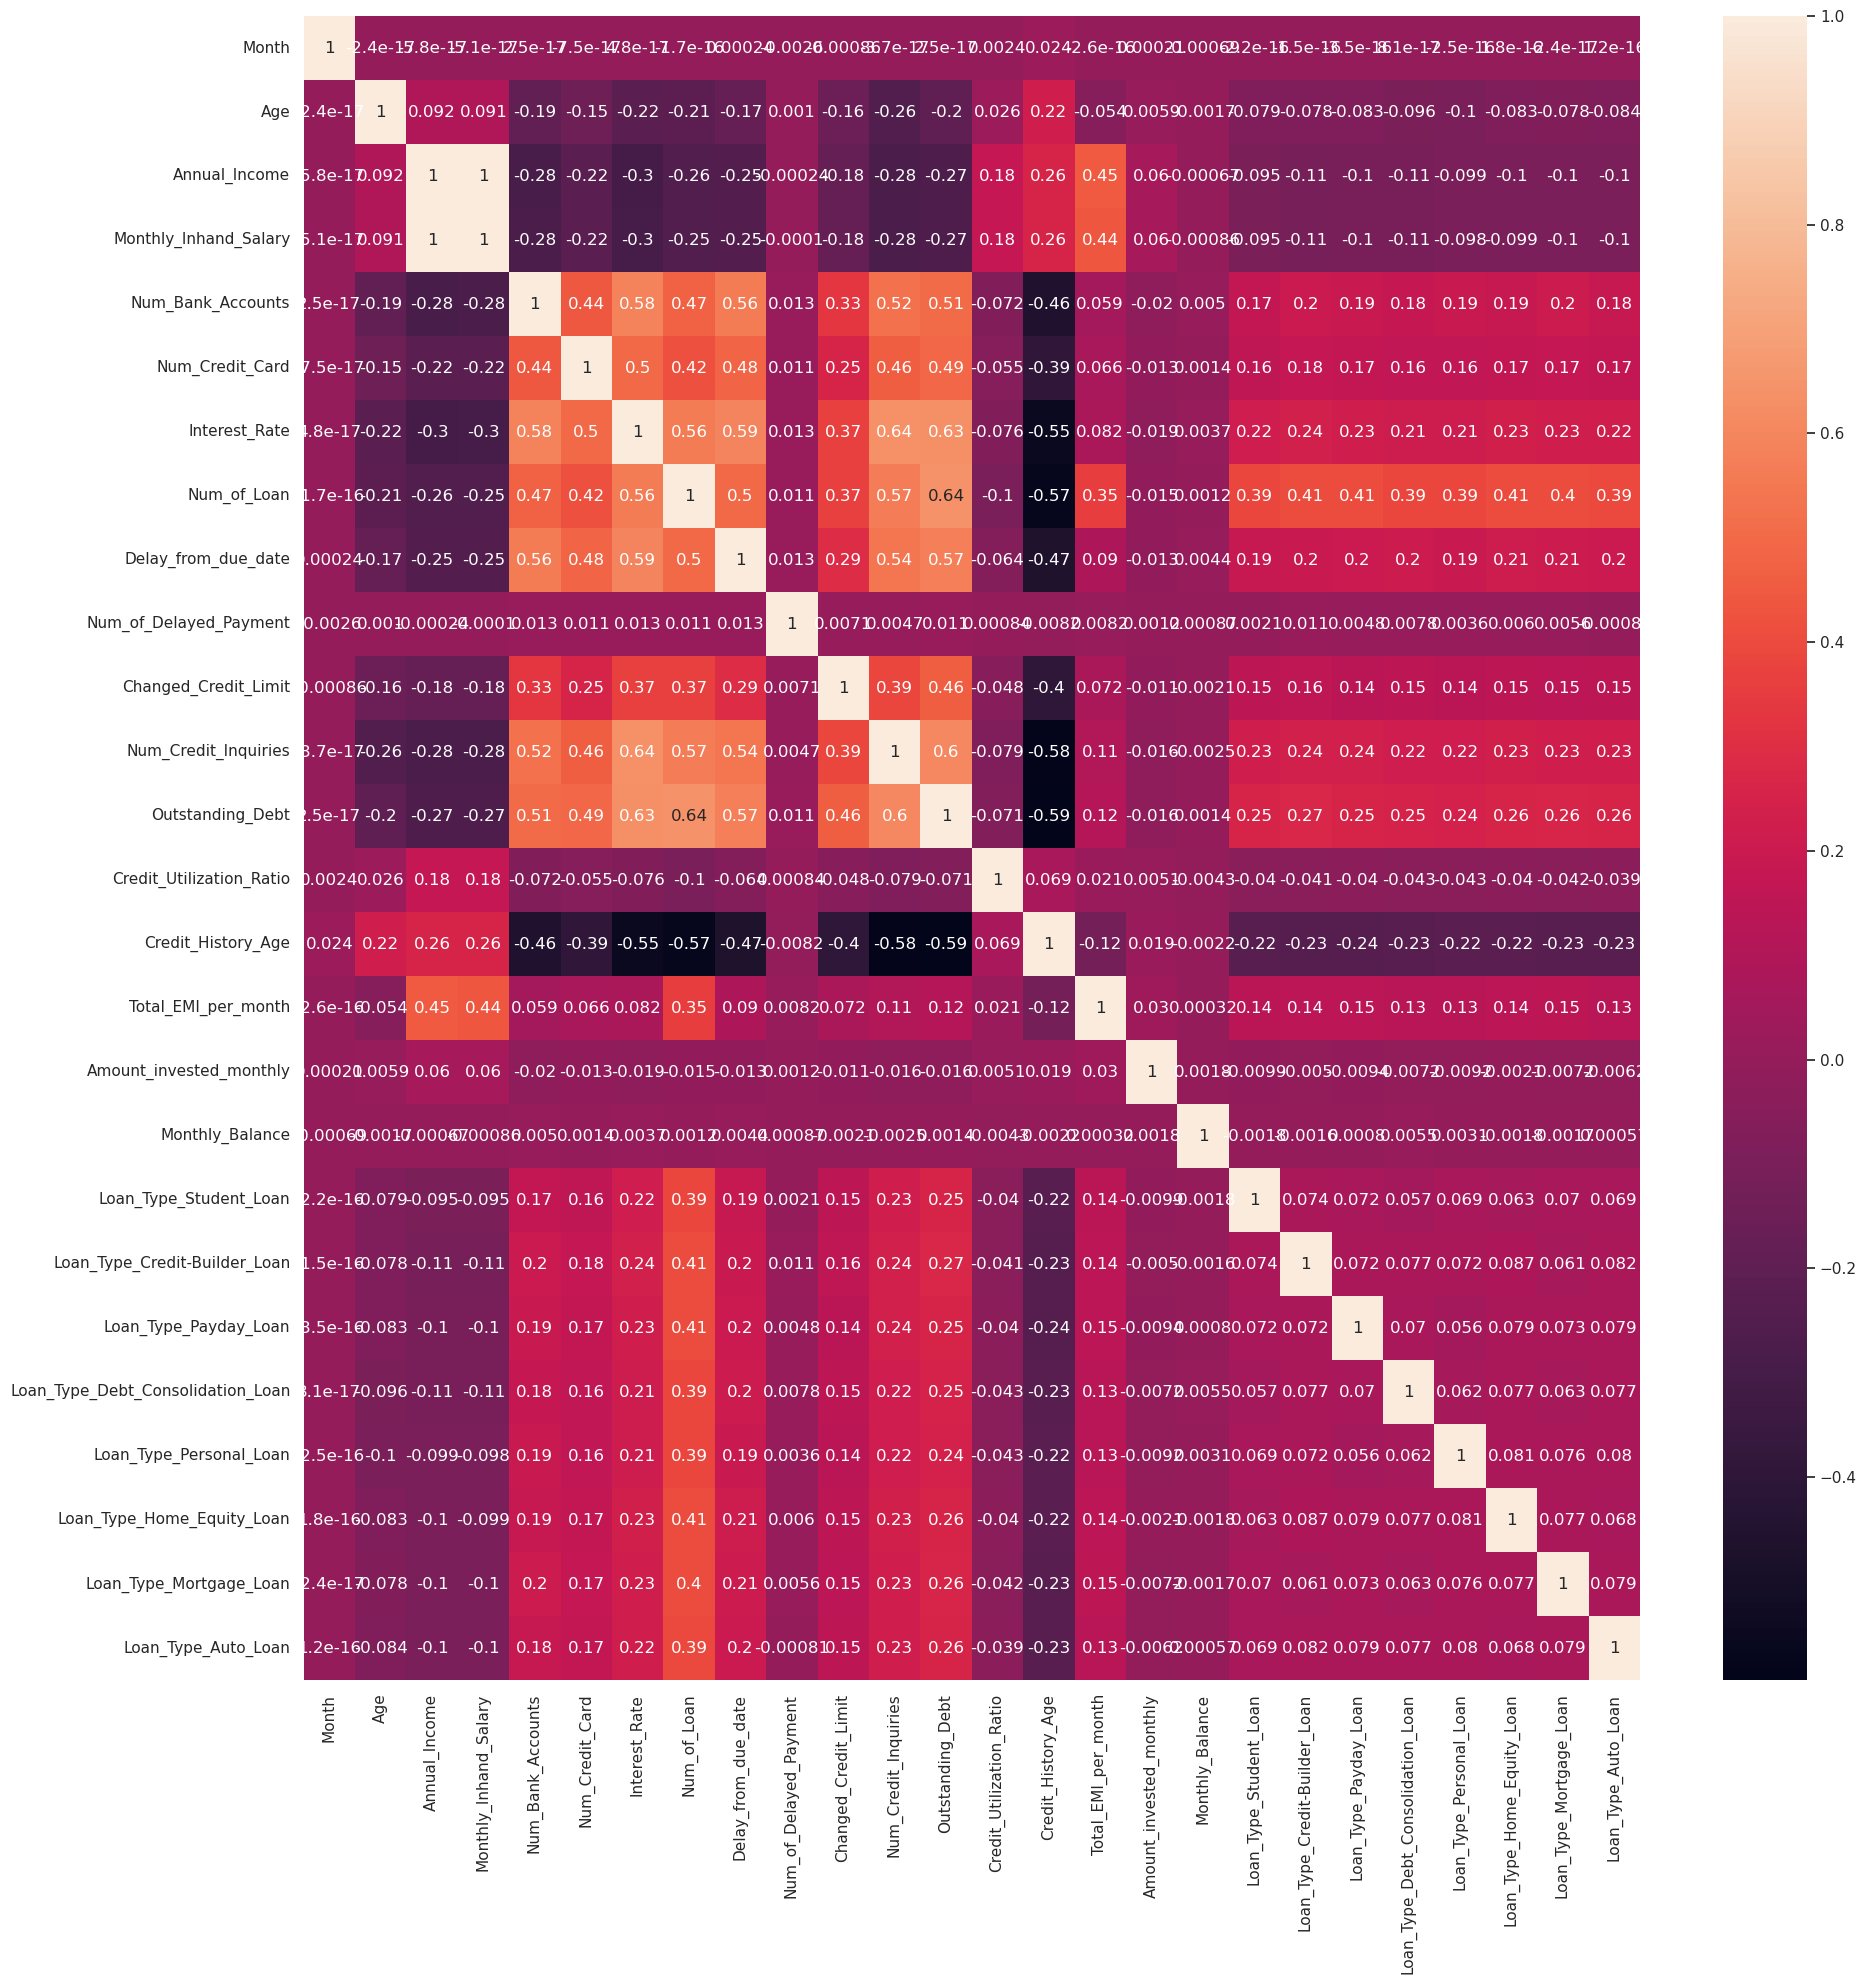

In [54]:
plt.figure(figsize = (20, 20))
sns.heatmap(train_data.corr(), annot = True)
plt.tight_layout()

По данной тепловой диаграмме видно, что признаки 'Annual_Income' и 'Monthly_Inhand_Salary' имеют коэффициент корреляции 1, этот факт может привести к утечке данных. Также важно отметить, что такие признаки как 'Occupation' и 'Month' не влияют на значение кредитного рейтинга клиента. Многие числовые данные не подчиняются нормальному распределению и имеют большой разброс значений, поэтому делаю вывод, что такие данные требуют обработки в следующем разделе.

# 4. Преобразование данных

In [55]:
# Сделаем копии датасетов, чтобы преоразовать их для передачи в модель
copy_train = train_data.copy()
copy_test = test_data.copy()

In [56]:
# удаляем месяц, так как он слабо влияет на кредитный рейтинг
del copy_train['Month']
del copy_test['Month']

In [57]:
# На мой взгляд, род деятельности не сильно коррелирует с остальными данными, этот признак можно удалить
del copy_train['Occupation']
del copy_test['Occupation']

In [58]:
# закодируем признаки 'Credit_Score' и 'Credit_Mix'
def cod_score(x):
    if x == "Good":
        return 1
    elif x == "Standard":
        return 0
    else:
        return -1

copy_train['Credit_Score'] = copy_train['Credit_Score'].apply(cod_score)
copy_train['Credit_Mix'] = copy_train['Credit_Mix'].apply(cod_score)
copy_test['Credit_Mix'] = copy_test['Credit_Mix'].apply(cod_score)

In [59]:
# также закодируем следующие признаки однократным кодированием
cols_to_onehot = ['Payment_of_Min_Amount', 'Payment_Behaviour_Spent', 'Payment_Behaviour_Value']

for data in [copy_train, copy_test]:
    for col in cols_to_onehot:
        unique_values = data[col].unique()
        
        for uniq in unique_values:
            data[col + '_' + uniq] = data[col].apply(lambda x: 1.0 if x == uniq else 0.0)
            
copy_train = copy_train.drop(columns = cols_to_onehot)
copy_test  = copy_test.drop(columns = cols_to_onehot)

In [60]:
# удаляем 'Monthly_Inhand_Salary', чтобы избежать утечки данных
del copy_train['Monthly_Inhand_Salary']
del copy_test['Monthly_Inhand_Salary']

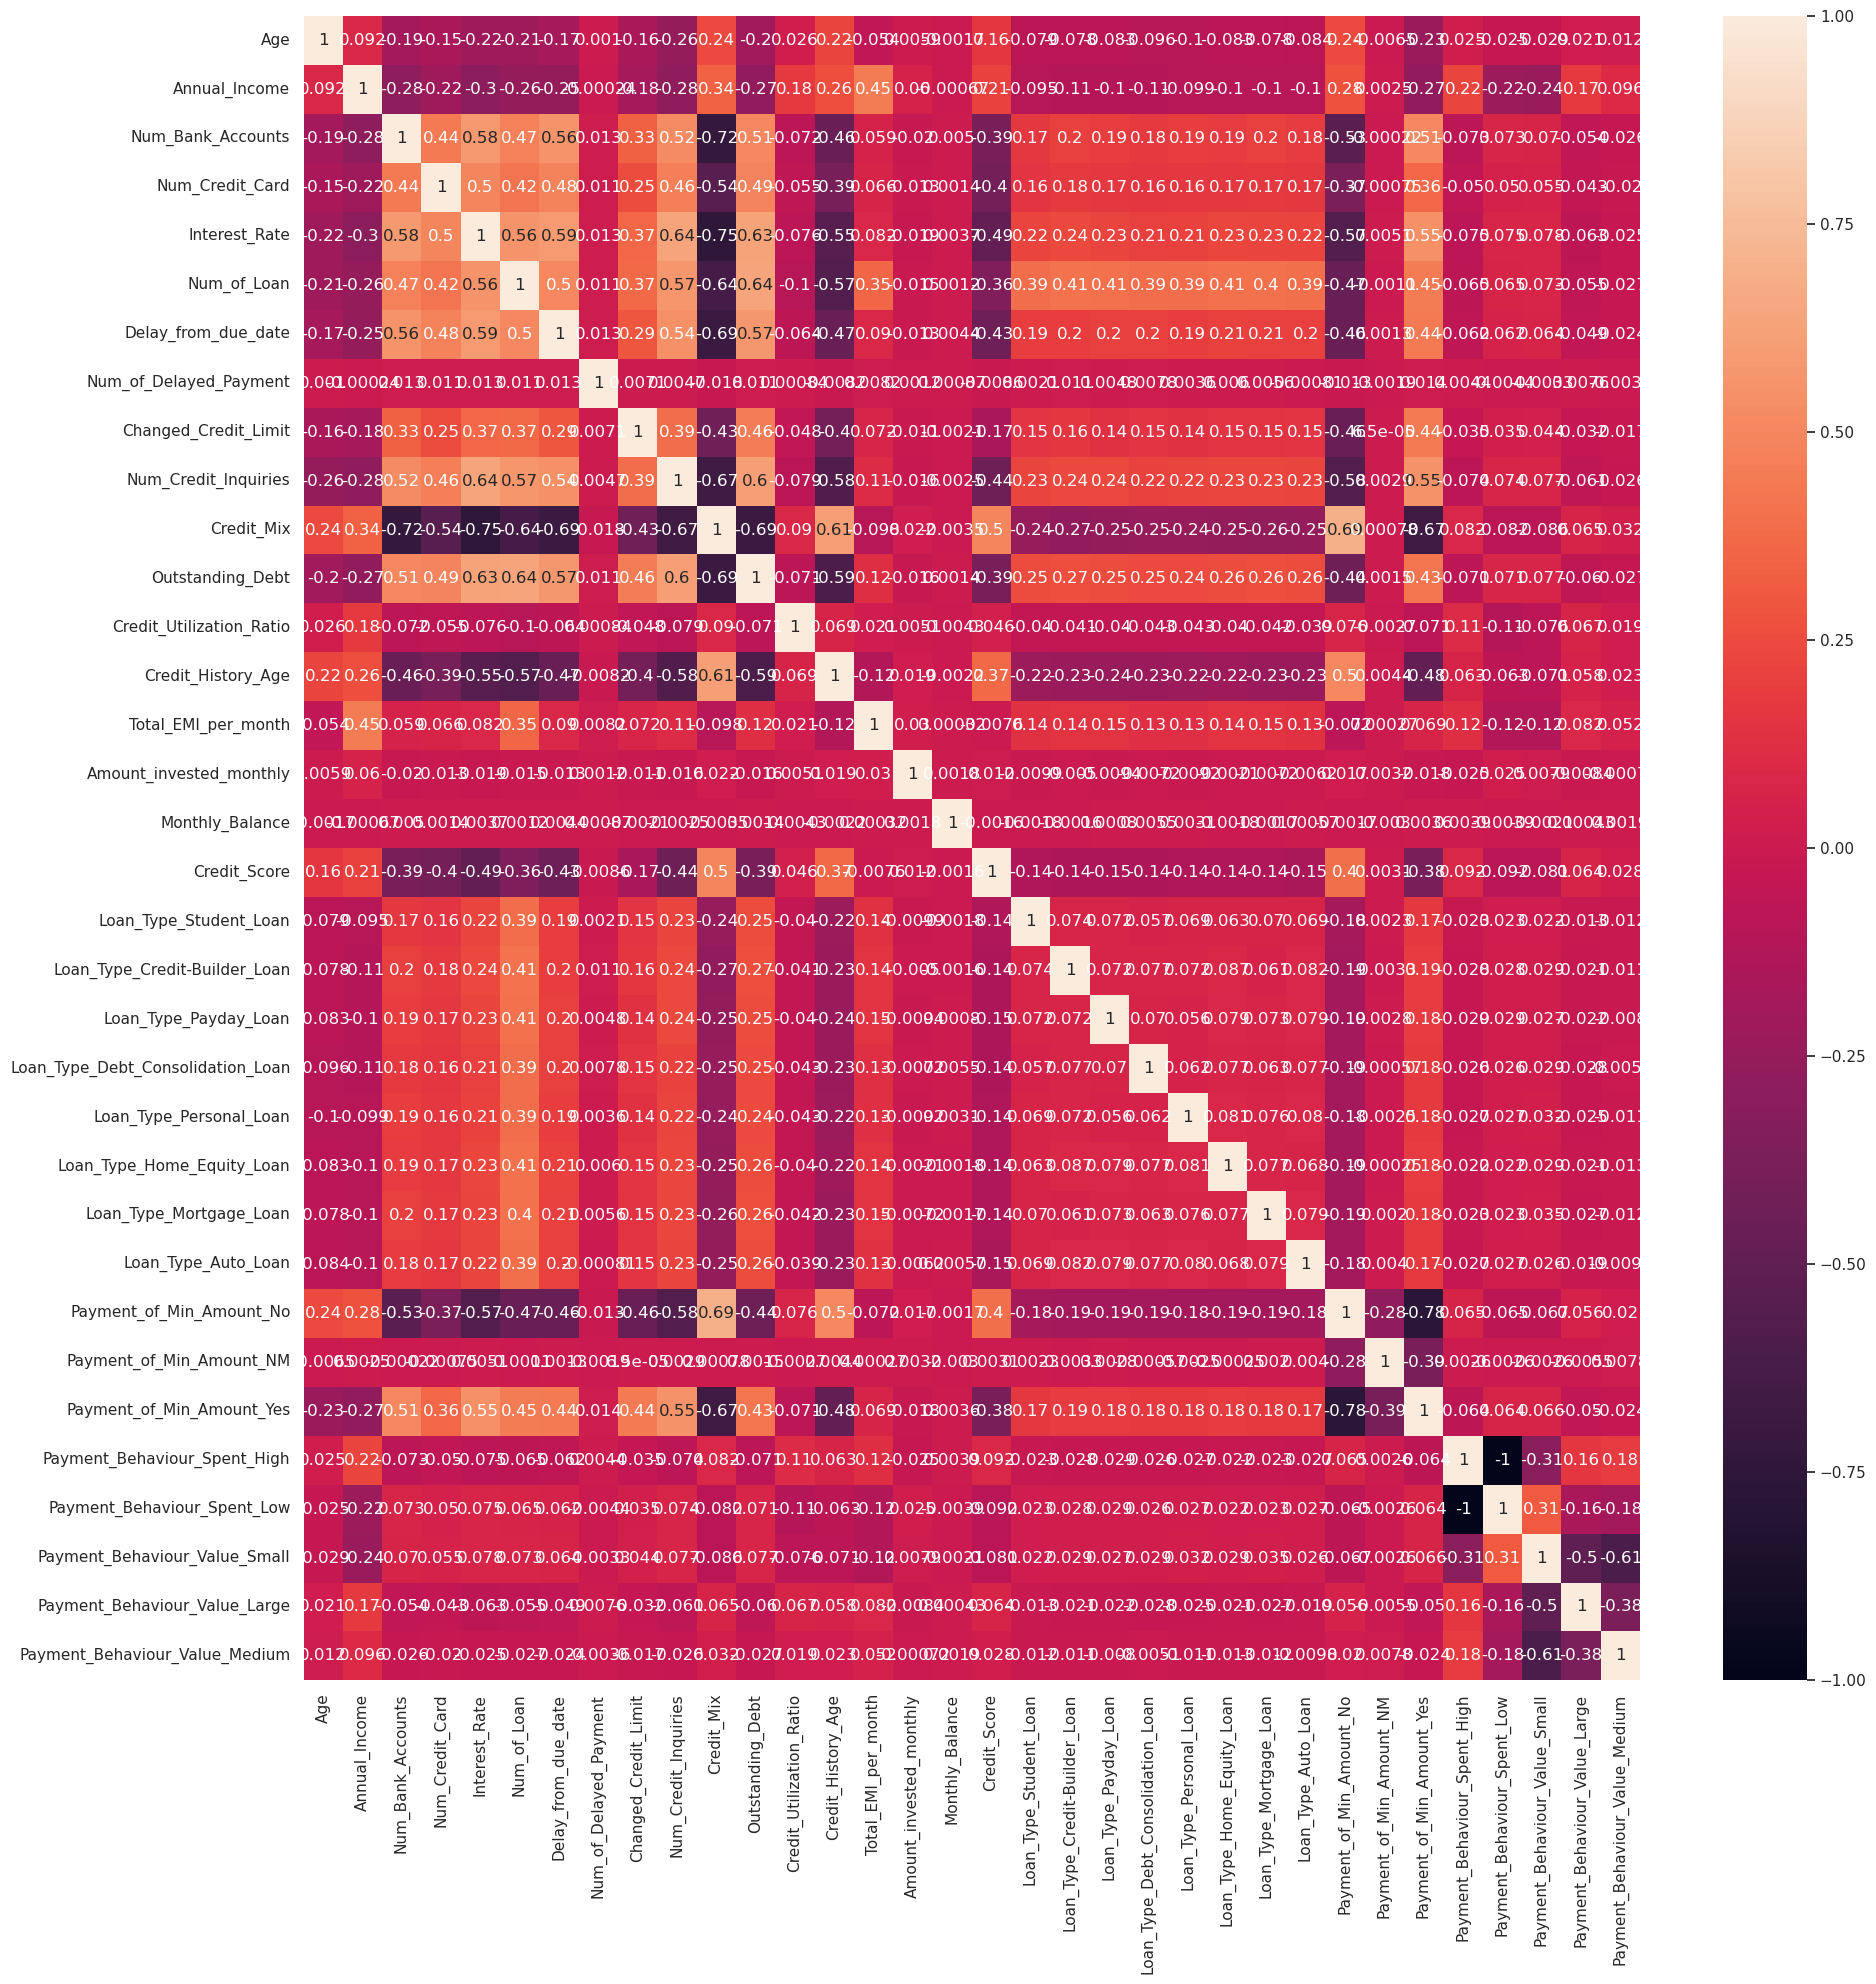

In [61]:
# проверяем тепловую диаграмму
plt.figure(figsize = (20, 20))
sns.heatmap(copy_train.corr(), annot = True)
plt.tight_layout()

In [62]:
# используем логарифмическое преобразование для следующих признаков, чтобы их распределение приблизилось к нормальному
cols_to_log = ['Annual_Income', 'Total_EMI_per_month', 'Amount_invested_monthly']

train_mean = {}
train_std  = {}

for col in cols_to_log:
    train_mean[col] = data[col].mean()
    train_std [col] = data[col].std()

for data in [copy_train, copy_test]:
    for col in cols_to_log:
        data[col] = data[col].apply(lambda x: np.log(x + 1.0))
        data[col] = data[col].apply(lambda x: (x - train_mean[col]) / train_std[col])

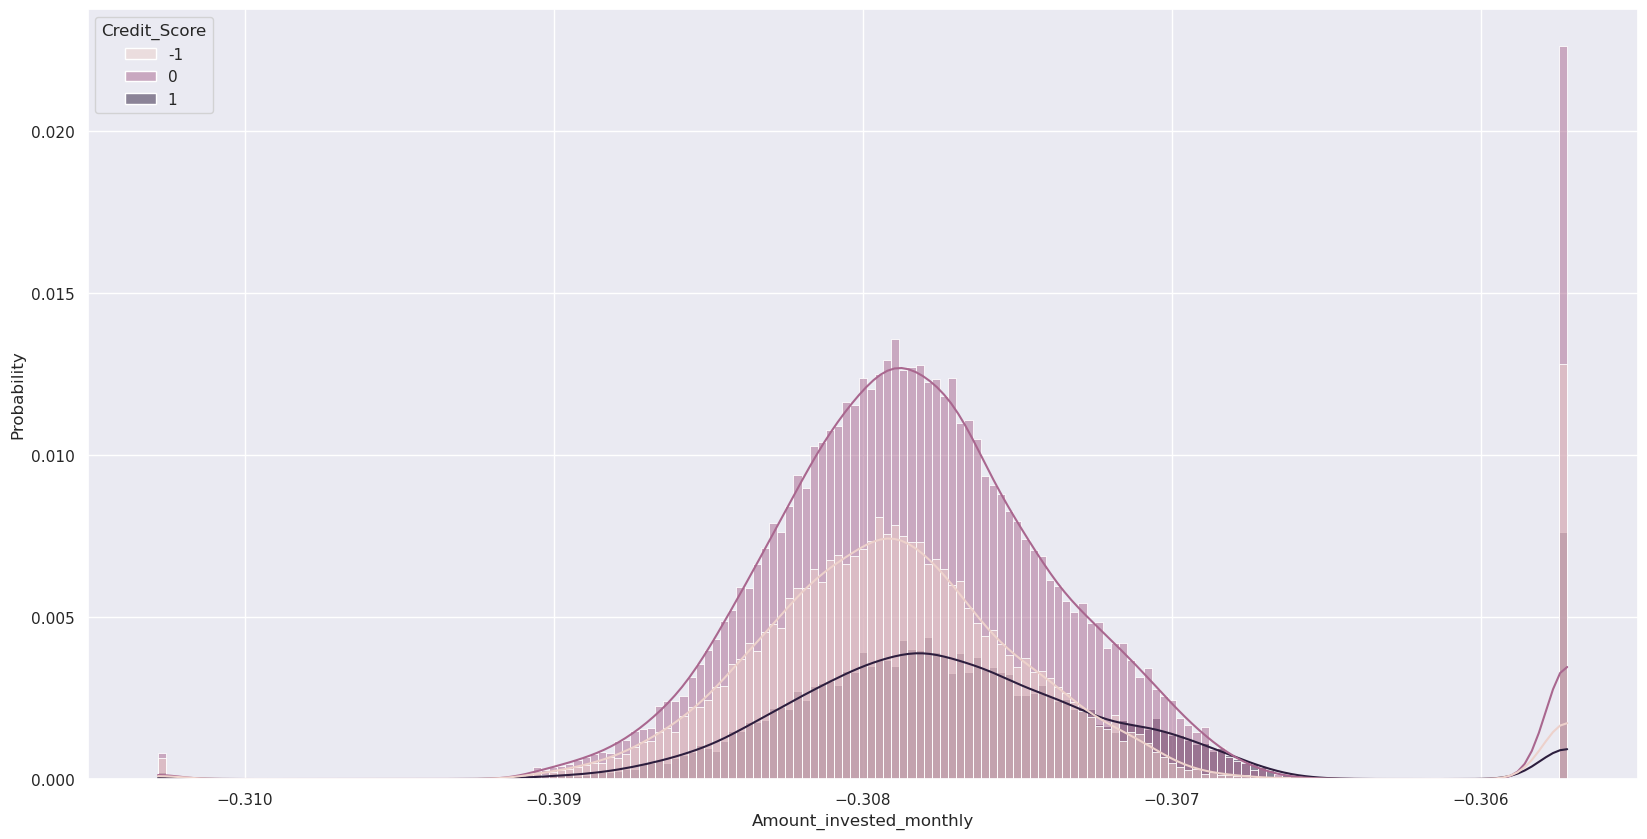

In [63]:
plt.figure(figsize = (20,10))
sns.histplot(data = copy_train, x = 'Amount_invested_monthly', kde = True, hue = 'Credit_Score', stat = 'probability')
plt.show()

Действительно, распределение признака больше напоминает нормальное.

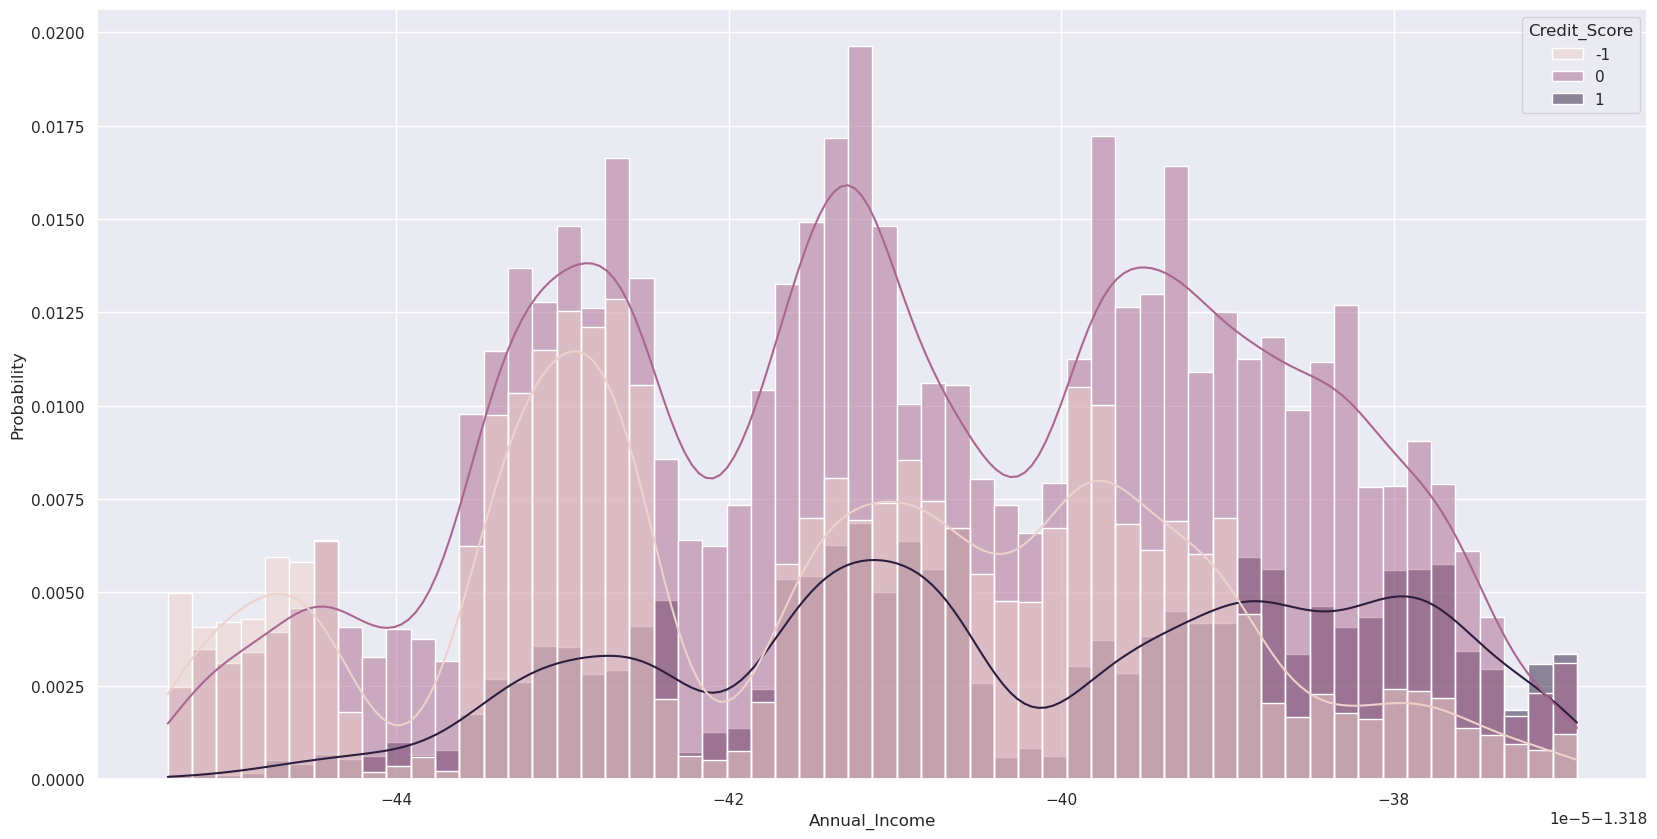

In [64]:
plt.figure(figsize = (20,10))
sns.histplot(data = copy_train, x = 'Annual_Income', kde = True, hue = 'Credit_Score', stat = 'probability')
plt.show()

Годовой доход сохранил три пика даже после логарифмического преобразования.

In [65]:
# Нормализуем остальные признаки
names_to_norm = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 
                 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 
                 'Num_of_Delayed_Payment','Changed_Credit_Limit', 'Num_Credit_Inquiries', 
                 'Outstanding_Debt', 'Credit_History_Age', 'Monthly_Balance']

train_mean = {}
train_std  = {}

for col in names_to_norm:
    train_mean[col] = data[col].mean()
    train_std [col] = data[col].std()

for data in [copy_train, copy_test]:
    for col in names_to_norm:
        data[col] = data[col].apply(lambda x: (x - train_mean[col]) / train_std[col])

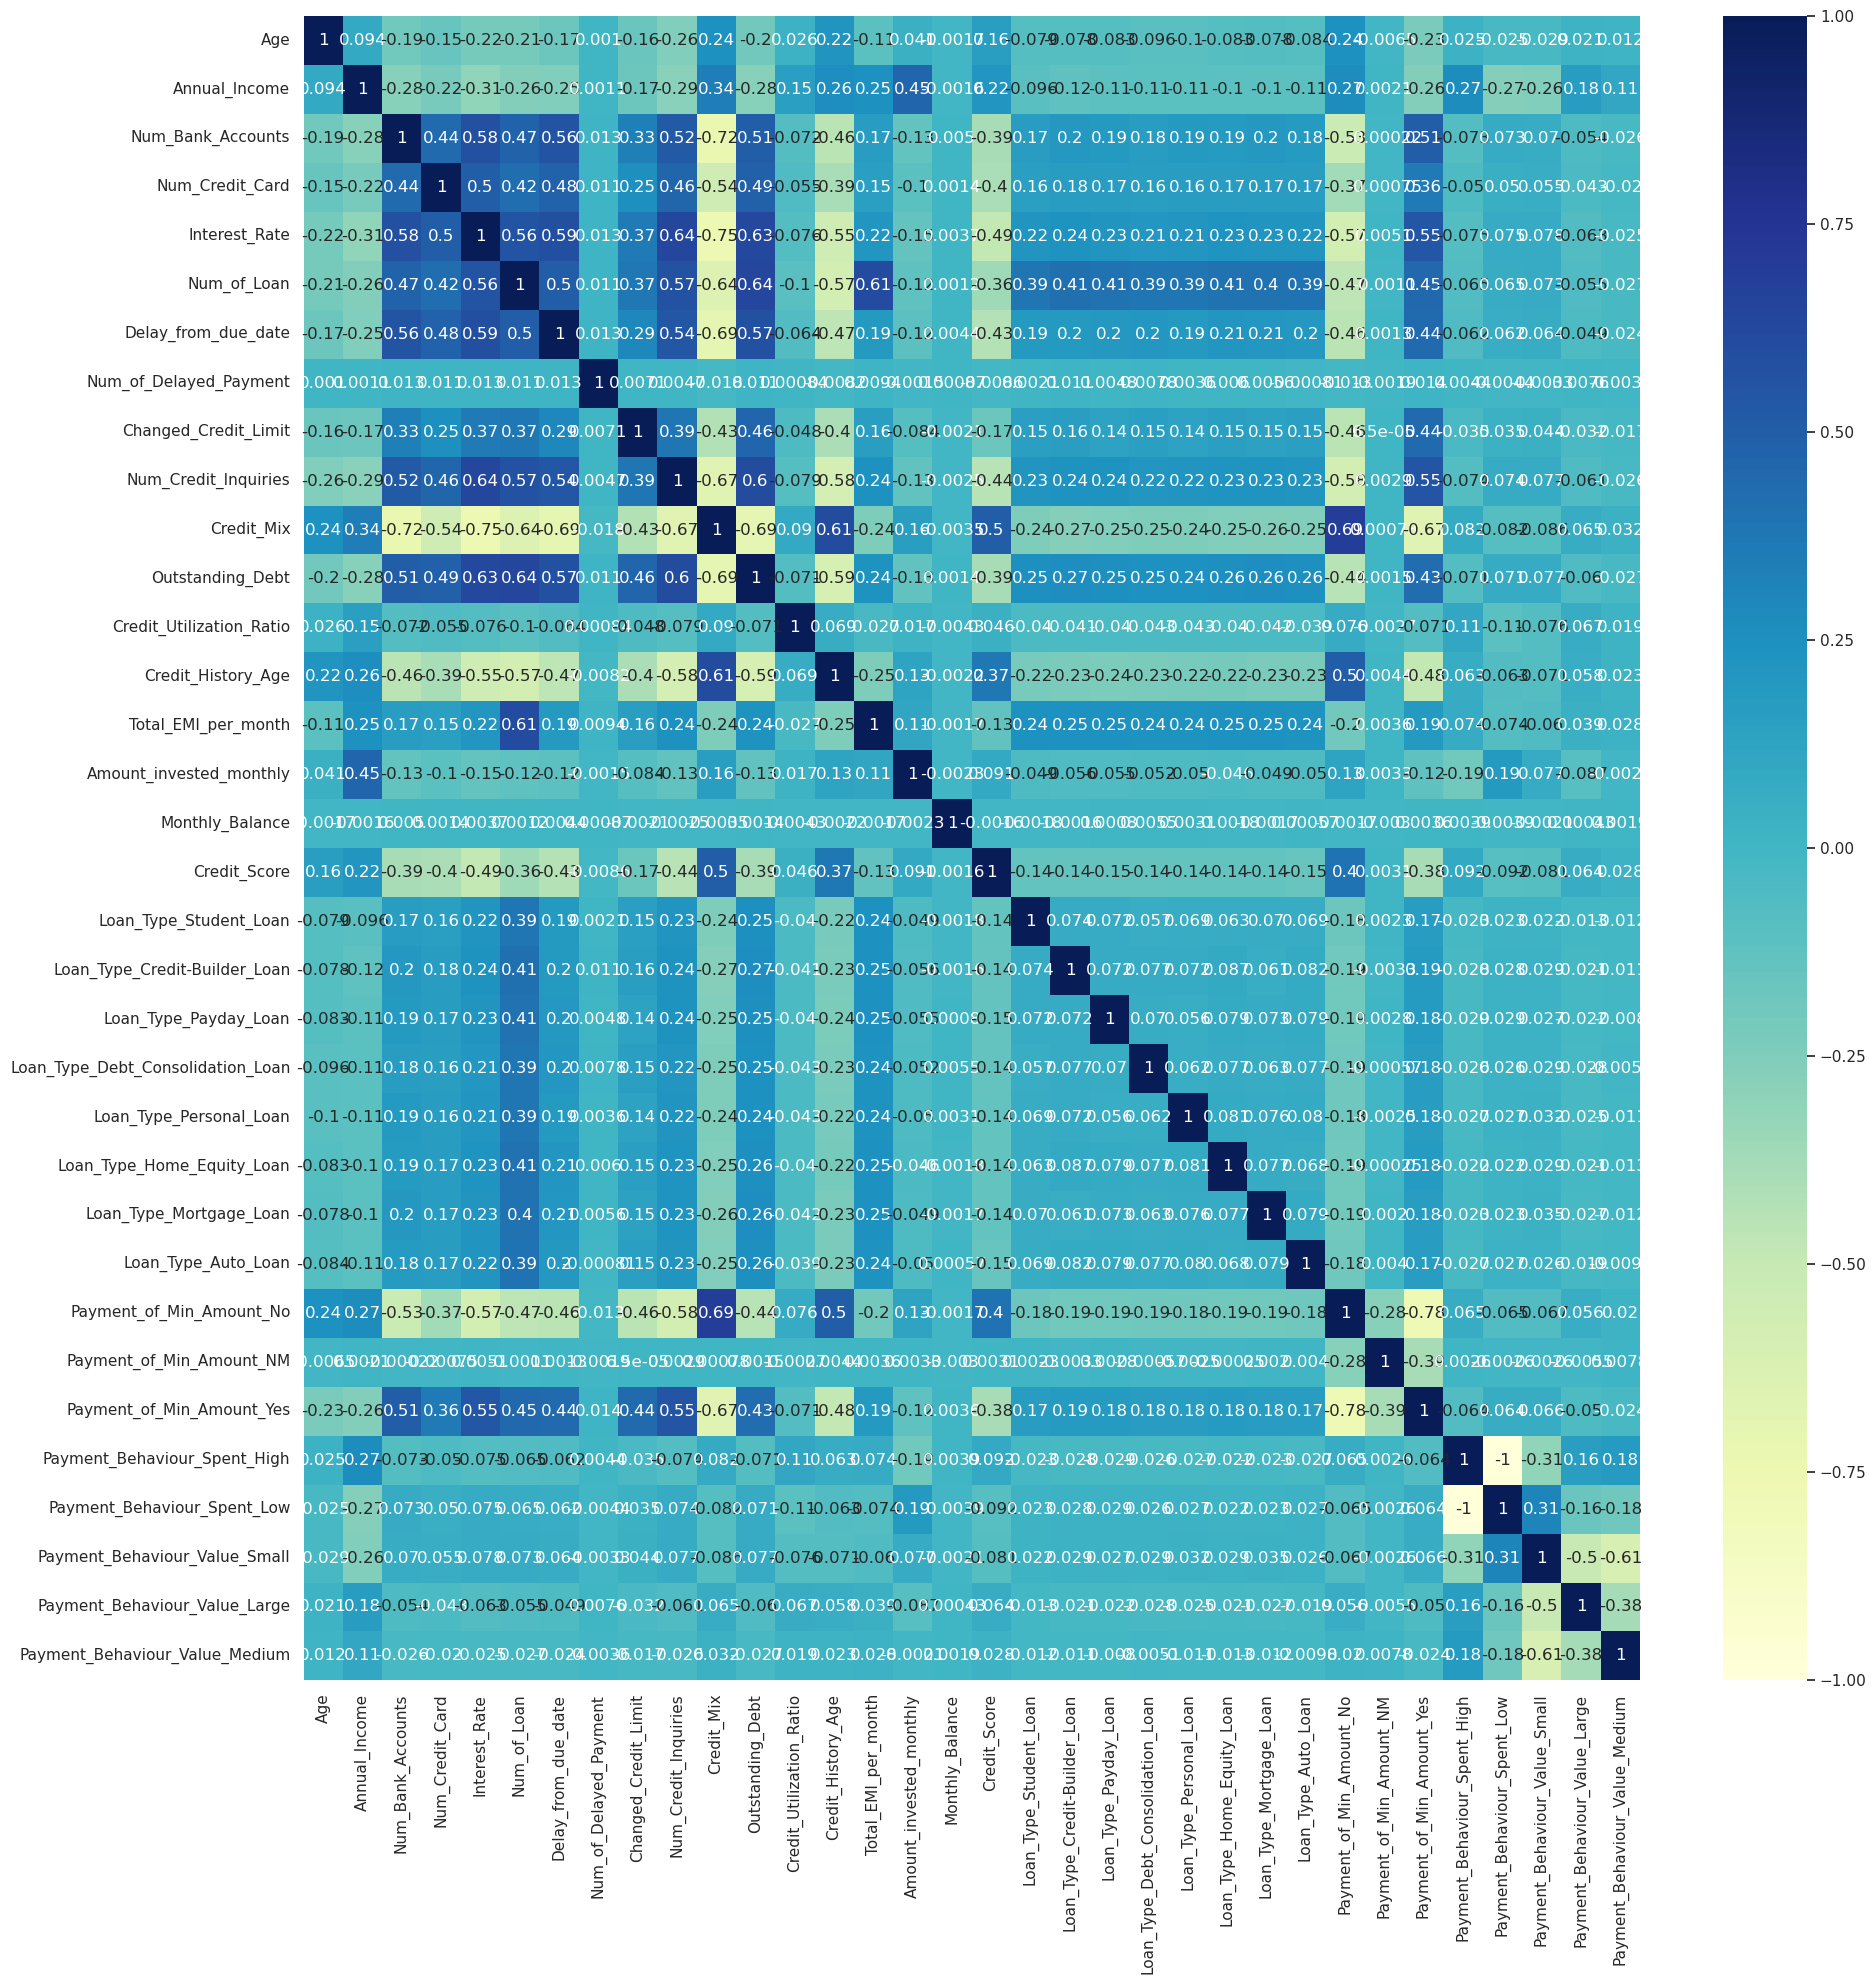

In [66]:
# проверяем тепловую диаграмму
plt.figure(figsize = (20, 20))
sns.heatmap(copy_train.corr(), annot = True, cmap="YlGnBu")
plt.tight_layout()

После нормализации и логарифмирования данных можно отметить, что распределение числовых признаков стало больше напоминать нормальное, нечисловые признаки были закодированы для передачи в модель.

# 5. Обучение модели

Определяем целевой признак, т.е. "Credit_Score". Разделяем тренинговый датасет: 75% на обучение, 25% на валидацию

In [67]:
y = copy_train["Credit_Score"]
X = copy_train
del copy_train["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

## 5.1. Логистическая регрессия

Для начала я применяю самую простую модель со стандартными параметрами.

In [68]:
log_reg = LogisticRegression(random_state=42)
log_reg = log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.67      0.52      0.59      7313
           0       0.68      0.74      0.71     13265
           1       0.56      0.62      0.59      4422

    accuracy                           0.66     25000
   macro avg       0.64      0.63      0.63     25000
weighted avg       0.66      0.66      0.65     25000



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Резултьтат слабый, логистическая регрессия слабо предсказывает "Credit_Score".

## 5.2. Ближайшие соседи

In [69]:
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.65      0.64      0.64      7313
           0       0.70      0.75      0.72     13265
           1       0.56      0.45      0.50      4422

    accuracy                           0.66     25000
   macro avg       0.64      0.61      0.62     25000
weighted avg       0.66      0.66      0.66     25000



Результат также слабый, использовала стандартные параметры.

## 5.3. Деревья решений

In [70]:
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.71      0.70      0.70      7313
           0       0.74      0.75      0.74     13265
           1       0.65      0.66      0.65      4422

    accuracy                           0.72     25000
   macro avg       0.70      0.70      0.70     25000
weighted avg       0.72      0.72      0.72     25000



Уже несколько лучший результат, использовала стандартные параметры.

## 5.4. Леса рандомизированных деревьев (Рандомный лес)

In [71]:
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.79      0.82      0.81      7313
           0       0.82      0.81      0.81     13265
           1       0.76      0.74      0.75      4422

    accuracy                           0.80     25000
   macro avg       0.79      0.79      0.79     25000
weighted avg       0.80      0.80      0.80     25000



In [72]:
# вывводим самые важные признаки для модели
fi = pd.DataFrame(rfc.feature_importances_,
                  index=rfc.feature_names_in_,
                  columns=['importance']).sort_values(['importance'], ascending=False)
fi

importance
Outstanding_Debt                     0.109453
Interest_Rate                        0.076540
Credit_History_Age                   0.071378
Credit_Mix                           0.070272
Delay_from_due_date                  0.062795
Changed_Credit_Limit                 0.060993
Amount_invested_monthly              0.055409
Credit_Utilization_Ratio             0.055322
Num_Credit_Inquiries                 0.045292
Annual_Income                        0.043886
Num_of_Delayed_Payment               0.043218
Total_EMI_per_month                  0.042293
Num_Credit_Card                      0.041880
Age                                  0.037892
Num_Bank_Accounts                    0.032673
Num_of_Loan                          0.026319
Payment_of_Min_Amount_No             0.016476
Payment_of_Min_Amount_Yes            0.014758
Payment_Behaviour_Value_Small        0.009116
Payment_Behaviour_Value_Medium       0.008870
Payment_Behaviour_Value_Large        0.007888
Payment_Behaviour_Spent_Low          0.007177
Payment_Behaviour_Spent_High         0.006915
Loan_Type_Payday_Loan                0.006379
Loan_Type_Auto_Loan                  0.006266
Loan_Type_Mortgage_Loan              0.006214
Loan_Type_Personal_Loan              0.006196
Loan_Type_Student_Loan               0.006085
Loan_Type_Home_Equity_Loan           0.005895
Loan_Type_Credit-Builder_Loan        0.005838
Loan_Type_Debt_Consolidation_Loan    0.005795
Payment_of_Min_Amount_NM             0.004488
Monthly_Balance                      0.000028

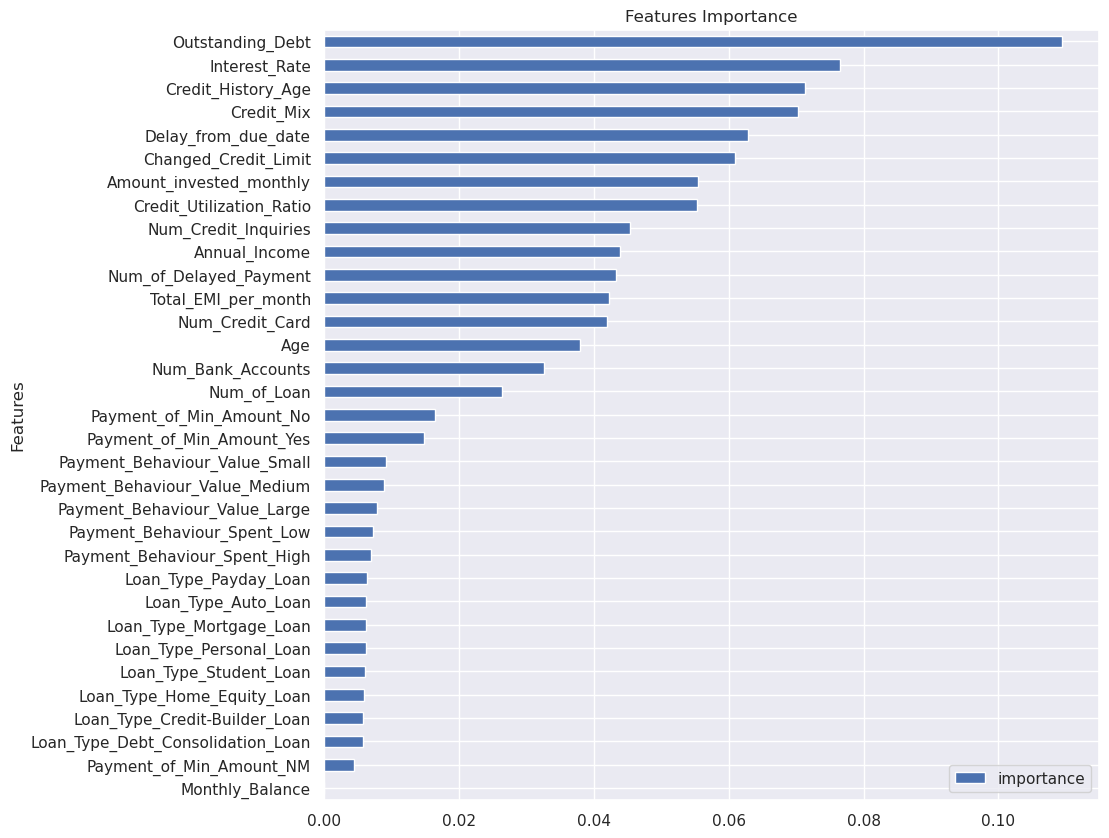

In [73]:
# также отражаем их на графике
ax = fi.sort_values('importance').plot(kind='barh', title='Features Importance', figsize=(10,10))
ax.set_ylabel('Features')
plt.show()

Получается, что самый важный признак - Outstanding_Deb, что достаточно логично. Важное значение также имеют: Interest_Rate, Gredit_Mix и Credit_History_Age.

## 5.5. Наивные методы Байеса

In [74]:
clf = GaussianNB()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.59      0.73      0.65      7313
           0       0.83      0.41      0.55     13265
           1       0.41      0.86      0.55      4422

    accuracy                           0.58     25000
   macro avg       0.61      0.67      0.59     25000
weighted avg       0.68      0.58      0.58     25000



Результат слабый. Дааная модель достаточно посредственно предсказывает результаты.

## 5.6. AdaBoost

In [75]:
clf = AdaBoostClassifier(n_estimators=120, random_state=42, learning_rate=0.5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.67      0.59      0.63      7313
           0       0.71      0.72      0.72     13265
           1       0.56      0.63      0.59      4422

    accuracy                           0.67     25000
   macro avg       0.65      0.65      0.65     25000
weighted avg       0.67      0.67      0.67     25000



Значение метрик не очень большое, тут я не стала оставлять стандартные параметры, так как они показывали плохой результат.

## 5.7. GridSearchCV

В данном разделе я использовала три модели с различными параметрами, чтобы найти наилучший результат.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

param_grid = {
    'max_depth': range(5, 15),
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500]
}

base_estimator = ensemble.RandomForestClassifier(random_state=42) 
model = model_selection.GridSearchCV(base_estimator, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
print(model.best_estimator_)

y_train_pred = model.predict(X_train)
print("Accuracy на тренировочной выборке: {:.3f}".format(metrics.accuracy_score(y_train, y_train_pred)))

y_test_pred = model.predict(X_test)
print("Accuracy на тестовой выборке: {:.3f}".format(metrics.accuracy_score(y_test, y_test_pred)))

RandomForestClassifier(max_depth=14, n_estimators=500, random_state=42)
Accuracy на тренировочной выборке: 0.823
Accuracy на тестовой выборке: 0.759


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

param_grid = {
    'max_depth': range(3, 15),
    'criterion': ['gini', 'entropy']
}
base_estimator = tree.DecisionTreeClassifier(random_state=42) 
model = model_selection.GridSearchCV(base_estimator, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
print(model.best_estimator_)

y_train_pred = model.predict(X_train)
print("Accuracy на тренировочной выборке: {:.3f}".format(metrics.accuracy_score(y_train, y_train_pred)))

y_test_pred = model.predict(X_test)
print("Accuracy на тестовой выборке: {:.3f}".format(metrics.accuracy_score(y_test, y_test_pred)))

DecisionTreeClassifier(max_depth=14, random_state=42)
Accuracy на тренировочной выборке: 0.801
Accuracy на тестовой выборке: 0.727


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

param_grid = {
    'n_neighbors': range(3, 15),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
base_estimator = neighbors.KNeighborsClassifier() 
model = model_selection.GridSearchCV(base_estimator, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
print(model.best_estimator_)

y_train_pred = model.predict(X_train)
print("Accuracy на тренировочной выборке: {:.3f}".format(metrics.accuracy_score(y_train, y_train_pred)))

y_test_pred = model.predict(X_test)
print("Accuracy на тестовой выборке: {:.3f}".format(metrics.accuracy_score(y_test, y_test_pred)))

KNeighborsClassifier(n_neighbors=12)
Accuracy на тренировочной выборке: 0.734
Accuracy на тестовой выборке: 0.680


В результе можно отметить, что стандартные методы с параметрами по умолчанию имеют значения метрики Accuracy ниже, чем 
результаты, полученные с помощью поиска по сетке GridSearchCV. А лучший результат на этом датасете показывает рандомный лес со следующими параметрами max_depth=14, n_estimators=500.

А именно:
RandomForestClassifier(max_depth=14, n_estimators=500, random_state=42)

Accuracy на тренировочной выборке: 0.822

Accuracy на тестовой выборке: 0.758

# 6. Optuna

## 6.1 RandomForestClassifier

Настрою оптимизацию гиперпараметров для алгоритма случайного леса.

In [79]:
!pip install optuna

In [80]:
import optuna
import catboost as cb

def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.accuracy_score(y_train, model.predict(X_train))

  return score

In [81]:
# cоздаем объект исследования
# необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2023-04-13 18:27:32,914] A new study created in memory with name: RandomForestClassifier
[I 2023-04-13 18:27:53,090] Trial 0 finished with value: 0.74804 and parameters: {'n_estimators': 143, 'max_depth': 10, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.74804.
[I 2023-04-13 18:28:27,868] Trial 1 finished with value: 0.8936933333333333 and parameters: {'n_estimators': 138, 'max_depth': 30, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.8936933333333333.
[I 2023-04-13 18:29:05,006] Trial 2 finished with value: 0.833 and parameters: {'n_estimators': 181, 'max_depth': 15, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.8936933333333333.
[I 2023-04-13 18:29:34,910] Trial 3 finished with value: 0.9468 and parameters: {'n_estimators': 117, 'max_depth': 26, 'min_samples_leaf': 2}. Best is trial 3 with value: 0.9468.
[I 2023-04-13 18:30:05,296] Trial 4 finished with value: 0.84388 and parameters: {'n_estimators': 132, 'max_depth': 30, 'min_samples_leaf': 9}. Best is tri

In [82]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("accuracy на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 119, 'max_depth': 26, 'min_samples_leaf': 2}
accuracy на обучающем наборе: 0.95


In [83]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))

accuracy на тестовом наборе: 0.80


In [84]:
study.optimize(optuna_rf, n_trials=10)

[I 2023-04-13 18:38:52,891] Trial 20 finished with value: 0.91376 and parameters: {'n_estimators': 110, 'max_depth': 28, 'min_samples_leaf': 3}. Best is trial 12 with value: 0.9468533333333333.
[I 2023-04-13 18:39:26,366] Trial 21 finished with value: 0.9426133333333333 and parameters: {'n_estimators': 127, 'max_depth': 25, 'min_samples_leaf': 2}. Best is trial 12 with value: 0.9468533333333333.
[I 2023-04-13 18:39:59,539] Trial 22 finished with value: 0.9424666666666667 and parameters: {'n_estimators': 126, 'max_depth': 25, 'min_samples_leaf': 2}. Best is trial 12 with value: 0.9468533333333333.
[I 2023-04-13 18:40:34,322] Trial 23 finished with value: 0.8899333333333334 and parameters: {'n_estimators': 146, 'max_depth': 21, 'min_samples_leaf': 3}. Best is trial 12 with value: 0.9468533333333333.
[I 2023-04-13 18:41:01,351] Trial 24 finished with value: 0.87712 and parameters: {'n_estimators': 111, 'max_depth': 28, 'min_samples_leaf': 5}. Best is trial 12 with value: 0.946853333333333

In [85]:
optuna.visualization.plot_optimization_history(study, target_name="accuracy_score")

График важности гиперпараметров - помогает понять, какие гиперпараметры вносят больший вклад в минимизацию/максимизацию метрики.

In [86]:
optuna.visualization.plot_param_importances(study, target_name="accuracy_score")

Из этого графика можно сделать вывод, что стоит обратить большее внимание на настройку гиперпараметра max_depth

In [87]:
optuna.visualization.plot_contour(study, params=["max_depth", "n_estimators"],
                                  target_name="accuracy_score")

Точки с белым фоном это и есть лучшии комбинации n_estimator, max_depth.

## 6.2 CatBoostClassifier

Настрою оптимизацию CatBoostClassifier, для это я повторю обработку исходного датасета, но по другому закодирую целевой признак.

In [101]:
copy_train_cb = train_data.copy()
del copy_train_cb['Month']
del copy_train_cb['Occupation']
del copy_train_cb['Monthly_Inhand_Salary']

cols_to_onehot = ['Payment_of_Min_Amount', 'Payment_Behaviour_Spent', 'Payment_Behaviour_Value']

for data in [copy_train_cb]:
    for col in cols_to_onehot:
        unique_values = data[col].unique()
        
        for uniq in unique_values:
            data[col + '_' + uniq] = data[col].apply(lambda x: 1.0 if x == uniq else 0.0)
            
copy_train_cb = copy_train_cb.drop(columns = cols_to_onehot)

In [102]:
# закодируем признаки 'Credit_Score' и 'Credit_Mix'
def cod_score(x):
    if x == "Good":
        return 1
    elif x == "Standard":
        return 1
    else:
        return 0

copy_train_cb['Credit_Score'] = copy_train_cb['Credit_Score'].apply(cod_score)
copy_train_cb['Credit_Mix'] = copy_train_cb['Credit_Mix'].apply(cod_score)

In [103]:
cols_to_log = ['Annual_Income', 'Total_EMI_per_month', 'Amount_invested_monthly']

train_mean = {}
train_std  = {}

for col in cols_to_log:
    train_mean[col] = data[col].mean()
    train_std [col] = data[col].std()

for data in [copy_train_cb]:
    for col in cols_to_log:
        data[col] = data[col].apply(lambda x: np.log(x + 1.0))
        data[col] = data[col].apply(lambda x: (x - train_mean[col]) / train_std[col])

In [104]:
# Нормализуем остальные признаки
names_to_norm = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 
                 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 
                 'Num_of_Delayed_Payment','Changed_Credit_Limit', 'Num_Credit_Inquiries', 
                 'Outstanding_Debt', 'Credit_History_Age', 'Monthly_Balance']

train_mean = {}
train_std  = {}

for col in names_to_norm:
    train_mean[col] = data[col].mean()
    train_std [col] = data[col].std()

for data in [copy_train_cb]:
    for col in names_to_norm:
        data[col] = data[col].apply(lambda x: (x - train_mean[col]) / train_std[col])

In [105]:
y = copy_train_cb["Credit_Score"]
X = copy_train_cb
del copy_train_cb["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

In [106]:
from catboost import CatBoostClassifier, Pool

def optuna_cb(trial):
  # задаем пространства поиска гиперпараметров
  iterations = trial.suggest_int('iterations', 2, 5, 1)
  depth = trial.suggest_int('depth', 1, 5, 1)
  learning_rate = trial.suggest_float('learning_rate', 0.1, 1)

  # создаем модель
  model = CatBoostClassifier(iterations=iterations,
                             depth=depth,
                             learning_rate=learning_rate,
                             loss_function='Logloss',
                             verbose=True)
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.accuracy_score(y_train, model.predict(X_train))

  return score

In [108]:
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="CatBoostClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_cb, n_trials=20)

[I 2023-04-13 19:03:29,296] A new study created in memory with name: CatBoostClassifier
[I 2023-04-13 19:03:29,492] Trial 0 finished with value: 0.8179333333333333 and parameters: {'iterations': 5, 'depth': 3, 'learning_rate': 0.28798693925578117}. Best is trial 0 with value: 0.8179333333333333.


0:	learn: 0.5626474	total: 11.5ms	remaining: 46.2ms
1:	learn: 0.5006319	total: 26.1ms	remaining: 39.2ms
2:	learn: 0.4725685	total: 37.6ms	remaining: 25ms
3:	learn: 0.4579495	total: 49.7ms	remaining: 12.4ms
4:	learn: 0.4485649	total: 60.2ms	remaining: 0us
0:	learn: 0.4697906	total: 8.84ms	remaining: 8.84ms
1:	learn: 0.4567653	total: 18.1ms	remaining: 0us


[I 2023-04-13 19:03:29,631] Trial 1 finished with value: 0.8069066666666667 and parameters: {'iterations': 2, 'depth': 2, 'learning_rate': 0.8220918143512701}. Best is trial 0 with value: 0.8179333333333333.
[I 2023-04-13 19:03:29,813] Trial 2 finished with value: 0.8205066666666667 and parameters: {'iterations': 4, 'depth': 4, 'learning_rate': 0.45827958895068455}. Best is trial 2 with value: 0.8205066666666667.


0:	learn: 0.4999010	total: 12.7ms	remaining: 38.1ms
1:	learn: 0.4558032	total: 23.7ms	remaining: 23.7ms
2:	learn: 0.4370469	total: 36.1ms	remaining: 12ms
3:	learn: 0.4260846	total: 56.1ms	remaining: 0us
0:	learn: 0.4804522	total: 13ms	remaining: 25.9ms
1:	learn: 0.4570004	total: 22.5ms	remaining: 11.2ms


[I 2023-04-13 19:03:29,970] Trial 3 finished with value: 0.80864 and parameters: {'iterations': 3, 'depth': 2, 'learning_rate': 0.6973225736629249}. Best is trial 2 with value: 0.8205066666666667.


2:	learn: 0.4493430	total: 33.5ms	remaining: 0us
0:	learn: 0.5958752	total: 12.3ms	remaining: 49.3ms
1:	learn: 0.5383050	total: 24.3ms	remaining: 36.5ms
2:	learn: 0.5006214	total: 36.9ms	remaining: 24.6ms
3:	learn: 0.4782305	total: 48ms	remaining: 12ms
4:	learn: 0.4628221	total: 60ms	remaining: 0us


[I 2023-04-13 19:03:30,155] Trial 4 finished with value: 0.8220666666666666 and parameters: {'iterations': 5, 'depth': 4, 'learning_rate': 0.18588774012034665}. Best is trial 4 with value: 0.8220666666666666.
[I 2023-04-13 19:03:30,302] Trial 5 finished with value: 0.8095866666666667 and parameters: {'iterations': 2, 'depth': 4, 'learning_rate': 0.4537885730243686}. Best is trial 4 with value: 0.8220666666666666.


0:	learn: 0.5010741	total: 12.6ms	remaining: 12.6ms
1:	learn: 0.4564564	total: 25.1ms	remaining: 0us
0:	learn: 0.5406860	total: 8.51ms	remaining: 17ms
1:	learn: 0.5004463	total: 17.1ms	remaining: 8.56ms
2:	learn: 0.4797168	total: 26.3ms	remaining: 0us


[I 2023-04-13 19:03:30,454] Trial 6 finished with value: 0.7667333333333334 and parameters: {'iterations': 3, 'depth': 1, 'learning_rate': 0.46194387535457493}. Best is trial 4 with value: 0.8220666666666666.
[I 2023-04-13 19:03:30,607] Trial 7 finished with value: 0.7907866666666666 and parameters: {'iterations': 3, 'depth': 2, 'learning_rate': 0.26991512473430124}. Best is trial 4 with value: 0.8220666666666666.


0:	learn: 0.5754368	total: 9.3ms	remaining: 18.6ms
1:	learn: 0.5218633	total: 20.6ms	remaining: 10.3ms
2:	learn: 0.4901014	total: 30.8ms	remaining: 0us
0:	learn: 0.4686667	total: 9.3ms	remaining: 37.2ms
1:	learn: 0.4561988	total: 18ms	remaining: 27ms
2:	learn: 0.4500720	total: 29.1ms	remaining: 19.4ms
3:	learn: 0.4426198	total: 40.2ms	remaining: 10.1ms
4:	learn: 0.4381075	total: 53.5ms	remaining: 0us


[I 2023-04-13 19:03:30,784] Trial 8 finished with value: 0.8108266666666667 and parameters: {'iterations': 5, 'depth': 2, 'learning_rate': 0.8416024146330144}. Best is trial 4 with value: 0.8220666666666666.
[I 2023-04-13 19:03:30,953] Trial 9 finished with value: 0.7667333333333334 and parameters: {'iterations': 4, 'depth': 1, 'learning_rate': 0.11167826465158052}. Best is trial 4 with value: 0.8220666666666666.


0:	learn: 0.6454193	total: 8.33ms	remaining: 25ms
1:	learn: 0.6092559	total: 17.7ms	remaining: 17.7ms
2:	learn: 0.5842995	total: 27.1ms	remaining: 9.03ms
3:	learn: 0.5614830	total: 36.4ms	remaining: 0us
0:	learn: 0.6257560	total: 16.5ms	remaining: 66ms


[I 2023-04-13 19:03:31,191] Trial 10 finished with value: 0.8213466666666667 and parameters: {'iterations': 5, 'depth': 5, 'learning_rate': 0.12146403163263667}. Best is trial 4 with value: 0.8220666666666666.


1:	learn: 0.5760326	total: 44.3ms	remaining: 66.4ms
2:	learn: 0.5393295	total: 66ms	remaining: 44ms
3:	learn: 0.5136768	total: 83.9ms	remaining: 21ms
4:	learn: 0.4942424	total: 98.4ms	remaining: 0us


[I 2023-04-13 19:03:31,410] Trial 11 finished with value: 0.8232 and parameters: {'iterations': 5, 'depth': 5, 'learning_rate': 0.12045523521491247}. Best is trial 11 with value: 0.8232.


0:	learn: 0.6262692	total: 15.4ms	remaining: 61.5ms
1:	learn: 0.5767823	total: 30.1ms	remaining: 45.1ms
2:	learn: 0.5413370	total: 46.7ms	remaining: 31.2ms
3:	learn: 0.5139899	total: 63.5ms	remaining: 15.9ms
4:	learn: 0.4932678	total: 80.2ms	remaining: 0us


[I 2023-04-13 19:03:31,626] Trial 12 finished with value: 0.8223866666666667 and parameters: {'iterations': 4, 'depth': 5, 'learning_rate': 0.2624232352055632}. Best is trial 11 with value: 0.8232.


0:	learn: 0.5622547	total: 15.8ms	remaining: 47.5ms
1:	learn: 0.4977482	total: 31.3ms	remaining: 31.3ms
2:	learn: 0.4658306	total: 46.6ms	remaining: 15.5ms
3:	learn: 0.4451001	total: 60.6ms	remaining: 0us
0:	learn: 0.5478270	total: 15.4ms	remaining: 46.2ms


[I 2023-04-13 19:03:31,830] Trial 13 finished with value: 0.82556 and parameters: {'iterations': 4, 'depth': 5, 'learning_rate': 0.30007299310806235}. Best is trial 13 with value: 0.82556.


1:	learn: 0.4853108	total: 35ms	remaining: 35ms
2:	learn: 0.4576421	total: 49.9ms	remaining: 16.6ms
3:	learn: 0.4408091	total: 66.6ms	remaining: 0us
0:	learn: 0.5480418	total: 13.8ms	remaining: 41.4ms


[I 2023-04-13 19:03:32,033] Trial 14 finished with value: 0.82556 and parameters: {'iterations': 4, 'depth': 5, 'learning_rate': 0.2995210725102348}. Best is trial 13 with value: 0.82556.


1:	learn: 0.4854846	total: 30ms	remaining: 30ms
2:	learn: 0.4577672	total: 46.1ms	remaining: 15.4ms
3:	learn: 0.4408926	total: 62.3ms	remaining: 0us
0:	learn: 0.5235532	total: 12.7ms	remaining: 38.2ms
1:	learn: 0.4708790	total: 25.7ms	remaining: 25.7ms


[I 2023-04-13 19:03:32,224] Trial 15 finished with value: 0.8203866666666667 and parameters: {'iterations': 4, 'depth': 4, 'learning_rate': 0.37578520171483054}. Best is trial 13 with value: 0.82556.


2:	learn: 0.4456651	total: 40.3ms	remaining: 13.4ms
3:	learn: 0.4367845	total: 52.2ms	remaining: 0us
0:	learn: 0.4622716	total: 15.6ms	remaining: 46.9ms
1:	learn: 0.4282077	total: 33.7ms	remaining: 33.7ms
2:	learn: 0.4108637	total: 48.5ms	remaining: 16.2ms


[I 2023-04-13 19:03:32,431] Trial 16 finished with value: 0.8252933333333333 and parameters: {'iterations': 4, 'depth': 5, 'learning_rate': 0.6310786106010531}. Best is trial 13 with value: 0.82556.


3:	learn: 0.4073331	total: 65.6ms	remaining: 0us
0:	learn: 0.5414400	total: 10.6ms	remaining: 21.2ms
1:	learn: 0.4835755	total: 21.8ms	remaining: 10.9ms
2:	learn: 0.4599091	total: 33.5ms	remaining: 0us


[I 2023-04-13 19:03:32,605] Trial 17 finished with value: 0.8114 and parameters: {'iterations': 3, 'depth': 3, 'learning_rate': 0.35182851424699346}. Best is trial 13 with value: 0.82556.
[I 2023-04-13 19:03:32,812] Trial 18 finished with value: 0.82368 and parameters: {'iterations': 4, 'depth': 5, 'learning_rate': 0.535341511489823}. Best is trial 13 with value: 0.82556.


0:	learn: 0.4799449	total: 16ms	remaining: 48ms
1:	learn: 0.4392004	total: 32.3ms	remaining: 32.3ms
2:	learn: 0.4199272	total: 47.3ms	remaining: 15.8ms
3:	learn: 0.4120419	total: 61.7ms	remaining: 0us


[I 2023-04-13 19:03:32,989] Trial 19 finished with value: 0.8144533333333334 and parameters: {'iterations': 3, 'depth': 4, 'learning_rate': 0.22975028400677408}. Best is trial 13 with value: 0.82556.


0:	learn: 0.5768469	total: 14.2ms	remaining: 28.5ms
1:	learn: 0.5163283	total: 26.8ms	remaining: 13.4ms
2:	learn: 0.4826630	total: 39.7ms	remaining: 0us


In [109]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("accuracy на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'iterations': 4, 'depth': 5, 'learning_rate': 0.30007299310806235}
accuracy на обучающем наборе: 0.83


In [110]:
# рассчитаем точность для тестовой выборки
model = CatBoostClassifier(**study.best_params,random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))

0:	learn: 0.5486865	total: 15.1ms	remaining: 45.4ms
1:	learn: 0.4878566	total: 30.9ms	remaining: 30.9ms
2:	learn: 0.4592815	total: 46.3ms	remaining: 15.4ms
3:	learn: 0.4375405	total: 61.8ms	remaining: 0us
accuracy на тестовом наборе: 0.82


In [111]:
study.optimize(optuna_cb, n_trials=10)

[I 2023-04-13 19:03:50,055] Trial 20 finished with value: 0.8124133333333333 and parameters: {'iterations': 4, 'depth': 3, 'learning_rate': 0.35238258703930814}. Best is trial 13 with value: 0.82556.


0:	learn: 0.5412578	total: 11.5ms	remaining: 34.5ms
1:	learn: 0.4834391	total: 21.6ms	remaining: 21.6ms
2:	learn: 0.4598230	total: 34.4ms	remaining: 11.5ms
3:	learn: 0.4480989	total: 46ms	remaining: 0us
0:	learn: 0.4654135	total: 15.1ms	remaining: 45.2ms


[I 2023-04-13 19:03:50,271] Trial 21 finished with value: 0.8259066666666667 and parameters: {'iterations': 4, 'depth': 5, 'learning_rate': 0.6119384097153534}. Best is trial 21 with value: 0.8259066666666667.


1:	learn: 0.4291429	total: 34.5ms	remaining: 34.5ms
2:	learn: 0.4135077	total: 50.1ms	remaining: 16.7ms
3:	learn: 0.4086422	total: 68.1ms	remaining: 0us
0:	learn: 0.4692788	total: 13.9ms	remaining: 41.8ms


[I 2023-04-13 19:03:50,476] Trial 22 finished with value: 0.8252533333333333 and parameters: {'iterations': 4, 'depth': 5, 'learning_rate': 0.5896700593490436}. Best is trial 21 with value: 0.8259066666666667.


1:	learn: 0.4304495	total: 32ms	remaining: 32ms
2:	learn: 0.4145622	total: 47.1ms	remaining: 15.7ms
3:	learn: 0.4106685	total: 62.5ms	remaining: 0us
0:	learn: 0.4361012	total: 13.9ms	remaining: 41.8ms
1:	learn: 0.4144111	total: 27.5ms	remaining: 27.5ms


[I 2023-04-13 19:03:50,678] Trial 23 finished with value: 0.8281466666666667 and parameters: {'iterations': 4, 'depth': 5, 'learning_rate': 0.940486412211172}. Best is trial 23 with value: 0.8281466666666667.


2:	learn: 0.4110926	total: 44.5ms	remaining: 14.8ms
3:	learn: 0.4050310	total: 62.1ms	remaining: 0us
0:	learn: 0.4375033	total: 13.9ms	remaining: 27.9ms
1:	learn: 0.4180622	total: 29.2ms	remaining: 14.6ms
2:	learn: 0.4146265	total: 44ms	remaining: 0us


[I 2023-04-13 19:03:50,866] Trial 24 finished with value: 0.8238933333333334 and parameters: {'iterations': 3, 'depth': 4, 'learning_rate': 0.9815009152199986}. Best is trial 23 with value: 0.8281466666666667.
[I 2023-04-13 19:03:51,086] Trial 25 finished with value: 0.8286266666666666 and parameters: {'iterations': 4, 'depth': 5, 'learning_rate': 0.7411288613325496}. Best is trial 25 with value: 0.8286266666666666.


0:	learn: 0.4480205	total: 15.6ms	remaining: 46.9ms
1:	learn: 0.4191108	total: 34.5ms	remaining: 34.5ms
2:	learn: 0.4105629	total: 49.5ms	remaining: 16.5ms
3:	learn: 0.4056620	total: 65.7ms	remaining: 0us


[I 2023-04-13 19:03:51,295] Trial 26 finished with value: 0.8269333333333333 and parameters: {'iterations': 5, 'depth': 4, 'learning_rate': 0.7309525356290286}. Best is trial 25 with value: 0.8286266666666666.


0:	learn: 0.4510313	total: 14.8ms	remaining: 59.4ms
1:	learn: 0.4311026	total: 28.7ms	remaining: 43ms
2:	learn: 0.4204928	total: 41.7ms	remaining: 27.8ms
3:	learn: 0.4128213	total: 55.3ms	remaining: 13.8ms
4:	learn: 0.4083411	total: 67.6ms	remaining: 0us


[I 2023-04-13 19:03:51,602] Trial 27 finished with value: 0.8279733333333333 and parameters: {'iterations': 5, 'depth': 4, 'learning_rate': 0.7518140671101056}. Best is trial 25 with value: 0.8286266666666666.


0:	learn: 0.4488761	total: 16.3ms	remaining: 65.3ms
1:	learn: 0.4301248	total: 32.9ms	remaining: 49.4ms
2:	learn: 0.4187705	total: 54.4ms	remaining: 36.3ms
3:	learn: 0.4142578	total: 73.2ms	remaining: 18.3ms
4:	learn: 0.4082334	total: 95.9ms	remaining: 0us


[I 2023-04-13 19:03:51,862] Trial 28 finished with value: 0.8258266666666667 and parameters: {'iterations': 5, 'depth': 4, 'learning_rate': 0.9729414990556053}. Best is trial 25 with value: 0.8286266666666666.


0:	learn: 0.4375688	total: 15.8ms	remaining: 63.2ms
1:	learn: 0.4181653	total: 31.5ms	remaining: 47.3ms
2:	learn: 0.4146357	total: 46.8ms	remaining: 31.2ms
3:	learn: 0.4098703	total: 64.4ms	remaining: 16.1ms
4:	learn: 0.4084180	total: 80.8ms	remaining: 0us


[I 2023-04-13 19:03:52,120] Trial 29 finished with value: 0.8196933333333334 and parameters: {'iterations': 5, 'depth': 3, 'learning_rate': 0.8872751213422791}. Best is trial 25 with value: 0.8286266666666666.


0:	learn: 0.4547655	total: 13ms	remaining: 52ms
1:	learn: 0.4453148	total: 26ms	remaining: 39ms
2:	learn: 0.4287933	total: 39.4ms	remaining: 26.2ms
3:	learn: 0.4257171	total: 54.6ms	remaining: 13.6ms
4:	learn: 0.4209097	total: 69.8ms	remaining: 0us


In [112]:
optuna.visualization.plot_optimization_history(study, target_name="accuracy_score")

In [113]:
optuna.visualization.plot_param_importances(study, target_name="accuracy_score")

По данному графику можно сделать вывод, что параметр deth имеет наибольшее значение.

In [114]:
optuna.visualization.plot_contour(study, params=["depth", "learning_rate"],
                                  target_name="accuracy_score")

Опять же на белом фоне пересечение наилучших параметров depth и learning_rate.

В результе данного исследования можног сделать вывод, что подбор гиперпараметров с помощью optuna сильно улучших результат, для рандомного леса метрика accuracy на обучающем наборе: 0.95, а на тестовом 0.80.

А для Catboost accuracy на обучающем наборе: 0.83, а на тестовом 0.82, что все равно выше, чем при использовании GreedSearch, что говорит о преимуществе optuna.